<a href="https://colab.research.google.com/github/shohan112/Synthetic-Data/blob/main/CTGAN_B.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Importing Libraries**

In [1]:
import numpy as np
import pandas as pd
from numpy import exp

# Plotting 
from matplotlib import pyplot
import matplotlib.pyplot as plt
import plotly.express as px
import statsmodels.api as sm

# data split
from sklearn.model_selection import train_test_split


# Data imputation
!pip install imbalanced-learn
from imblearn.over_sampling import SMOTE

#Feature Transformation
from sklearn.preprocessing import PowerTransformer

#CTGAN 
!pip install ctgan

#Evaluator
!pip install table_evaluator

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 45 kB 2.7 MB/s 
     |████████████████████████████████| 636 kB 8.2 MB/s 
     |████████████████████████████████| 281 kB 59.9 MB/s 
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13
  Attempting uninstall: psutil
    Found existing installation: psutil 5.4.8
    Uninstalling psutil-5.4.8:
      Successfully uninstalled psutil-5.4.8


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 285 kB 6.2 MB/s 
  Attempting uninstall: seaborn
    Found existing installation: seaborn 0.11.2
    Uninstalling seaborn-0.11.2:
      Successfully uninstalled seaborn-0.11.2


## **Context**

The data were collected from the Taiwan Economic Journal for the years 1999 to 2009. Company bankruptcy was defined based on the business regulations of the Taiwan Stock Exchange.

# **Attribute Information**
Version 2: Updated column names and description to make the data easier to understand (Y = Output feature, X = Input features)

1. Y - Bankrupt?: Class label
1. X1 - ROA(C) before interest and depreciation before interest: Return On Total Assets(C)
1. X2 - ROA(A) before interest and % after tax: Return On Total Assets(A)
1. X3 - ROA(B) before interest and depreciation after tax: Return On Total Assets(B)
1. X4 - Operating Gross Margin: Gross Profit/Net Sales
1. X5 - Realized Sales Gross Margin: Realized Gross Profit/Net Sales
1. X6 - Operating Profit Rate: Operating Income/Net Sales
1. X7 - Pre-tax net Interest Rate: Pre-Tax Income/Net Sales
1. X8 - After-tax net Interest Rate: Net Income/Net Sales
1. X9 - Non-industry income and expenditure/revenue: Net Non-operating Income Ratio
1. X10 - Continuous interest rate (after tax): Net Income-Exclude Disposal Gain or Loss/Net Sales
1. X11 - Operating Expense Rate: Operating Expenses/Net Sales
1. X12 - Research and development expense rate: (Research and Development Expenses)/Net Sales
1. X13 - Cash flow rate: Cash Flow from Operating/Current Liabilities
1. X14 - Interest-bearing debt interest rate: Interest-bearing Debt/Equity
1. X15 - Tax rate (A): Effective Tax Rate
1. X16 - Net Value Per Share (B): Book Value Per Share(B)
1. X17 - Net Value Per Share (A): Book Value Per Share(A)
1. X18 - Net Value Per Share (C): Book Value Per Share(C)
1. X19 - Persistent EPS in the Last Four Seasons: EPS-Net Income
1. X20 - Cash Flow Per Share
1. X21 - Revenue Per Share (Yuan ¥): Sales Per Share
1. X22 - Operating Profit Per Share (Yuan ¥): Operating Income Per Share
1. X23 - Per Share Net profit before tax (Yuan ¥): Pretax Income Per Share
1. X24 - Realized Sales Gross Profit Growth Rate
1. X25 - Operating Profit Growth Rate: Operating Income Growth
1. X26 - After-tax Net Profit Growth Rate: Net Income Growth
1. X27 - Regular Net Profit Growth Rate: Continuing Operating Income after Tax Growth
1. X28 - Continuous Net Profit Growth Rate: Net Income-Excluding Disposal Gain or Loss Growth
1. X29 - Total Asset Growth Rate: Total Asset Growth
1. X30 - Net Value Growth Rate: Total Equity Growth
1. X31 - Total Asset Return Growth Rate Ratio: Return on Total Asset Growth
1. X32 - Cash Reinvestment %: Cash Reinvestment Ratio
1. X33 - Current Ratio
1. X34 - Quick Ratio: Acid Test
1. X35 - Interest Expense Ratio: Interest Expenses/Total Revenue
1. X36 - Total debt/Total net worth: Total Liability/Equity Ratio
1. X37 - Debt ratio %: Liability/Total Assets
1. X38 - Net worth/Assets: Equity/Total Assets
1. X39 - Long-term fund suitability ratio (A): (Long-term Liability+Equity)/Fixed Assets
1. X40 - Borrowing dependency: Cost of Interest-bearing Debt
1. X41 - Contingent liabilities/Net worth: Contingent Liability/Equity
1. X42 - Operating profit/Paid-in capital: Operating Income/Capital
1. X43 - Net profit before tax/Paid-in capital: Pretax Income/Capital
1. X44 - Inventory and accounts receivable/Net value: (Inventory+Accounts Receivables)/Equity
1. X45 - Total Asset Turnover
1. X46 - Accounts Receivable Turnover
1. X47 - Average Collection Days: Days Receivable Outstanding
1. X48 - Inventory Turnover Rate (times)
1. X49 - Fixed Assets Turnover Frequency
1. X50 - Net Worth Turnover Rate (times): Equity Turnover
1. X51 - Revenue per person: Sales Per Employee
1. X52 - Operating profit per person: Operation Income Per Employee
1. X53 - Allocation rate per person: Fixed Assets Per Employee
1. X54 - Working Capital to Total Assets
1. X55 - Quick Assets/Total Assets
1. X56 - Current Assets/Total Assets
1. X57 - Cash/Total Assets
1. X58 - Quick Assets/Current Liability
1. X59 - Cash/Current Liability
1. X60 - Current Liability to Assets
1. X61 - Operating Funds to Liability
1. X62 - Inventory/Working Capital
1. X63 - Inventory/Current Liability
1. X64 - Current Liabilities/Liability
1. X65 - Working Capital/Equity
1. X66 - Current Liabilities/Equity
1. X67 - Long-term Liability to Current Assets
1. X68 - Retained Earnings to Total Assets
1. X69 - Total income/Total expense
1. X70 - Total expense/Assets
1. X71 - Current Asset Turnover Rate: Current Assets to Sales
1. X72 - Quick Asset Turnover Rate: Quick Assets to Sales
1. X73 - Working capitcal Turnover Rate: Working Capital to Sales
1. X74 - Cash Turnover Rate: Cash to Sales
1. X75 - Cash Flow to Sales
1. X76 - Fixed Assets to Assets
1. X77 - Current Liability to Liability
1. X78 - Current Liability to Equity
1. X79 - Equity to Long-term Liability
1. X80 - Cash Flow to Total Assets
1. X81 - Cash Flow to Liability
1. X82 - CFO to Assets
1. X83 - Cash Flow to Equity
1. X84 - Current Liability to Current Assets
1. X85 - Liability-Assets Flag: 1 if Total Liability exceeds Total Assets, 0 otherwise
1. X86 - Net Income to Total Assets
1. X87 - Total assets to GNP price
1. X88 - No-credit Interval
1. X89 - Gross Profit to Sales
1. X90 - Net Income to Stockholder's Equity
1. X91 - Liability to Equity
1. X92 - Degree of Financial Leverage (DFL)
1. X93 - Interest Coverage Ratio (Interest expense to EBIT)
1. X94 - Net Income Flag: 1 if Net Income is Negative for the last two years, 0 otherwise
1. X95 - Equity to Liability

# **Source**
Deron Liang and Chih-Fong Tsai, deronliang '@' gmail.com; cftsai '@' mgt.ncu.edu.tw, National Central University, Taiwan
The data was obtained from UCI Machine Learning Repository: https://archive.ics.uci.edu/ml/datasets/Taiwanese+Bankruptcy+Prediction

# **Relevant Papers**
Liang, D., Lu, C.-C., Tsai, C.-F., and Shih, G.-A. (2016) Financial Ratios and Corporate Governance Indicators in Bankruptcy Prediction: A Comprehensive Study. European Journal of Operational Research, vol. 252, no. 2, pp. 561-572.
https://www.sciencedirect.com/science/article/pii/S0377221716000412

# **Reading in Data**

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# Import data
real_data = pd.read_csv('/content/drive/MyDrive/Research/Dataset/company_bankruptcy.csv')

# **Data Analysis**

In [5]:
real_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6819 entries, 0 to 6818
Data columns (total 96 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   Bankrupt?                                                 6819 non-null   int64  
 1    ROA(C) before interest and depreciation before interest  6819 non-null   float64
 2    ROA(A) before interest and % after tax                   6819 non-null   float64
 3    ROA(B) before interest and depreciation after tax        6819 non-null   float64
 4    Operating Gross Margin                                   6819 non-null   float64
 5    Realized Sales Gross Margin                              6819 non-null   float64
 6    Operating Profit Rate                                    6819 non-null   float64
 7    Pre-tax net Interest Rate                                6819 non-null   float64
 8    After-tax net Int

This dataset contains no null values.

# Missing Values

In [6]:
# missing values
missing_value = 100 * real_data.isnull().sum()/len(real_data)
missing_value = missing_value.reset_index()
missing_value.columns = ['variables','missing values in percentage']
missing_value = missing_value.sort_values('missing values in percentage',ascending=False)


print((missing_value['missing values in percentage'] > 0).sum())
missing_value.head(4)

0


variables  \
0                                           Bankrupt?   
1    ROA(C) before interest and depreciation befor...   
70                               Total expense/Assets   
69                         Total income/Total expense   

    missing values in percentage  
0                            0.0  
1                            0.0  
70                           0.0  
69                           0.0

No missing values in the dataset.

In [7]:
real_data.describe()

Bankrupt?   ROA(C) before interest and depreciation before interest  \
count  6819.000000                                        6819.000000          
mean      0.032263                                           0.505180          
std       0.176710                                           0.060686          
min       0.000000                                           0.000000          
25%       0.000000                                           0.476527          
50%       0.000000                                           0.502706          
75%       0.000000                                           0.535563          
max       1.000000                                           1.000000          

        ROA(A) before interest and % after tax  \
count                              6819.000000   
mean                                  0.558625   
std                                   0.065620   
min                                   0.000000   
25%                                   0.535543   
50%                                   0.559802   
75%                                   0.589157   
max                                   1.000000   

        ROA(B) before interest and depreciation after tax  \
count                                        6819.000000    
mean                                            0.553589    
std                                             0.061595    
min                                             0.000000    
25%                                             0.527277    
50%                                             0.552278    
75%                                             0.584105    
max                                             1.000000    

        Operating Gross Margin   Realized Sales Gross Margin  \
count              6819.000000                   6819.000000   
mean                  0.607948                      0.607929   
std                   0.016934                      0.016916   
min                   0.000000                      0.000000   
25%                   0.600445                      0.600434   
50%                   0.605997                      0.605976   
75%                   0.613914                      0.613842   
max                   1.000000                      1.000000   

        Operating Profit Rate   Pre-tax net Interest Rate  \
count             6819.000000                 6819.000000   
mean                 0.998755                    0.797190   
std                  0.013010                    0.012869   
min                  0.000000                    0.000000   
25%                  0.998969                    0.797386   
50%                  0.999022                    0.797464   
75%                  0.999095                    0.797579   
max                  1.000000                    1.000000   

        After-tax net Interest Rate  \
count                   6819.000000   
mean                       0.809084   
std                        0.013601   
min                        0.000000   
25%                        0.809312   
50%                        0.809375   
75%                        0.809469   
max                        1.000000   

        Non-industry income and expenditure/revenue  ...  \
count                                   6819.000000  ...   
mean                                       0.303623  ...   
std                                        0.011163  ...   
min                                        0.000000  ...   
25%                                        0.303466  ...   
50%                                        0.303525  ...   
75%                                        0.303585  ...   
max                                        1.000000  ...   

        Net Income to Total Assets   Total assets to GNP price  \
count                  6819.000000                6.819000e+03   
mean                      0.807760                1.862942e+07   
std                       0.040332                3.764501e+08   
min

Statistical Description of the dataset. We'll compare these statistics with generated data.

In [8]:
real_data.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
6814    False
6815    False
6816    False
6817    False
6818    False
Length: 6819, dtype: bool

**The dataset doesn't contain any duplicate row.**

**Data Distribution**

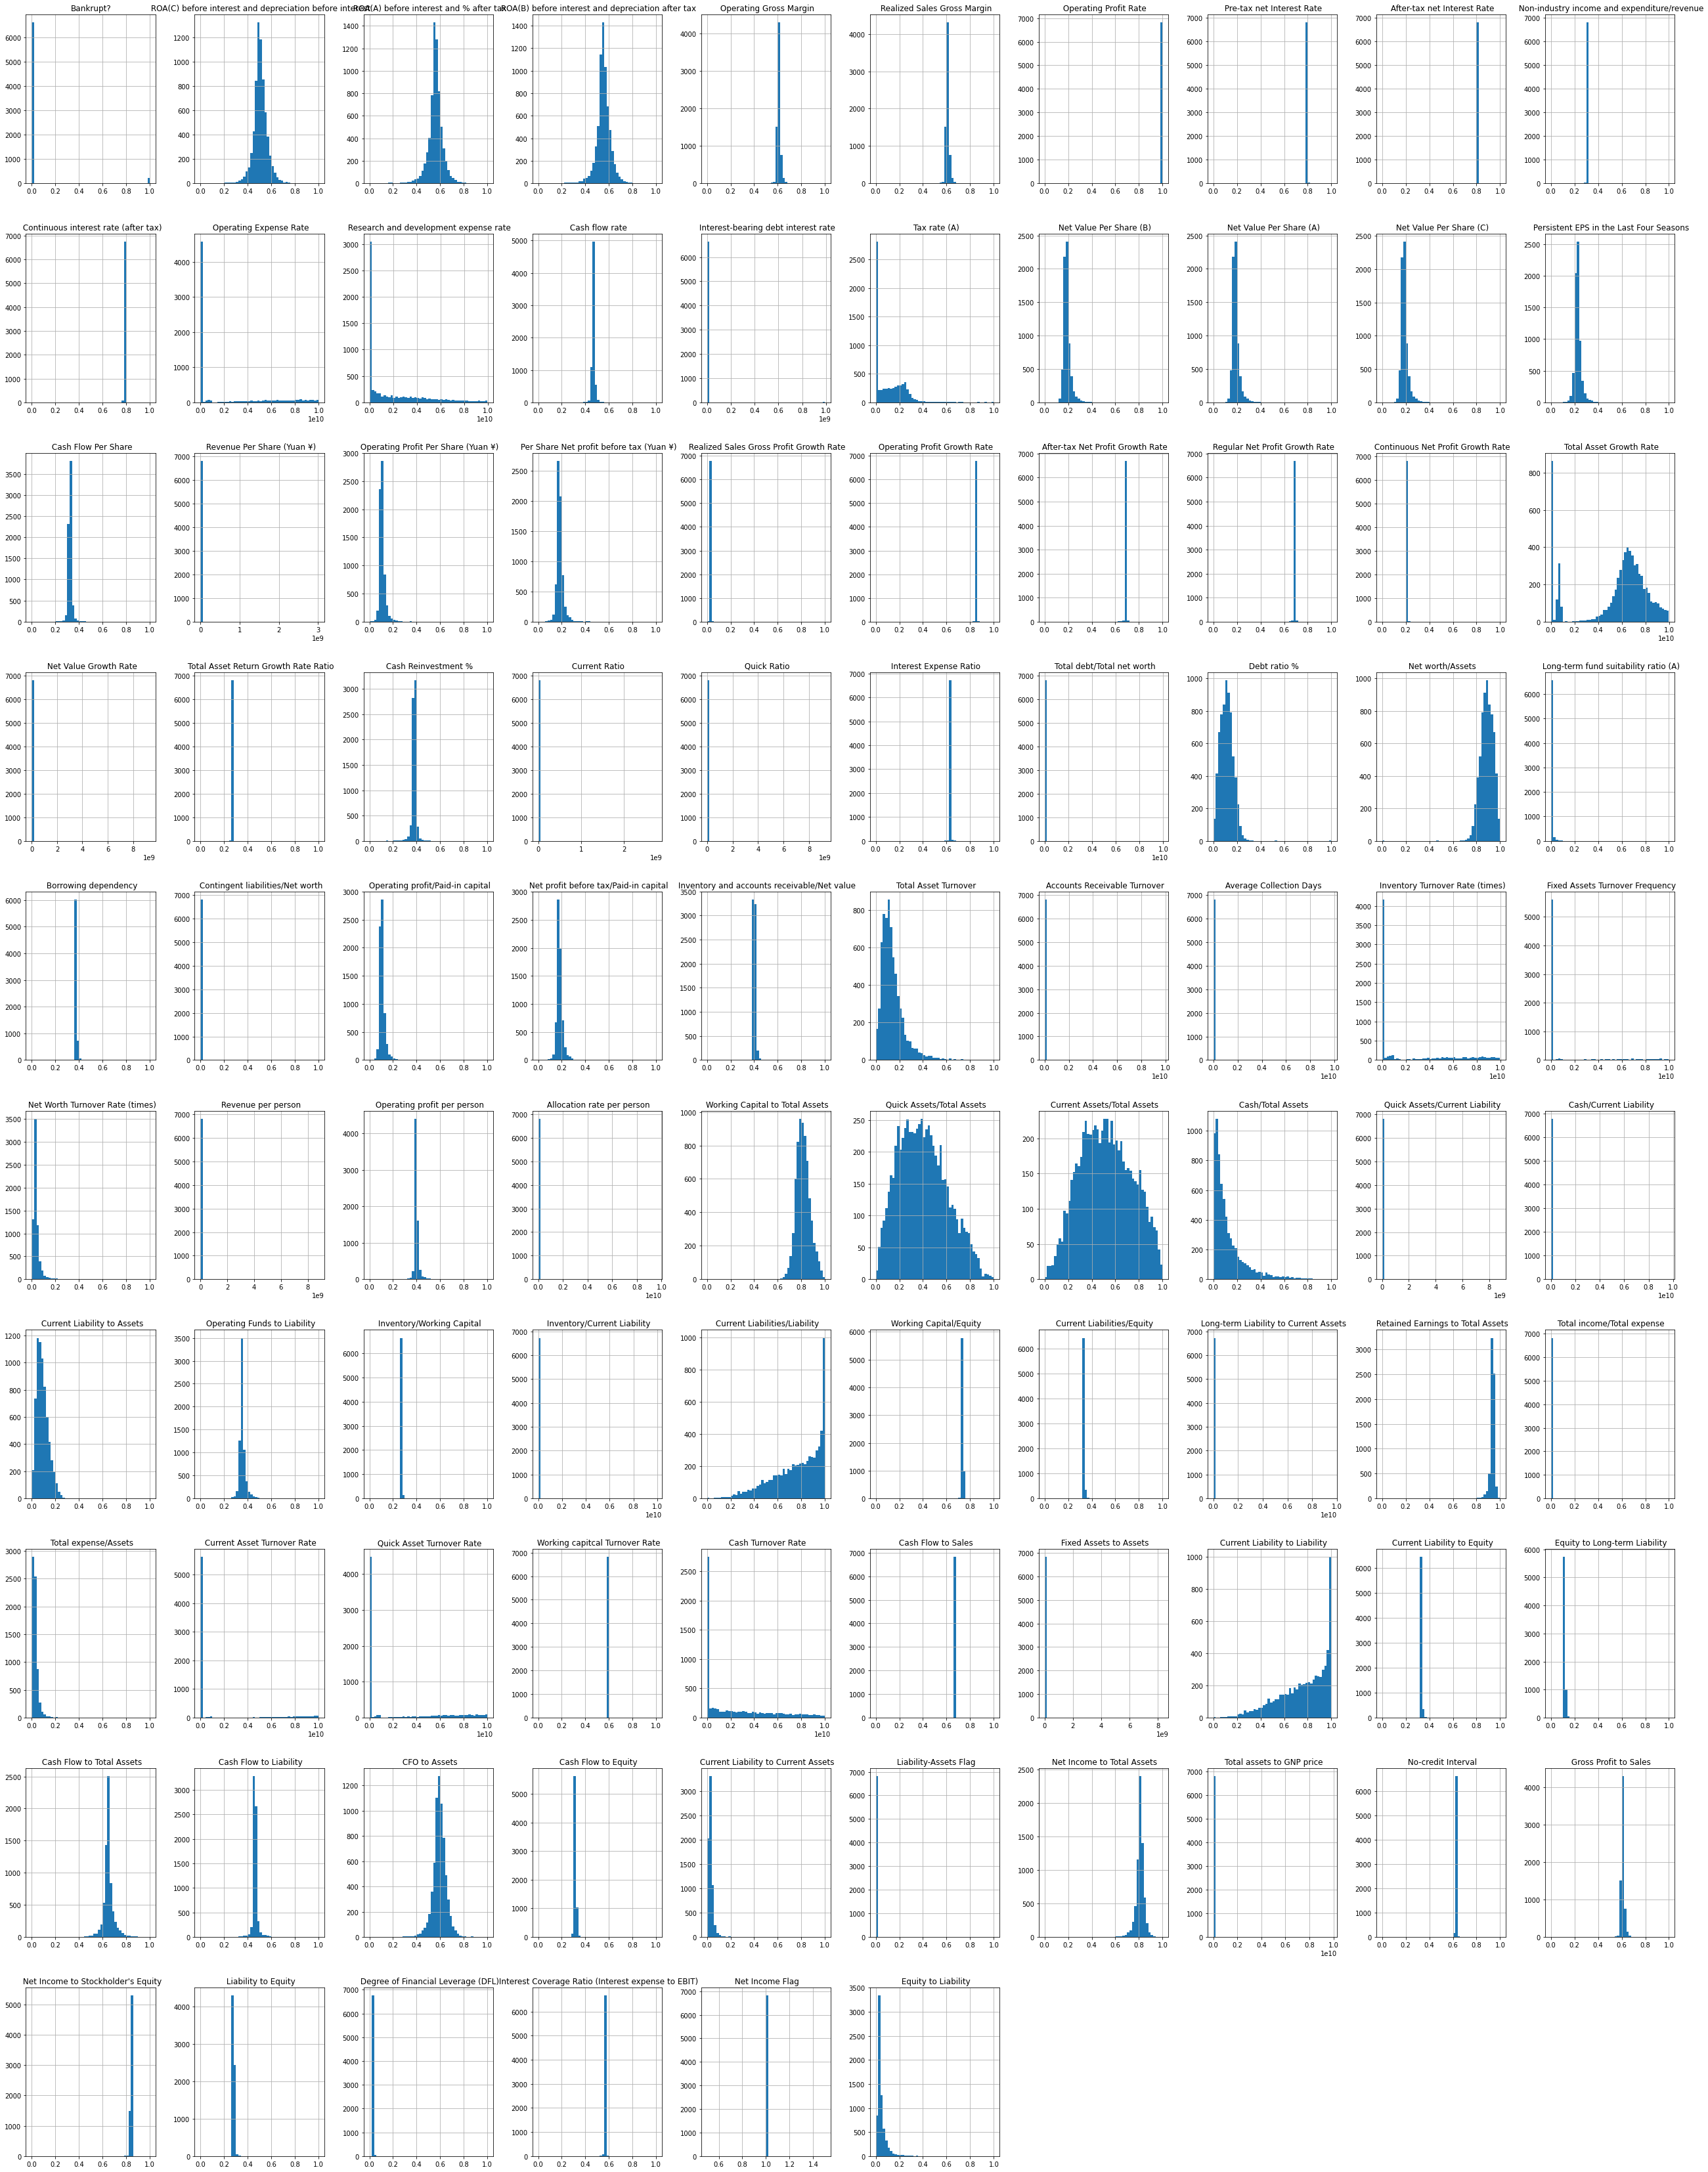

In [9]:
real_data.hist(bins = 50, figsize = (45,60))
# data.hist(bins = 50, figsize = (45,60))
plt.show()

Dataset contains outliers and most of the distributions are skewed. We will remove outliers at data preprocessing.

## Class Imbalance

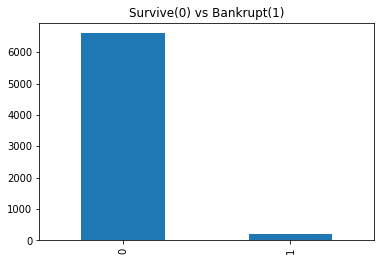

In [10]:
real_data['Bankrupt?'].value_counts().plot(kind='bar')
plt.title('Survive(0) vs Bankrupt(1)')
plt.show()

We can observe that our dataset is very imbalanced. The minority class which is the one we're most interested by predicting represents about 3% of total observations. This can pose a real challenge to machine learning models. We will show later that we can sample minor class(if necessary) to solve this problem using our model.

## Data Preprocessing

**Class imbalance problem solving using SMOTE**

In [11]:
# drop target variable for training

X = real_data.drop(['Bankrupt?'], axis = 1)
y = real_data.pop('Bankrupt?')


# data split

X_train, X_test,y_train,y_test = train_test_split(X, y,stratify=y)


# smote oversampling

SMOTE_oversample = SMOTE()
X_train,y_train = SMOTE_oversample.fit_resample(X_train,y_train)


# smote oversampling

SMOTE_oversample = SMOTE()
X_train,y_train = SMOTE_oversample.fit_resample(X_train,y_train)

In [12]:
X_train['Bankrupt?'] =y_train

In [13]:
oversampled_real_data = X_train

oversampled_real_data.rename(columns = {0:'Bankrupt?',}, inplace = True)
#oversampled_real_data.columns

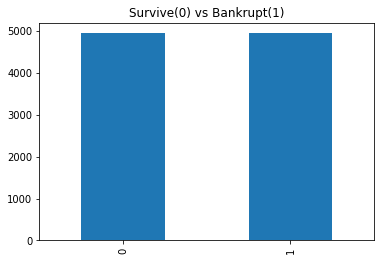

In [14]:
oversampled_real_data['Bankrupt?'].value_counts().plot(kind='bar')
plt.title('Survive(0) vs Bankrupt(1)')
plt.show()

Now the classes are balanced.

Data Distribution after oversampling

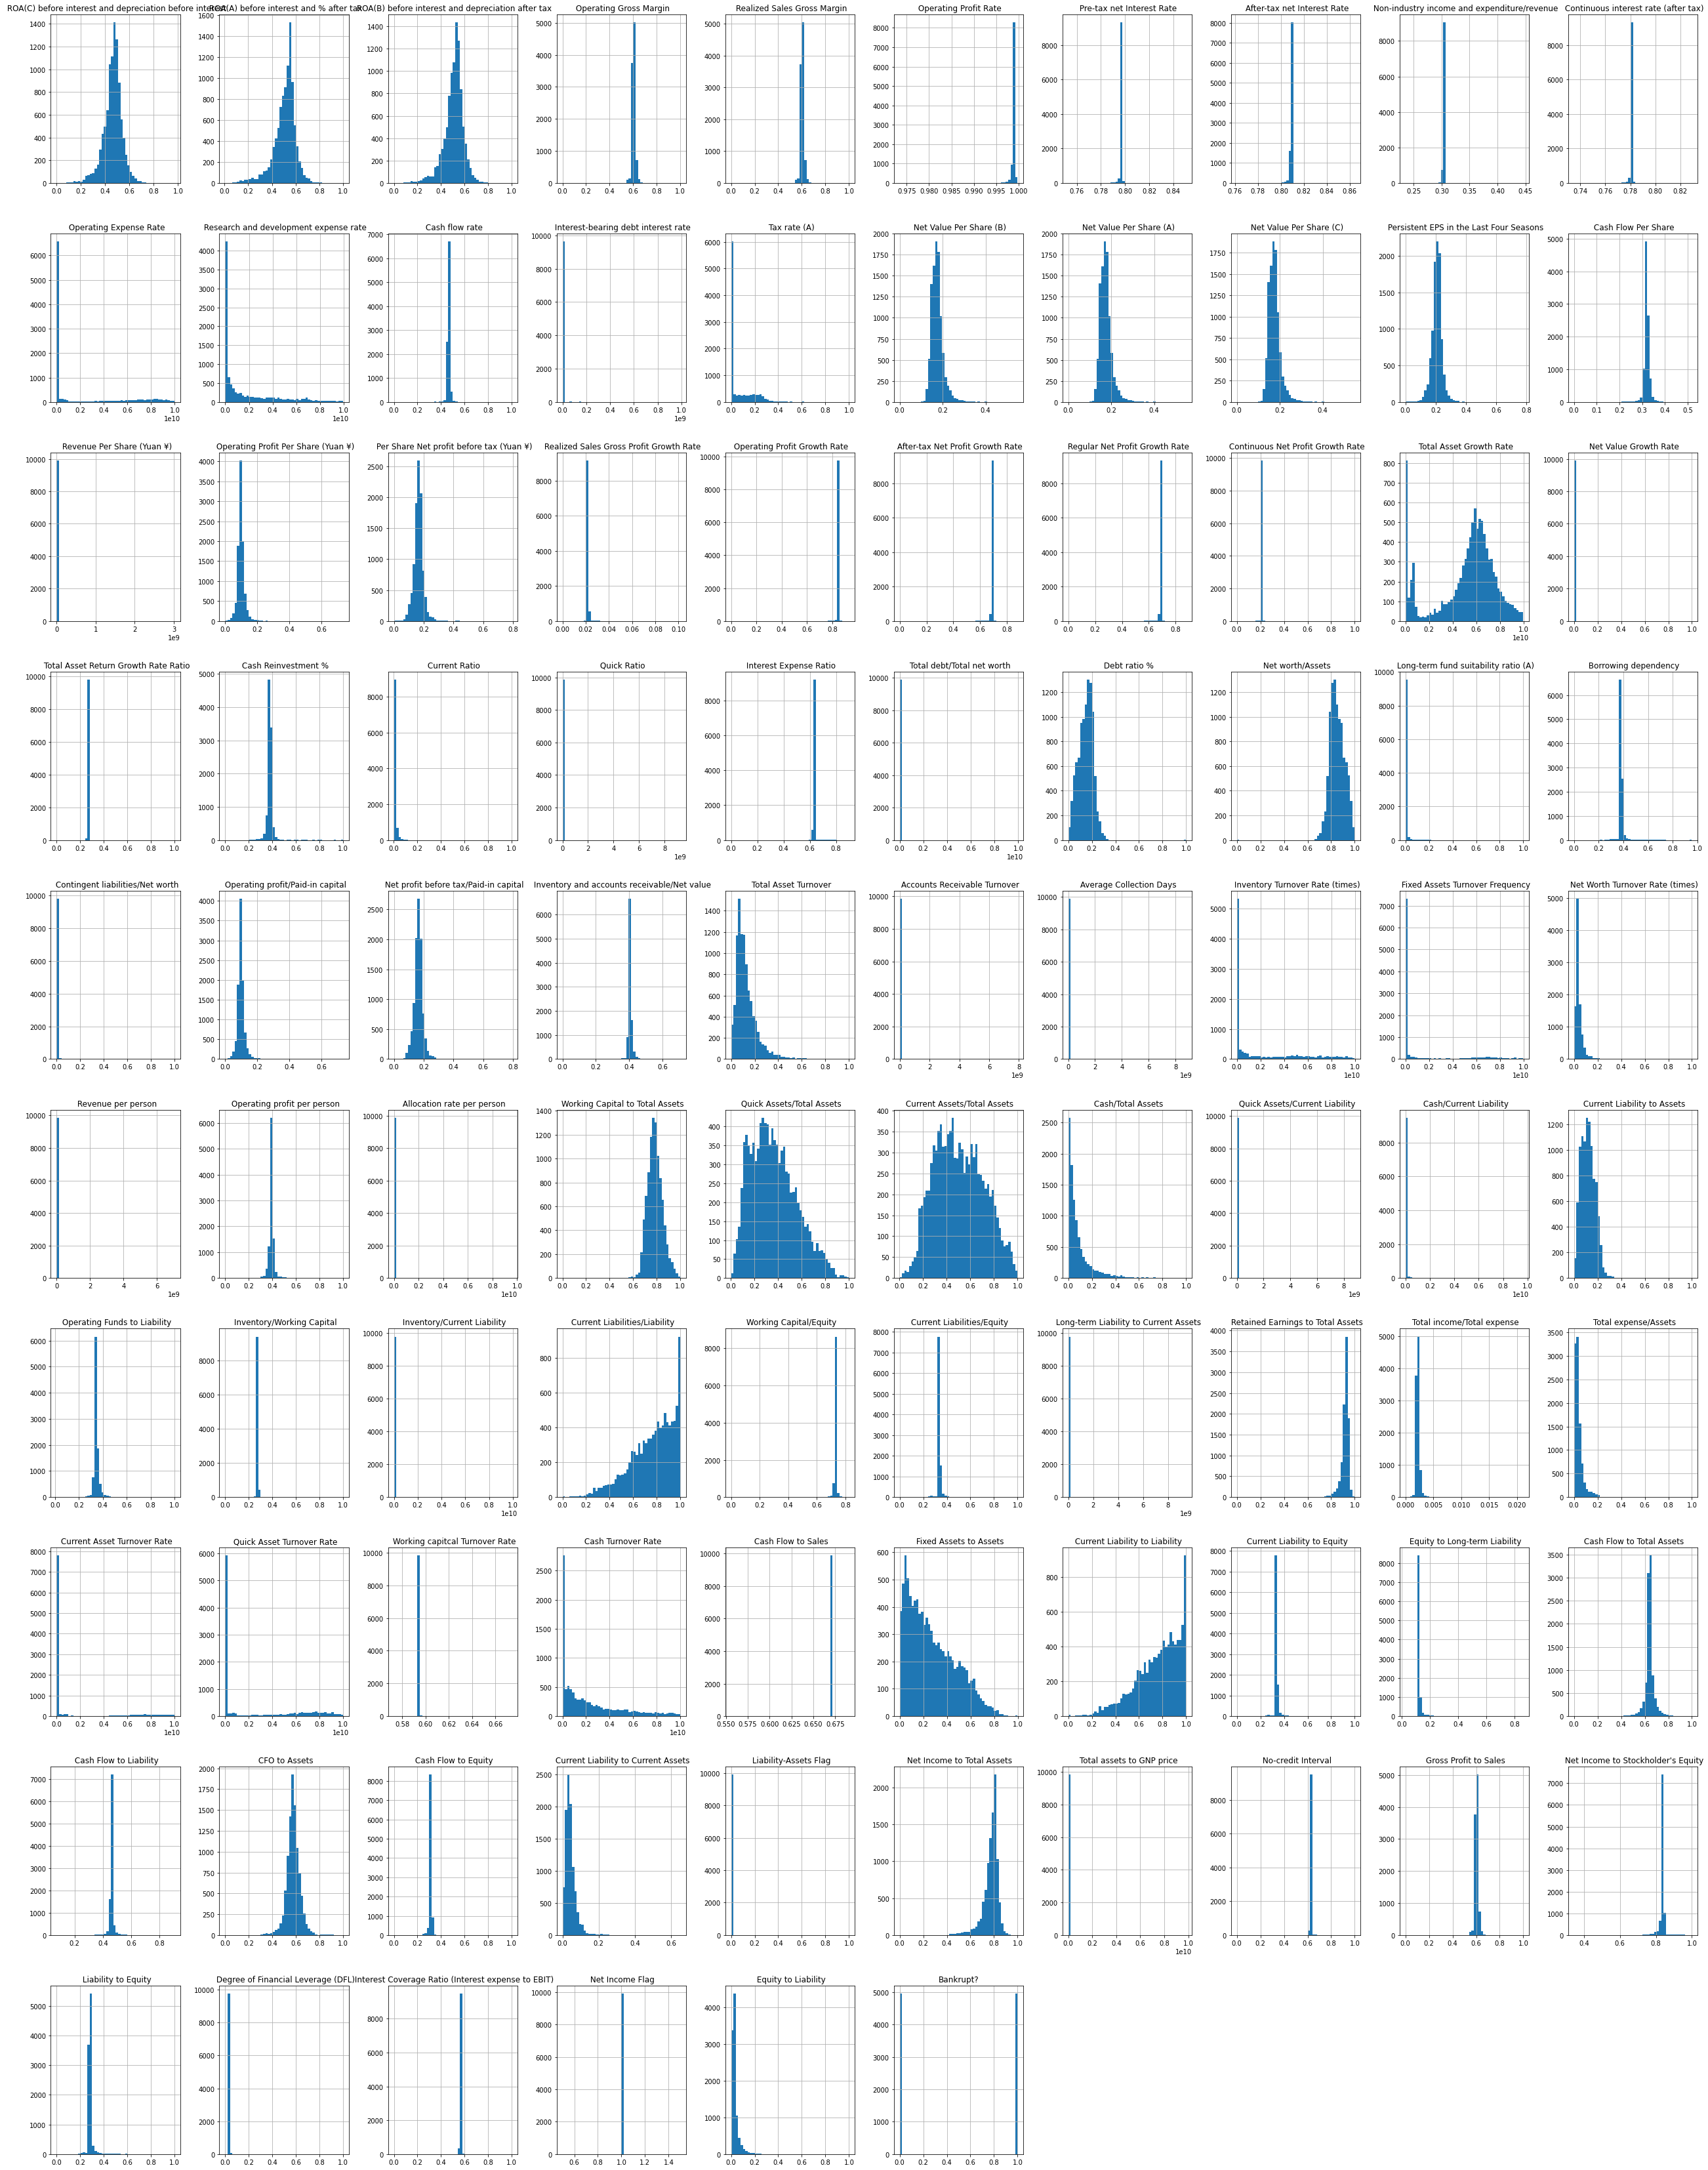

In [15]:
oversampled_real_data.hist(bins = 50, figsize = (45,60))

plt.show()

Distributions are same in the real data and oversampled data. We can see that most features don't follow a normal distribution and many of them have very skwed distribution. This might be solved by applying a log transformation but as you'll see later in the notebook.

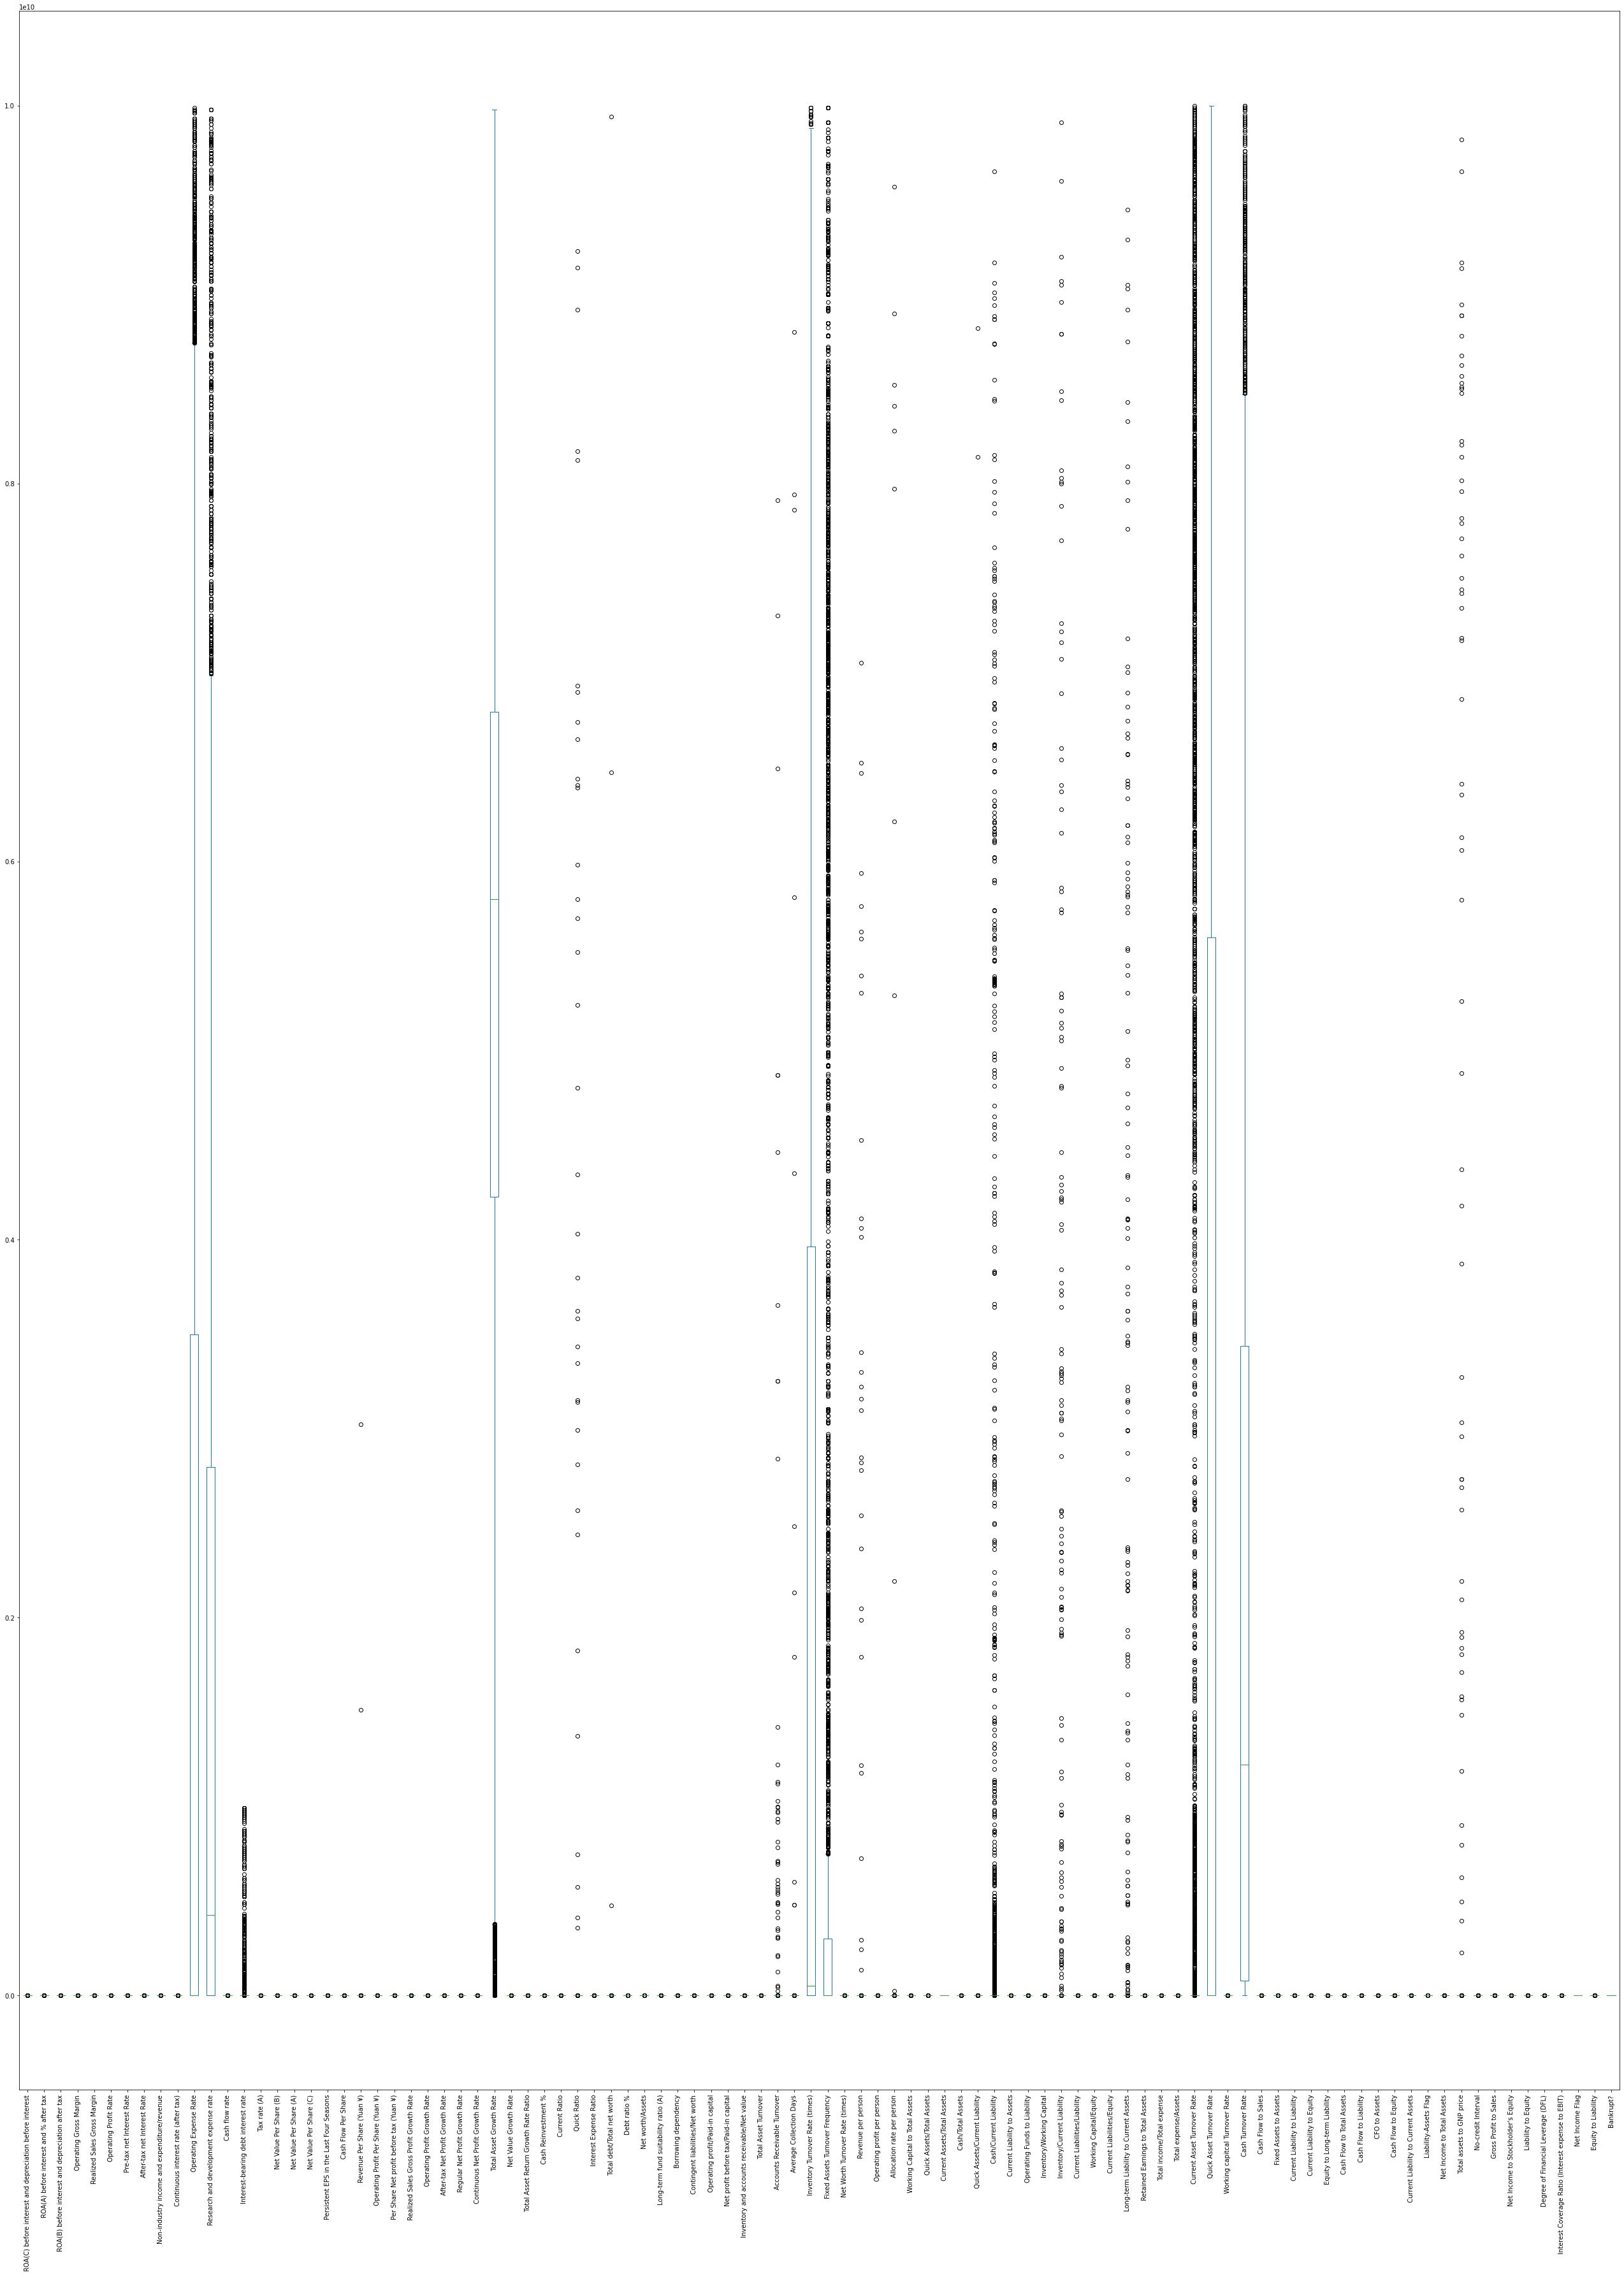

In [16]:
# for plot I only selected 10 columns
oversampled_real_data.iloc[:,0:96].plot(kind='box',figsize=(45,60));
plt.xticks(rotation=90);

## **Feature Transformation**
Comparing Natural Log Transformation and Power Transformation(Yeo-Johnson)

/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:233: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:244: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(x, axis, dtype, out, keepdims=keepdims, where=where)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_data.py:3253: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot inte

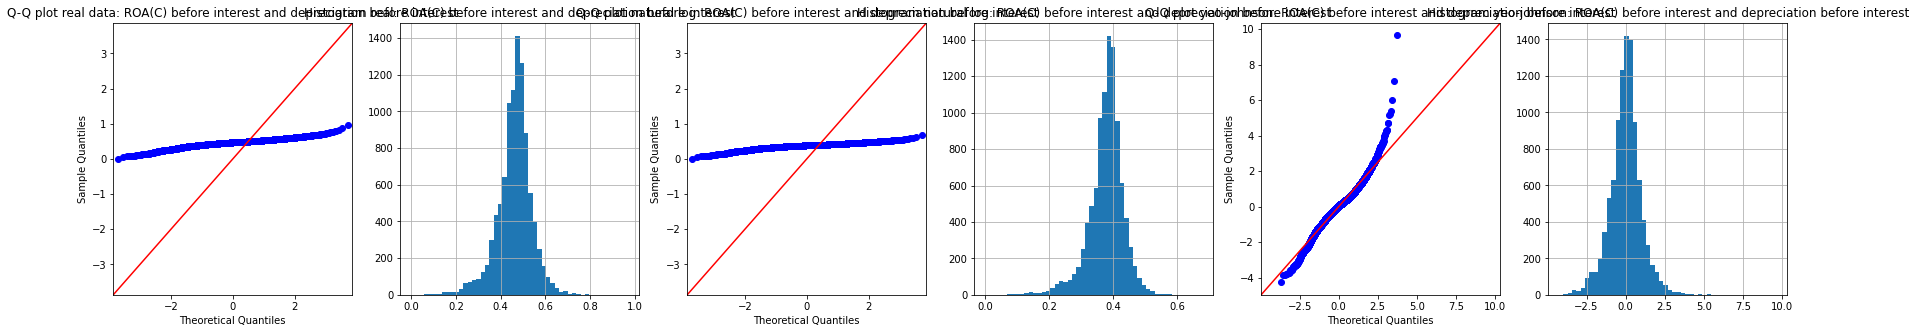

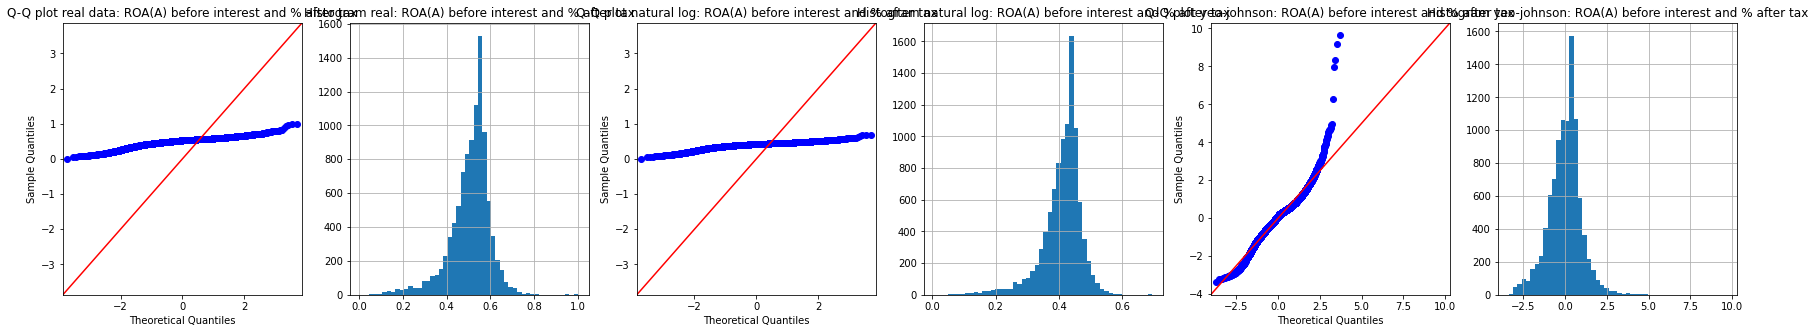

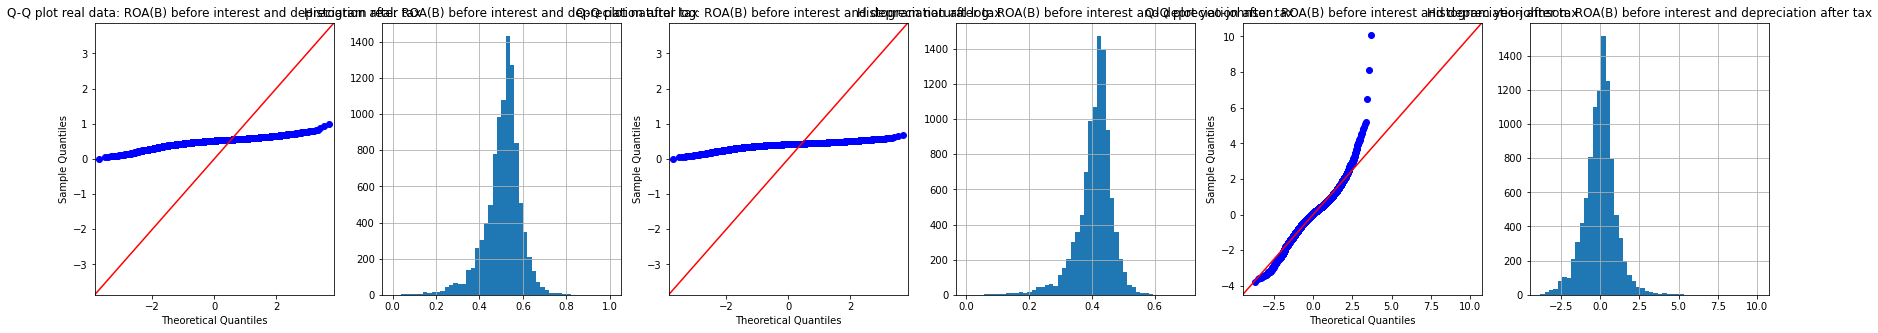

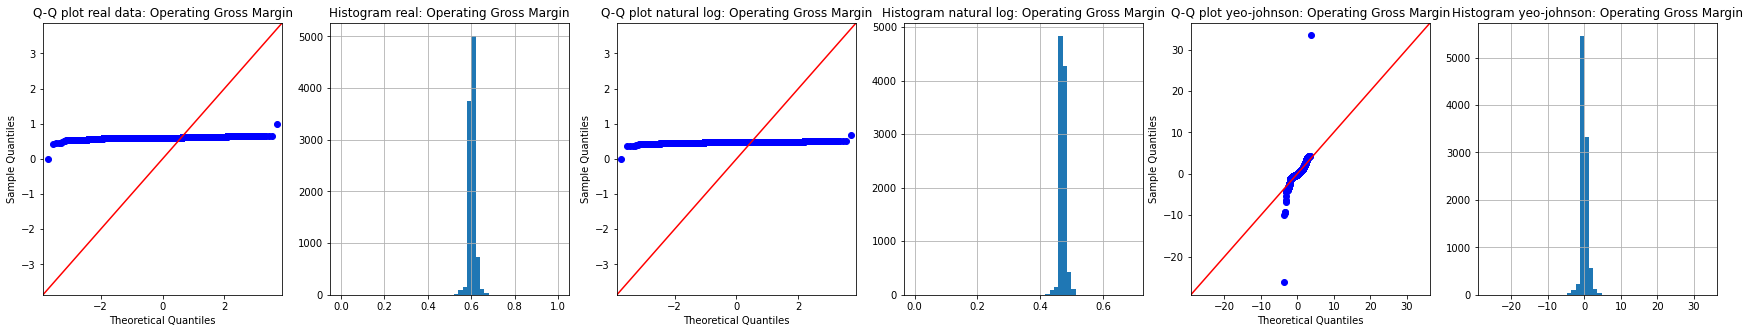

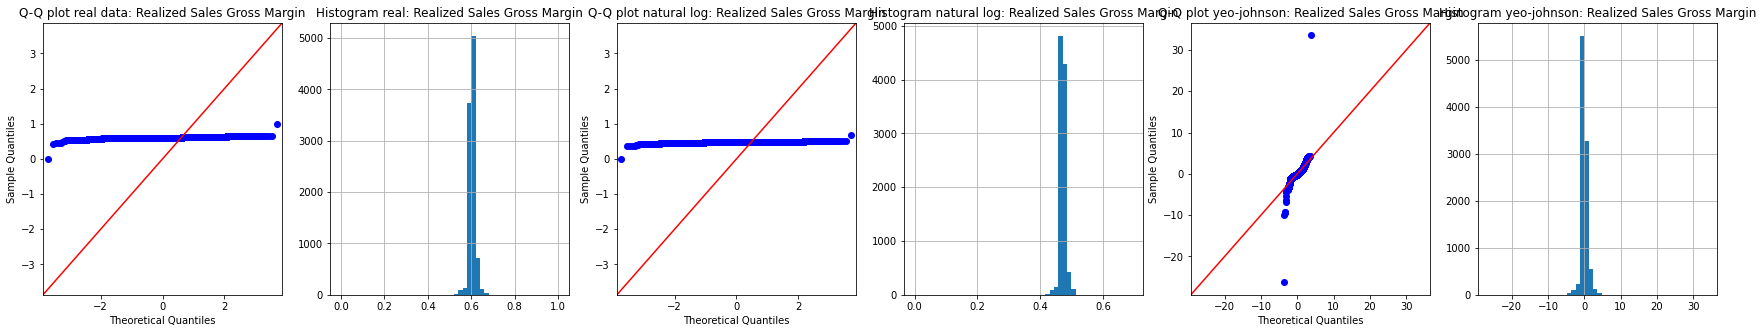

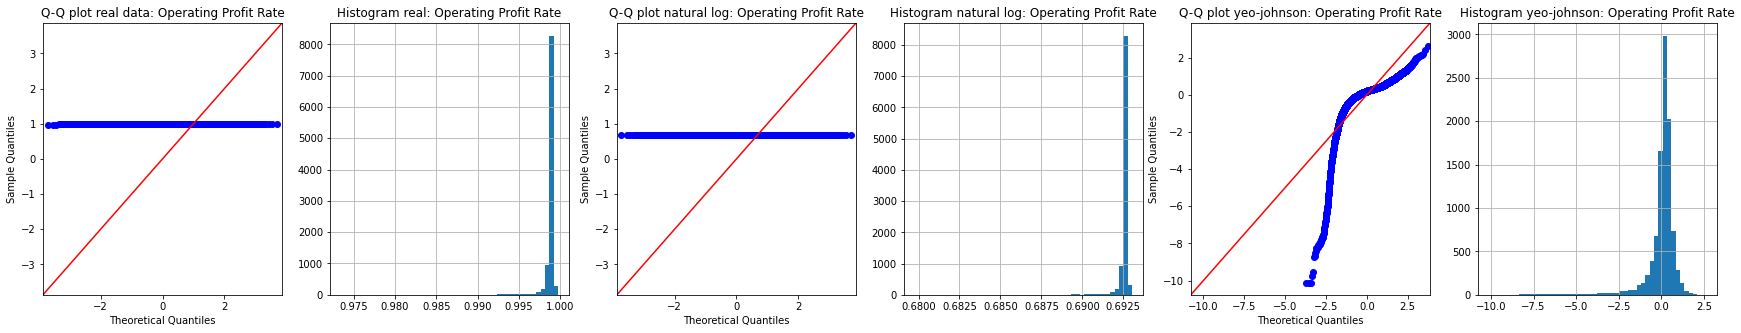

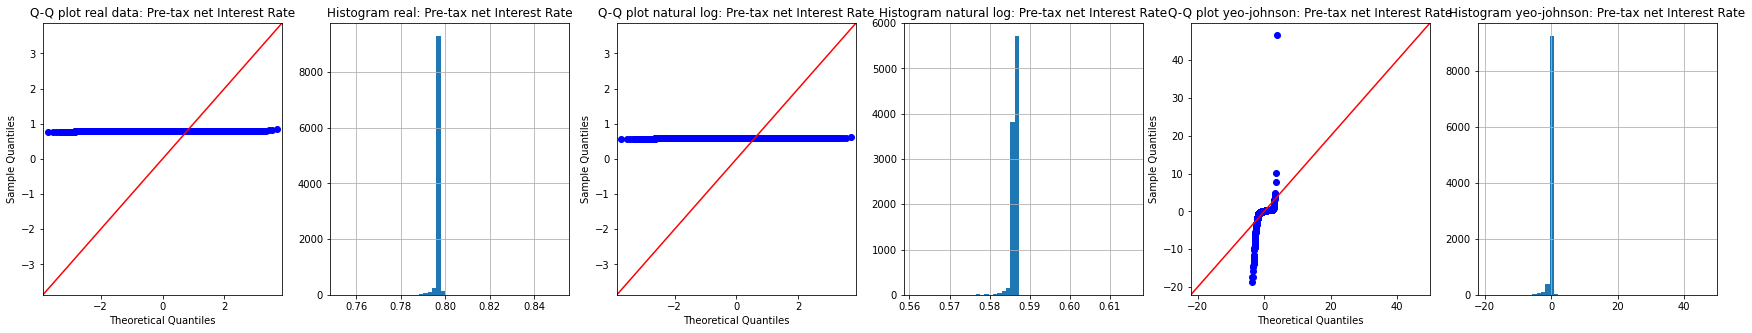

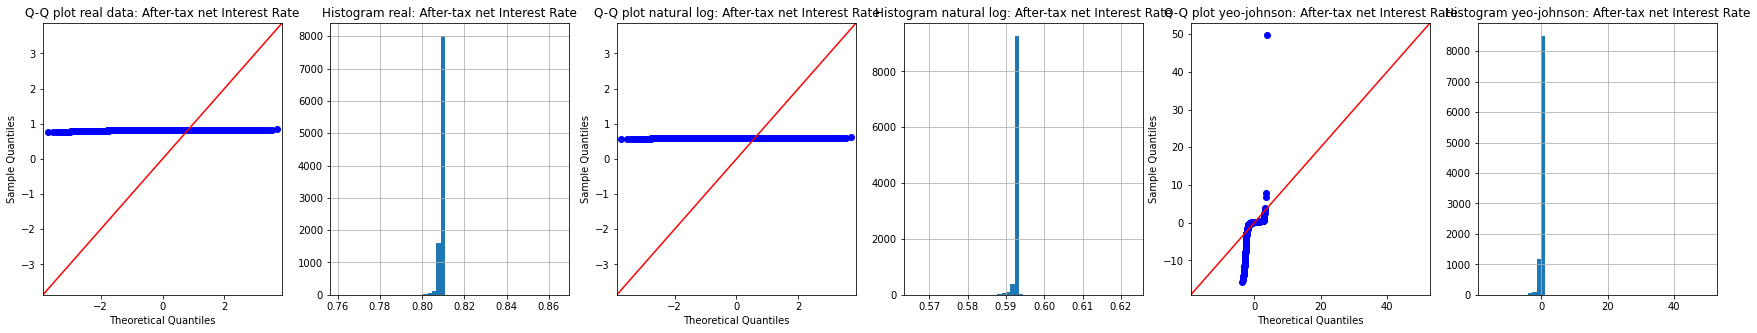

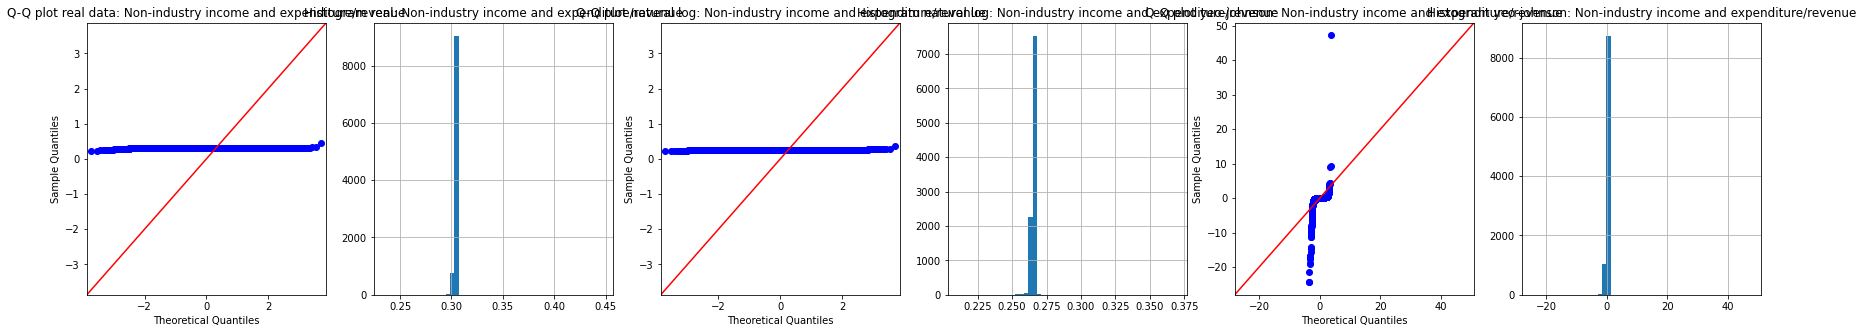

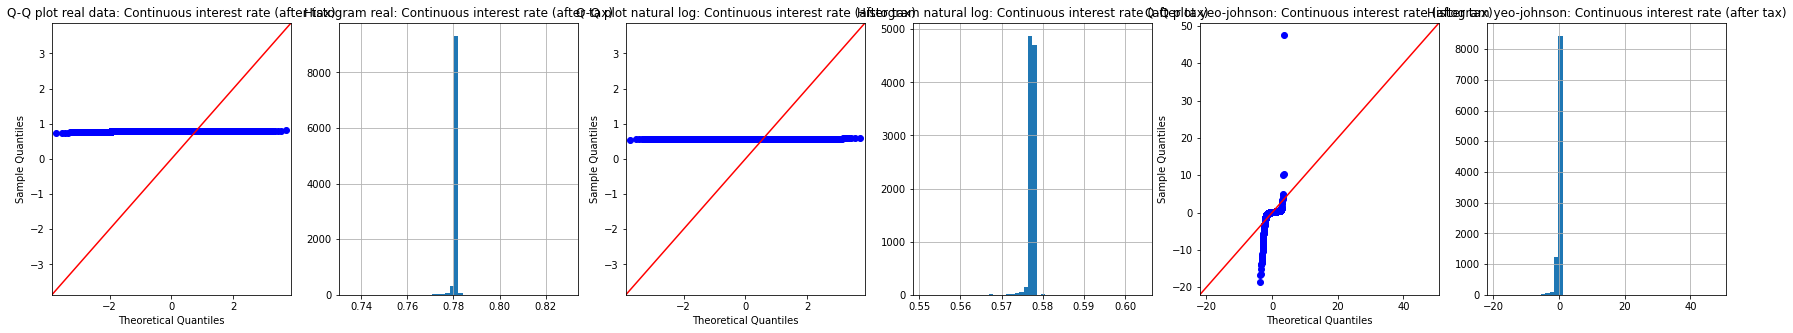

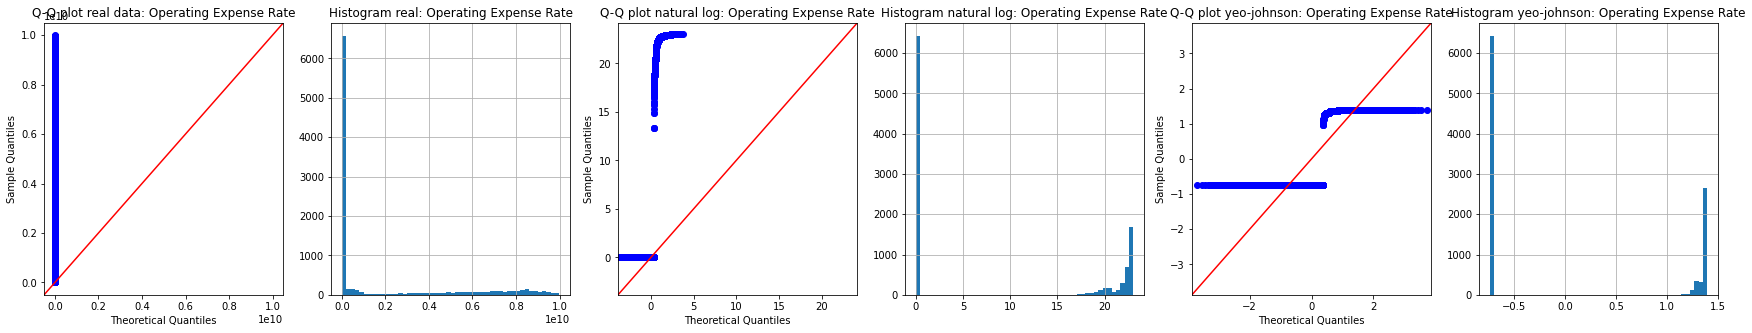

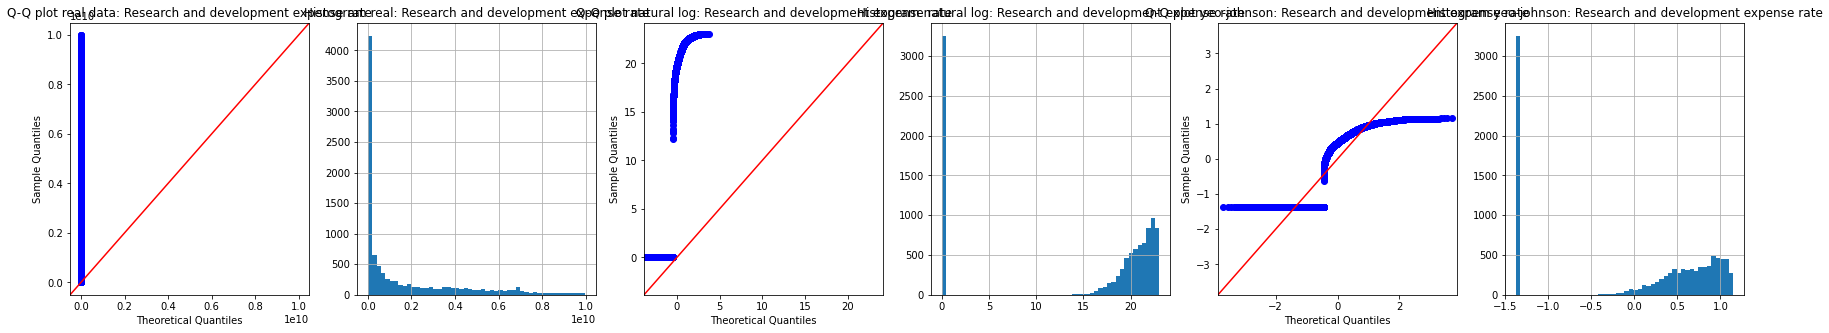

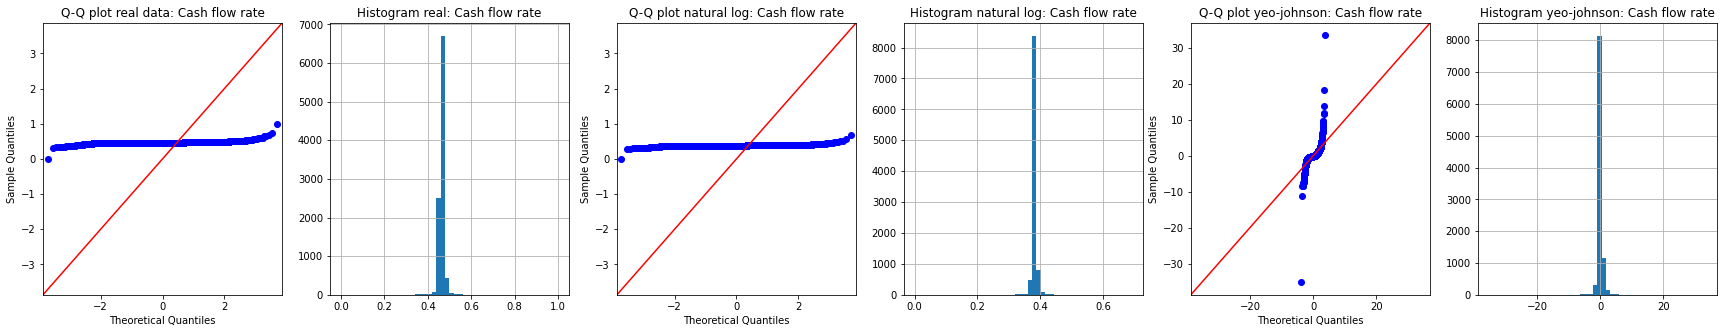

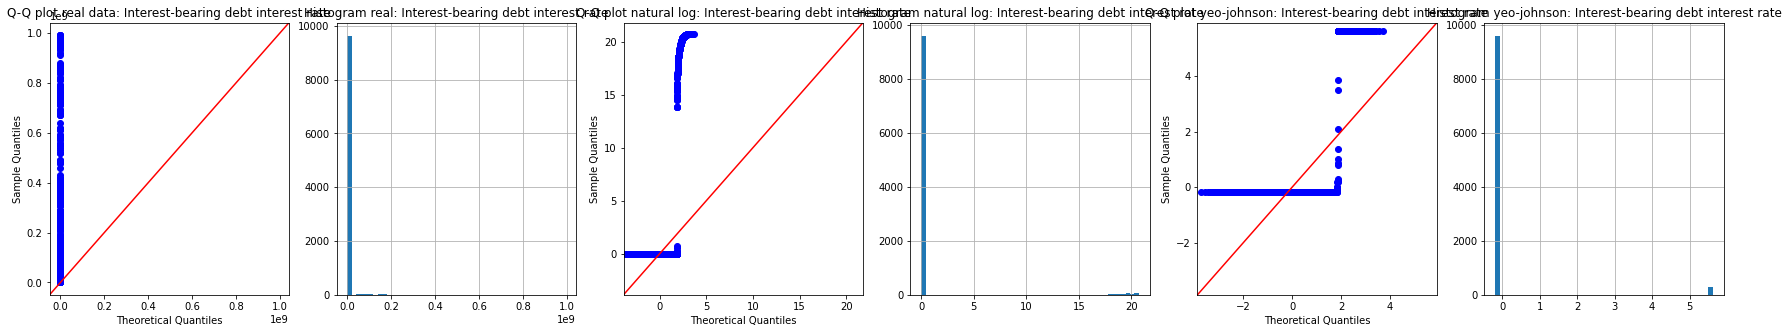

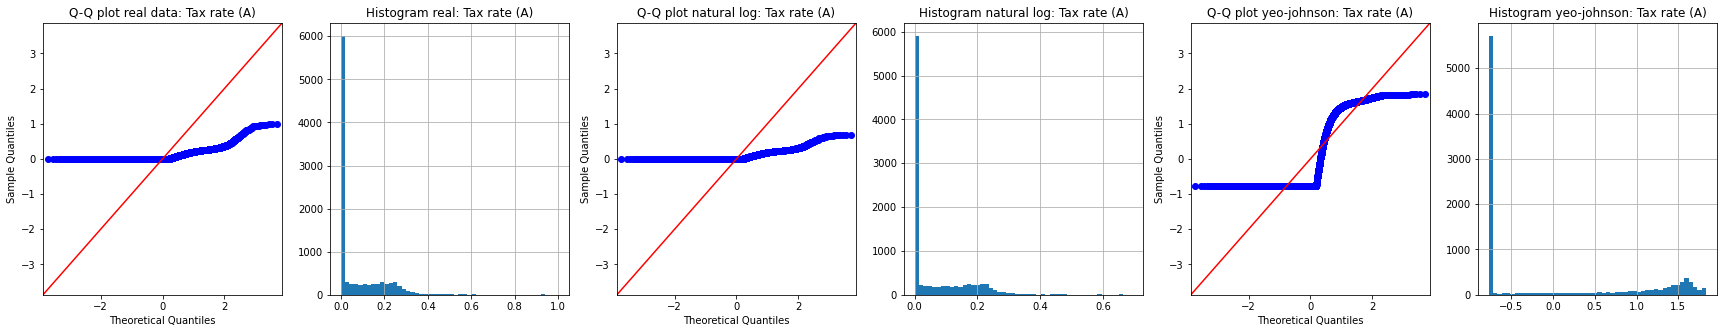

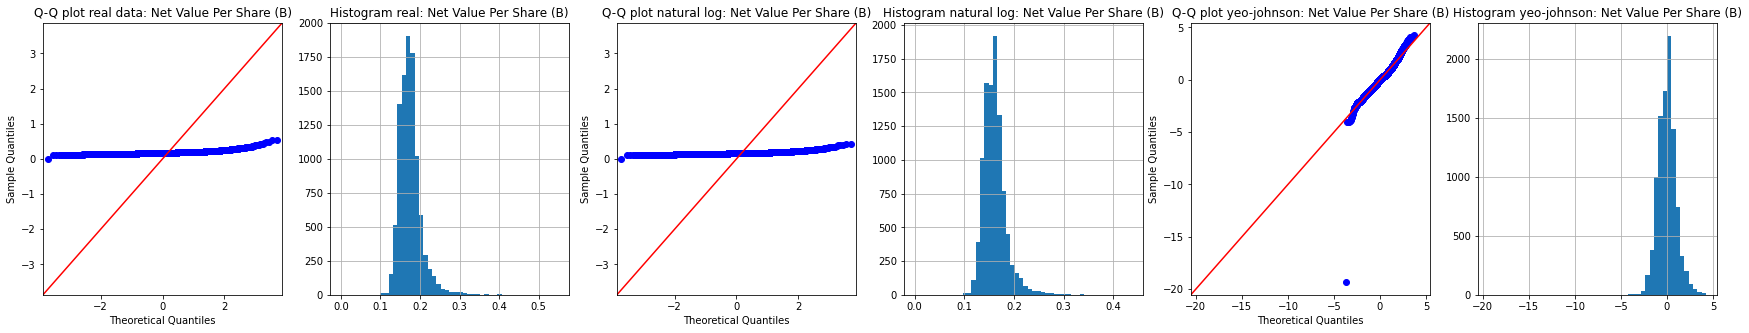

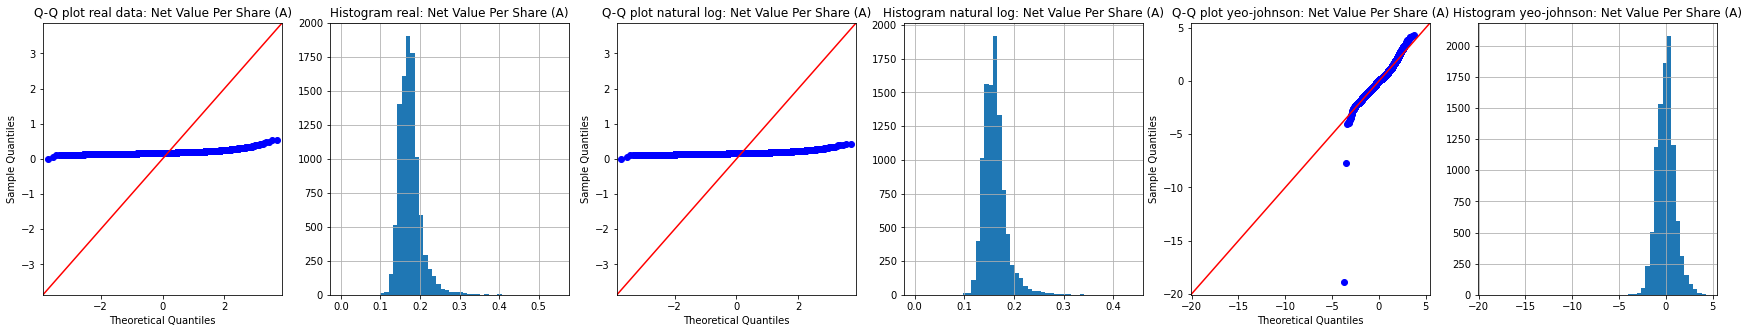

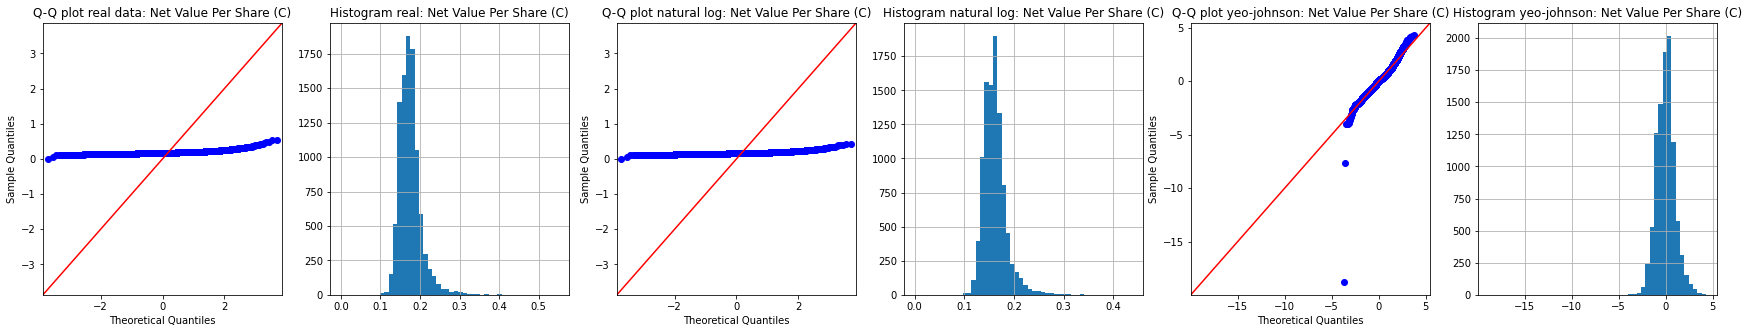

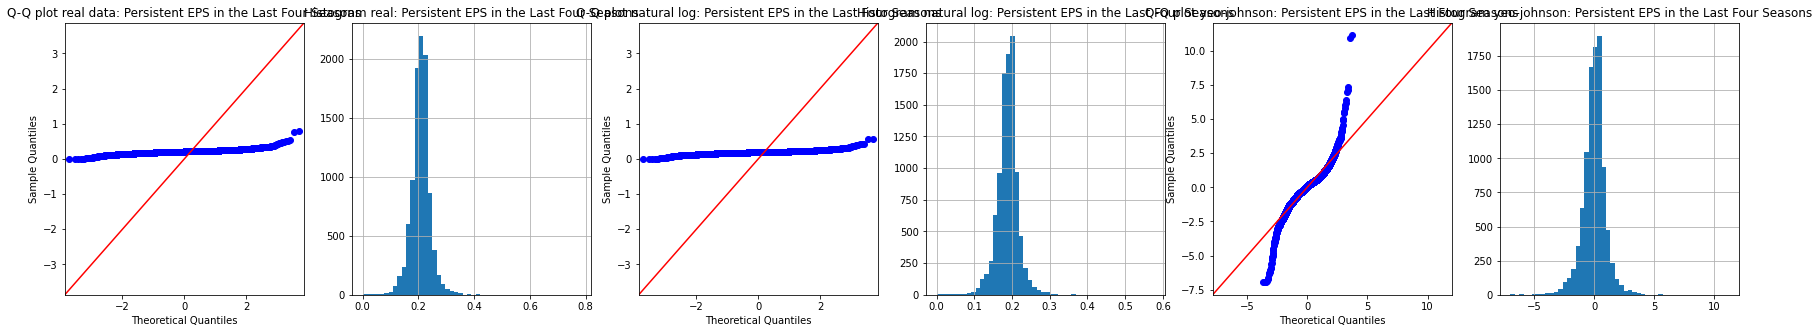

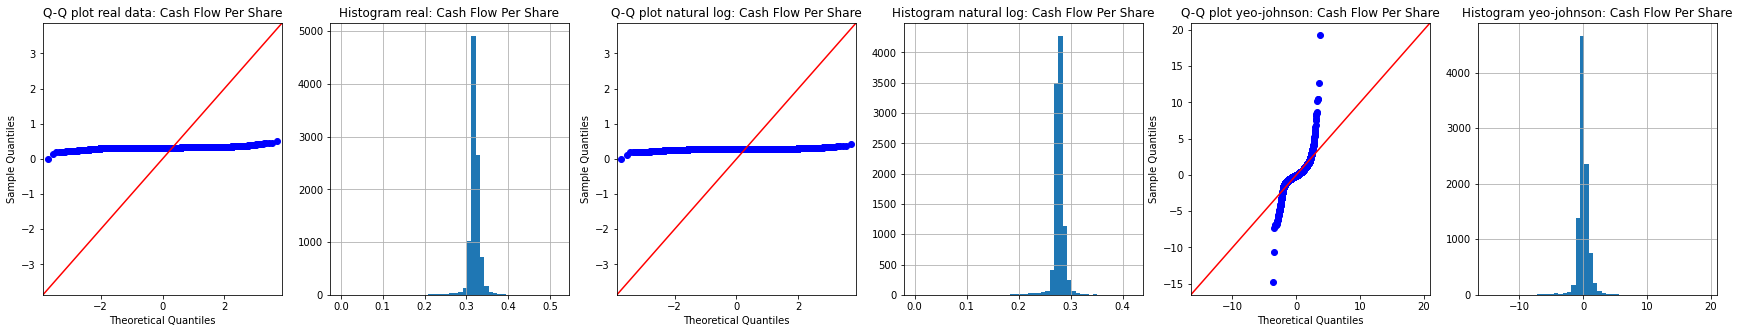

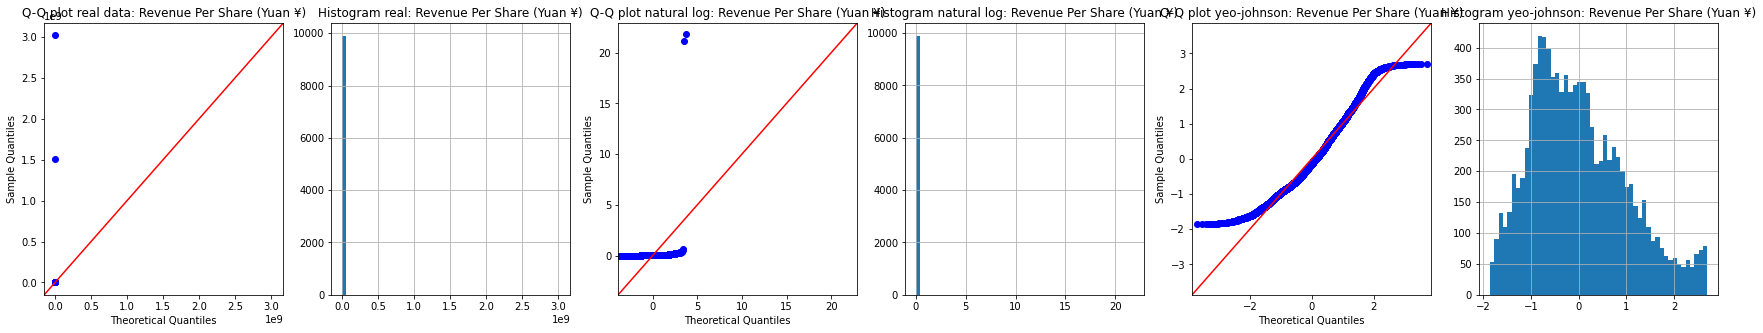

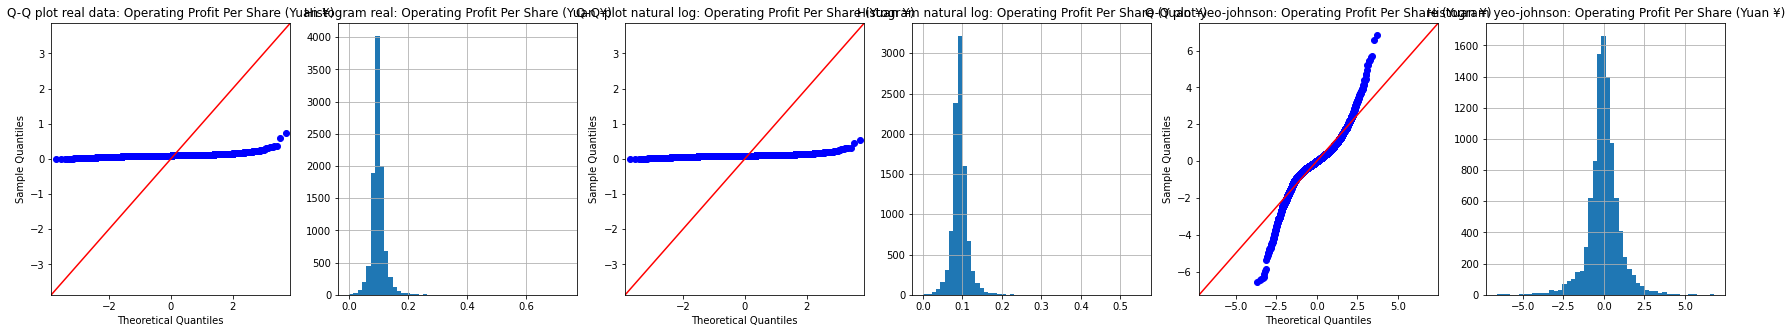

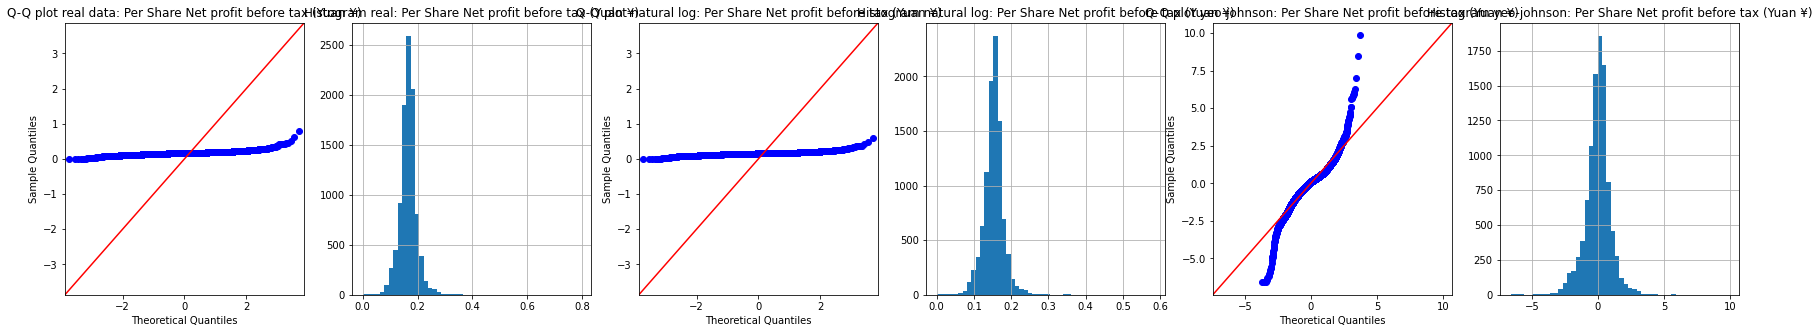

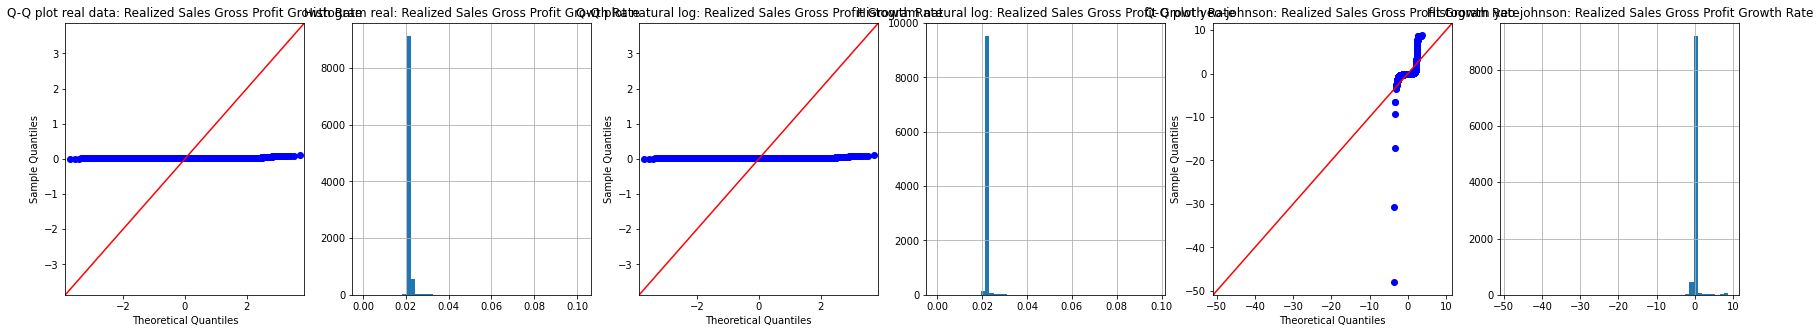

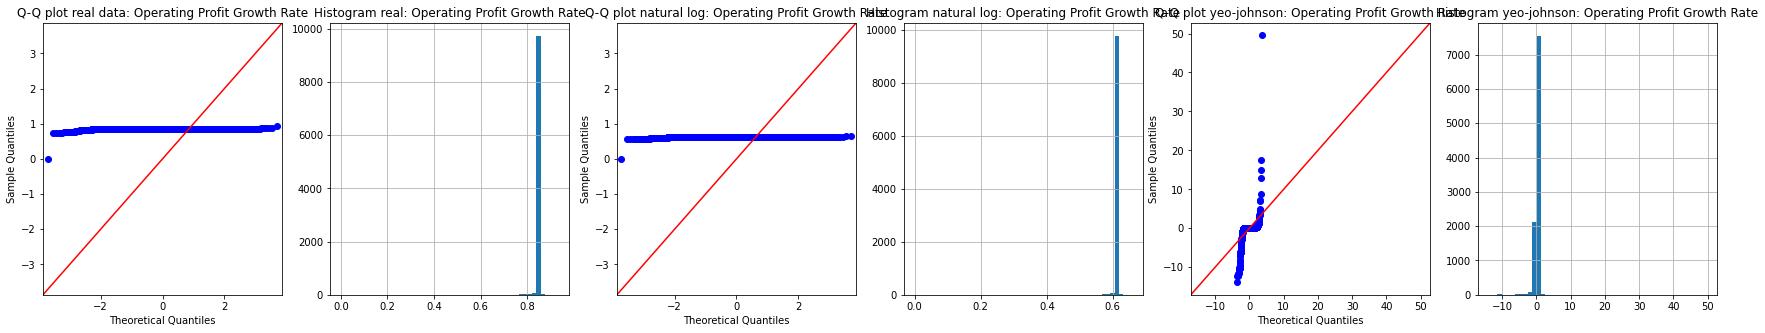

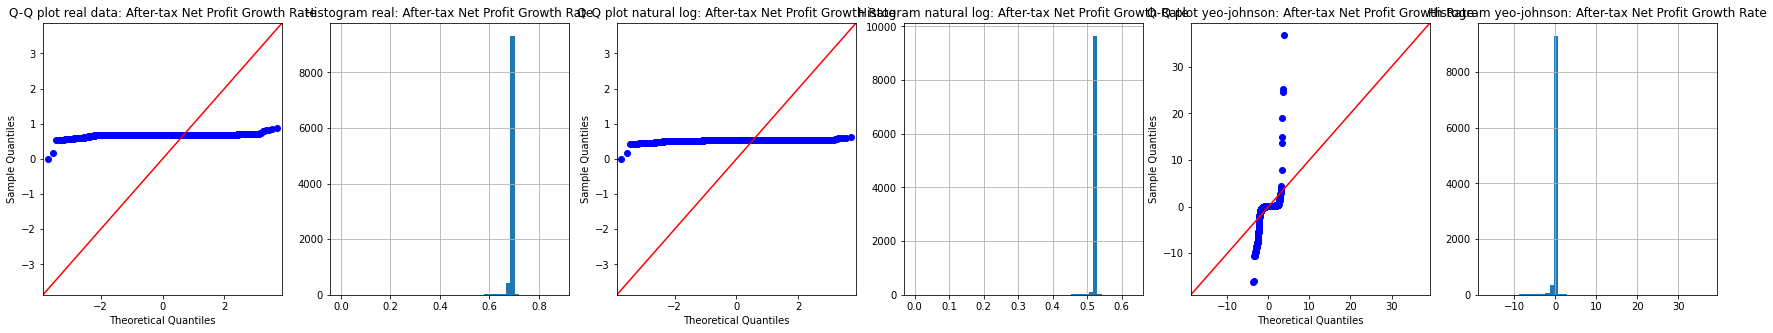

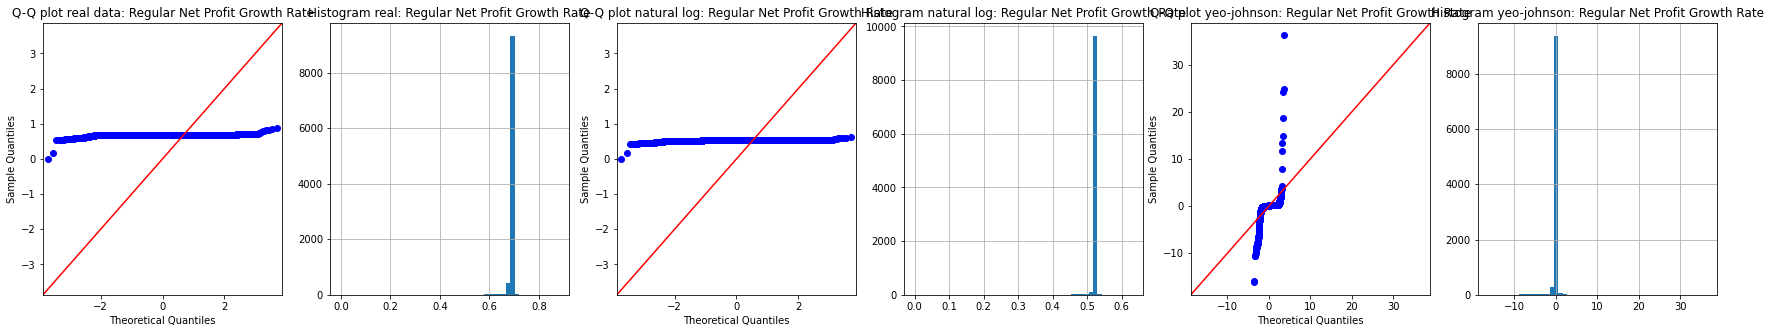

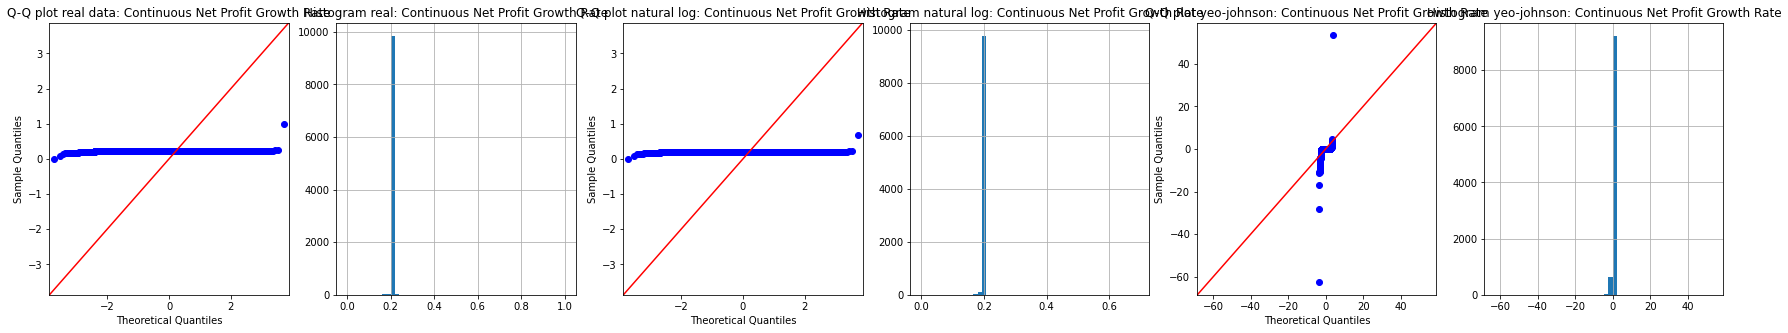

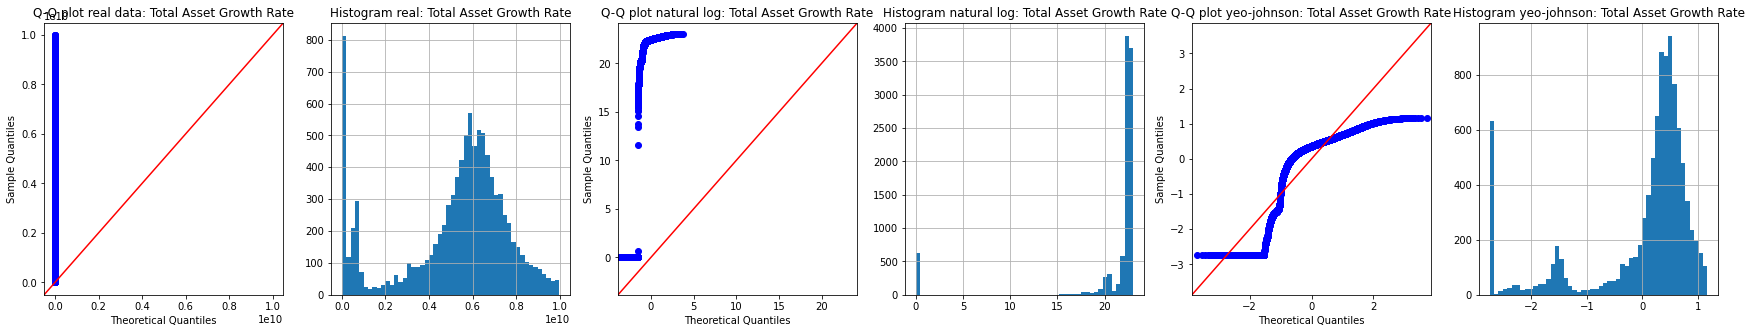

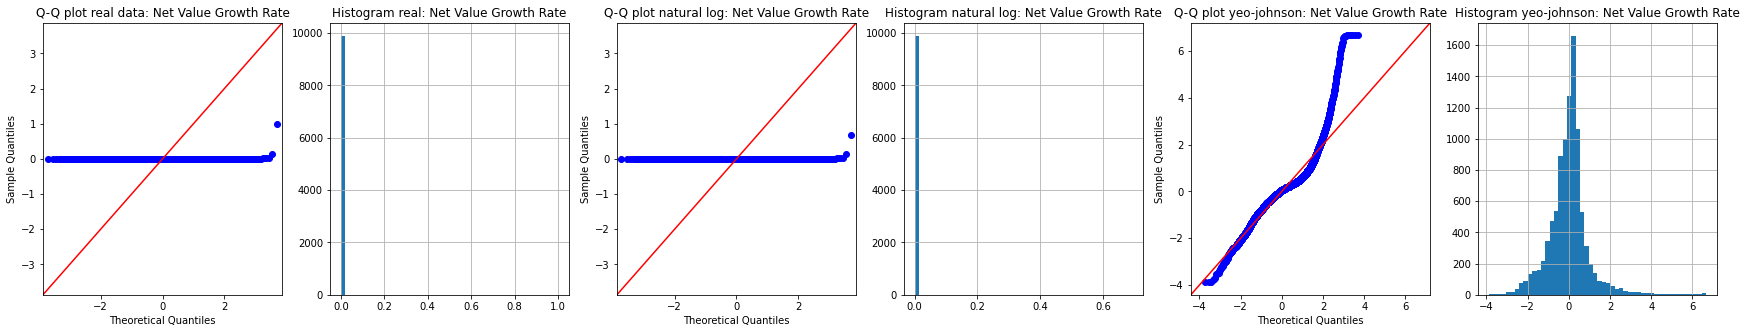

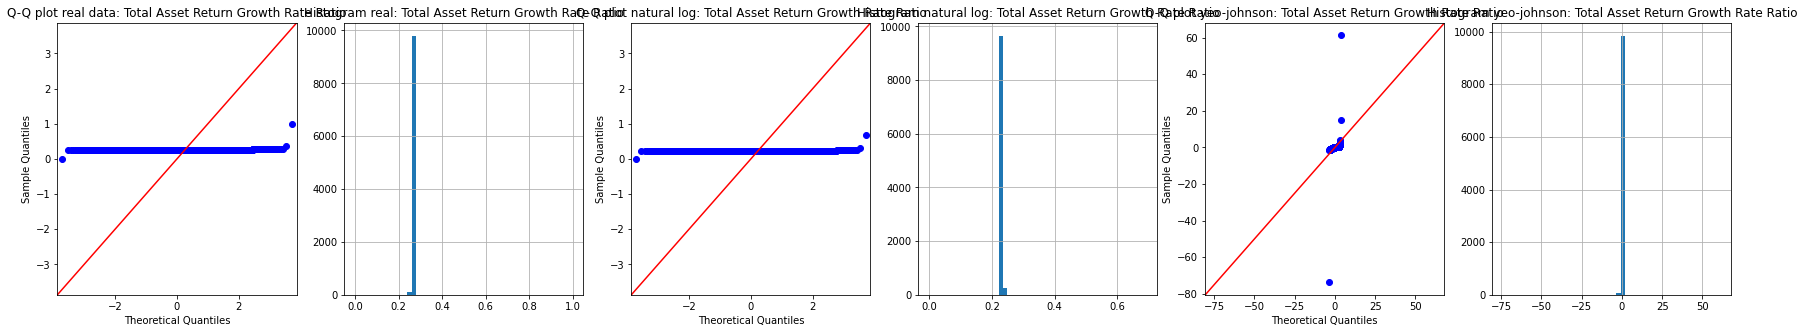

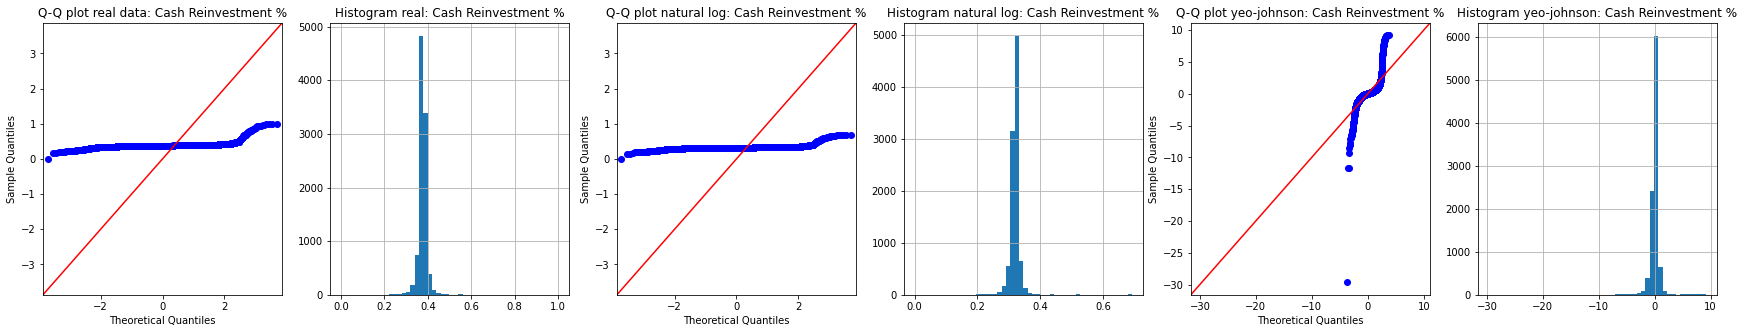

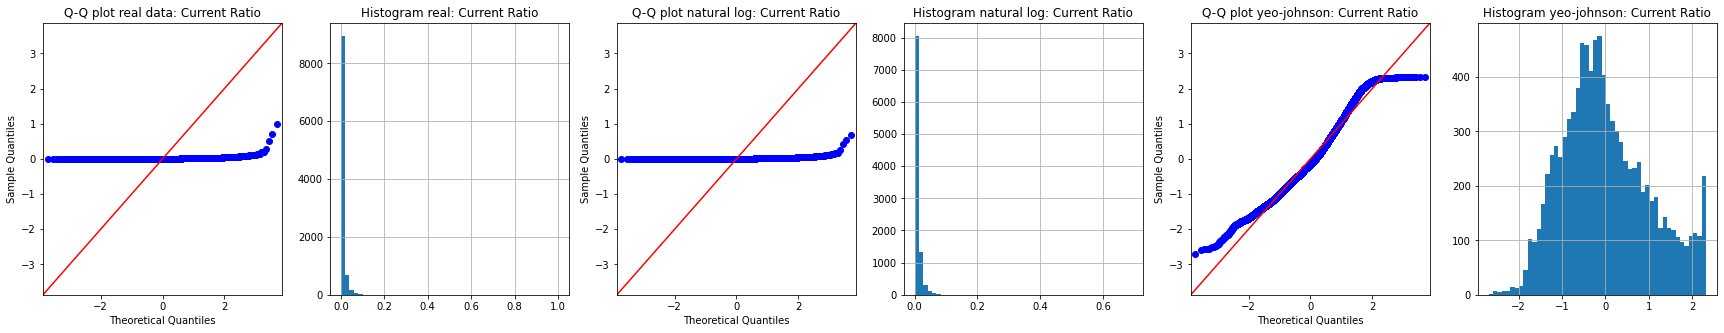

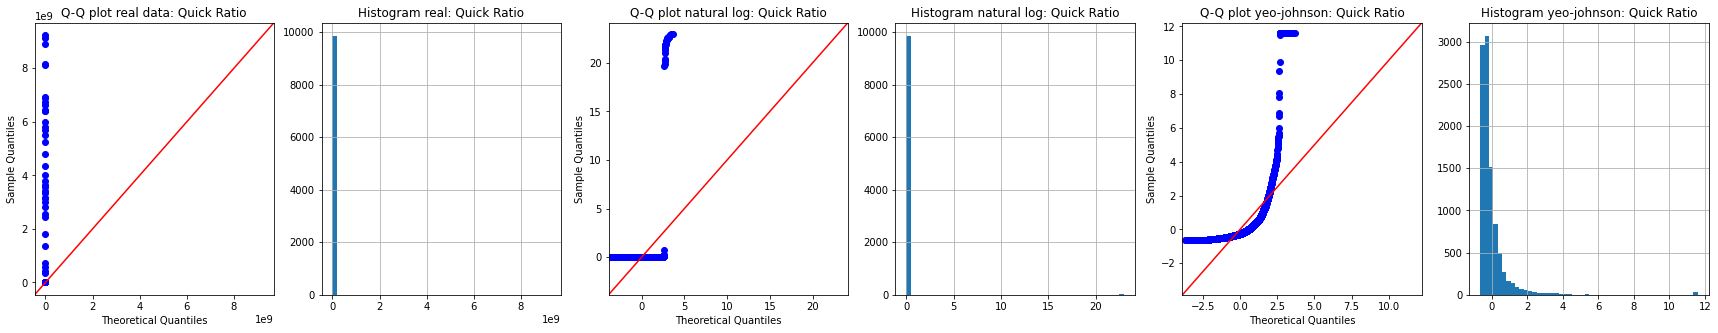

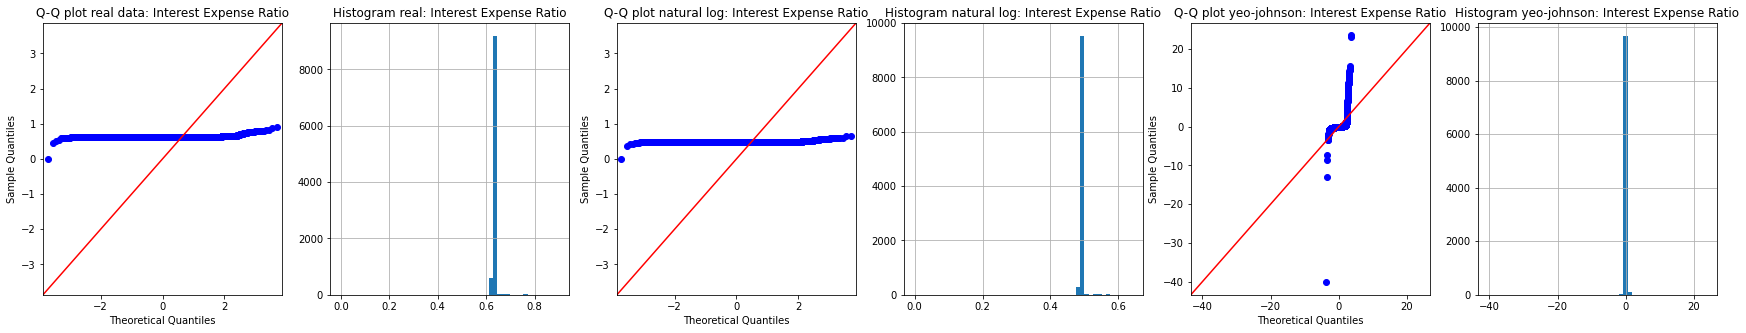

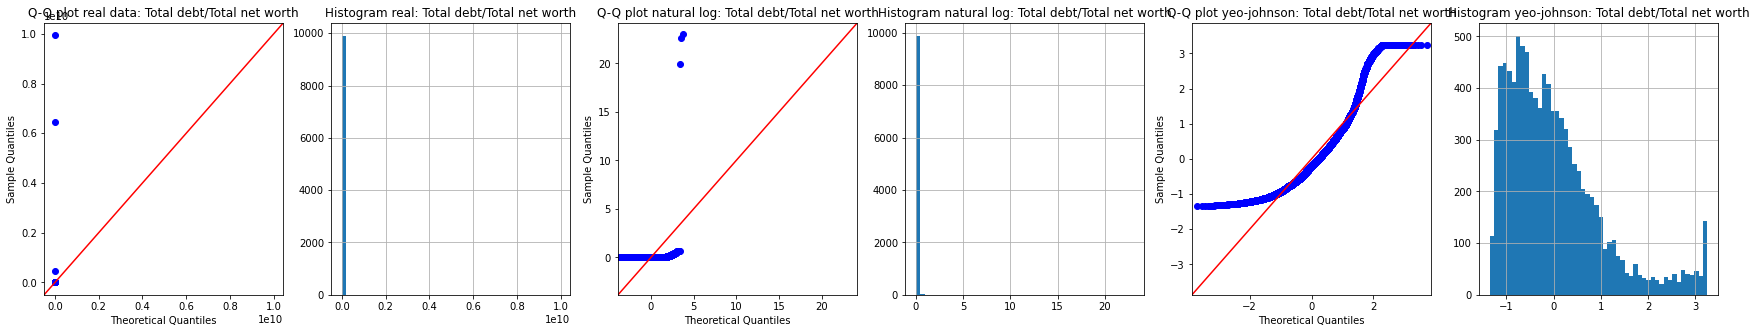

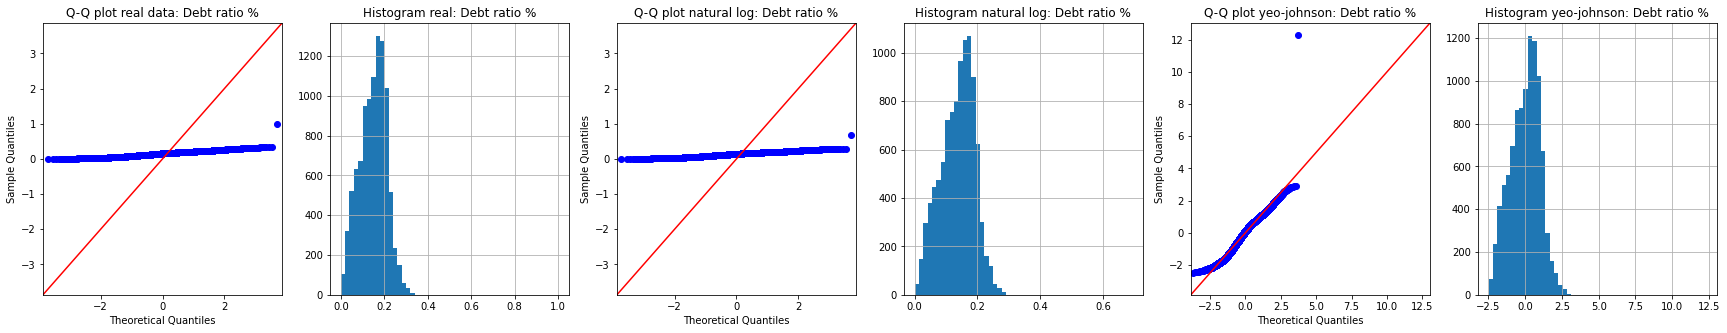

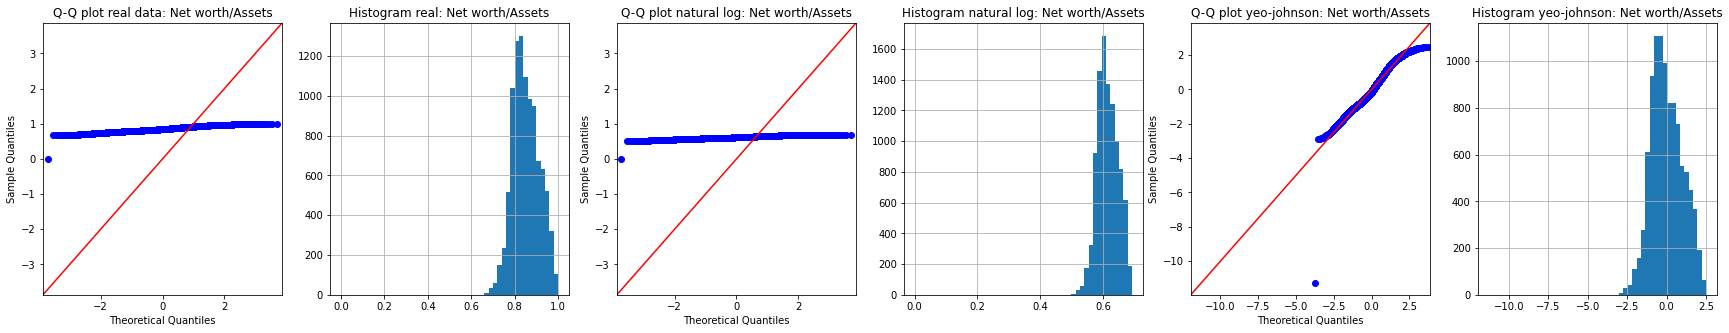

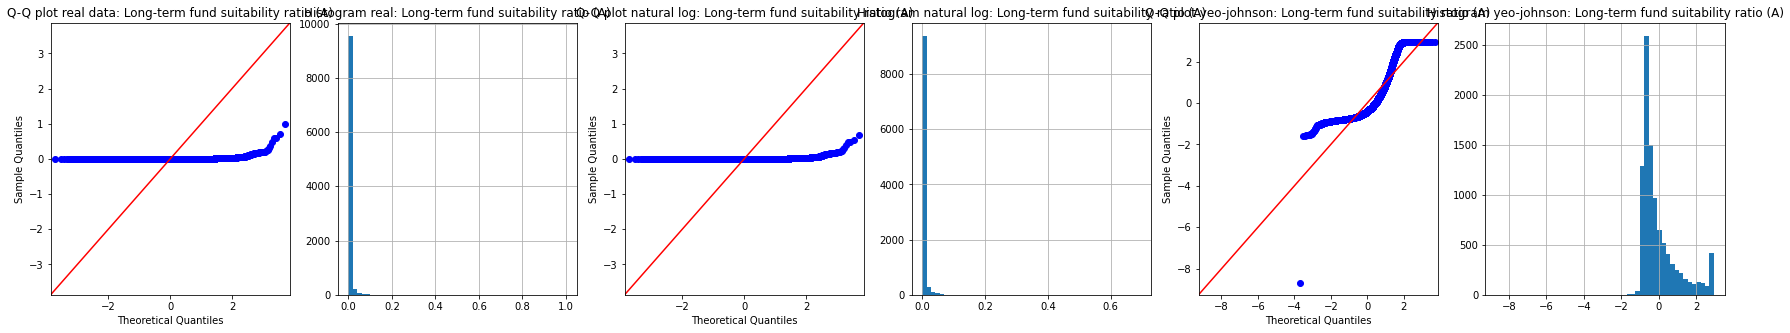

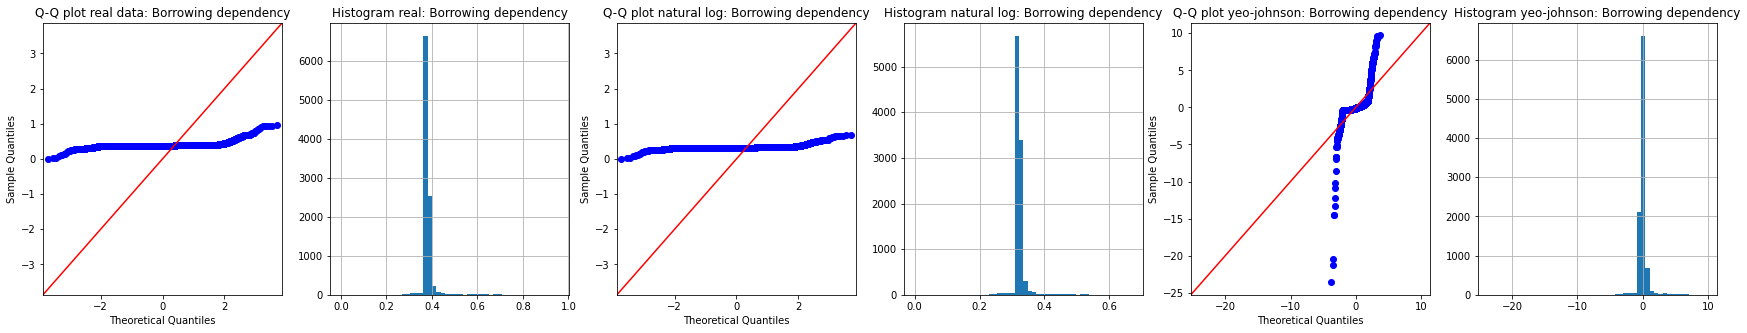

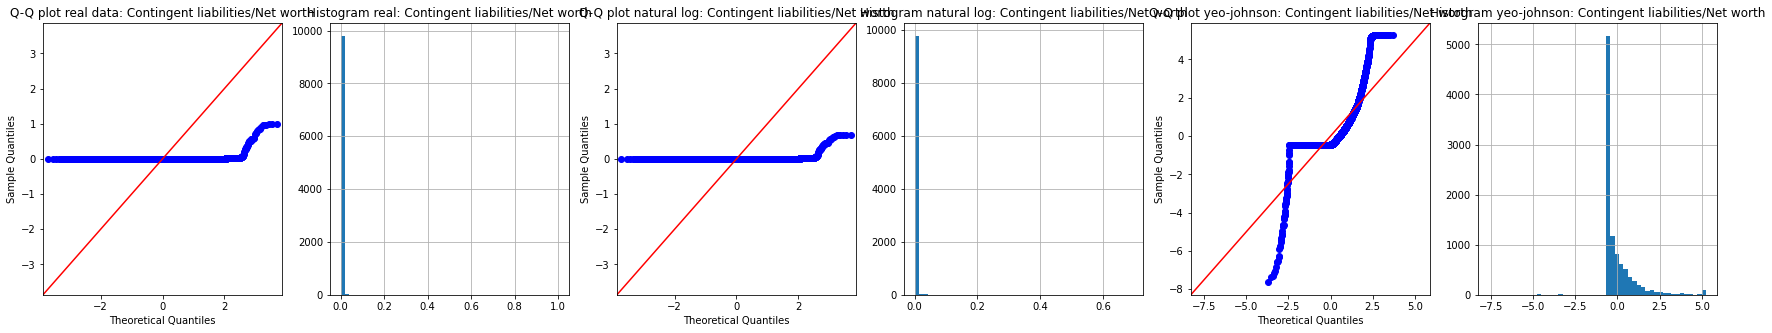

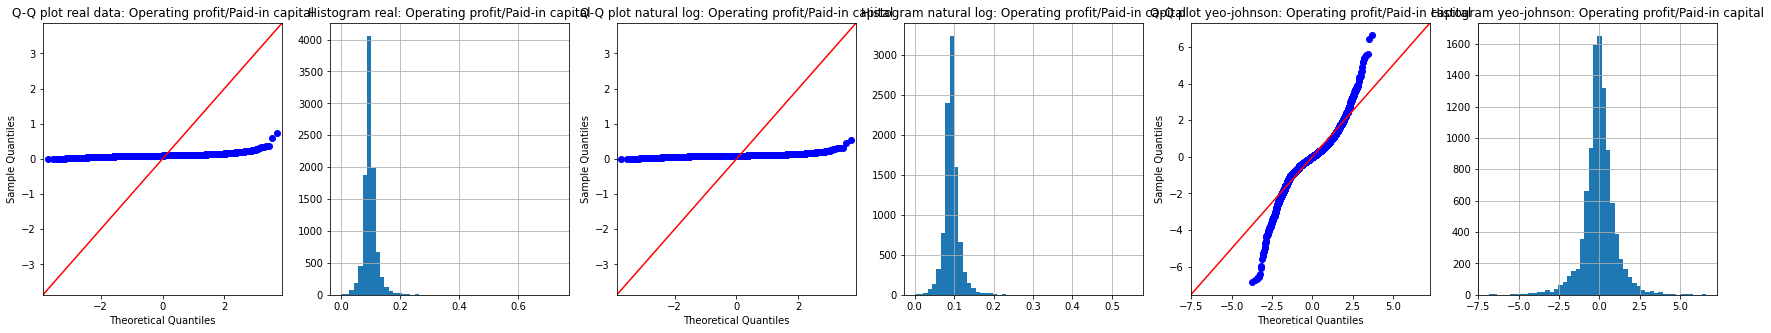

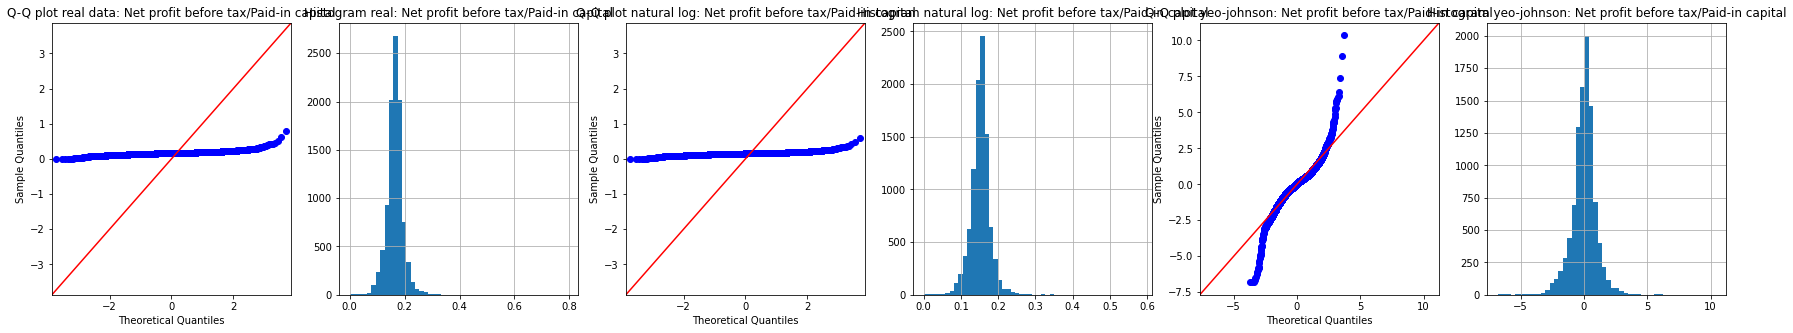

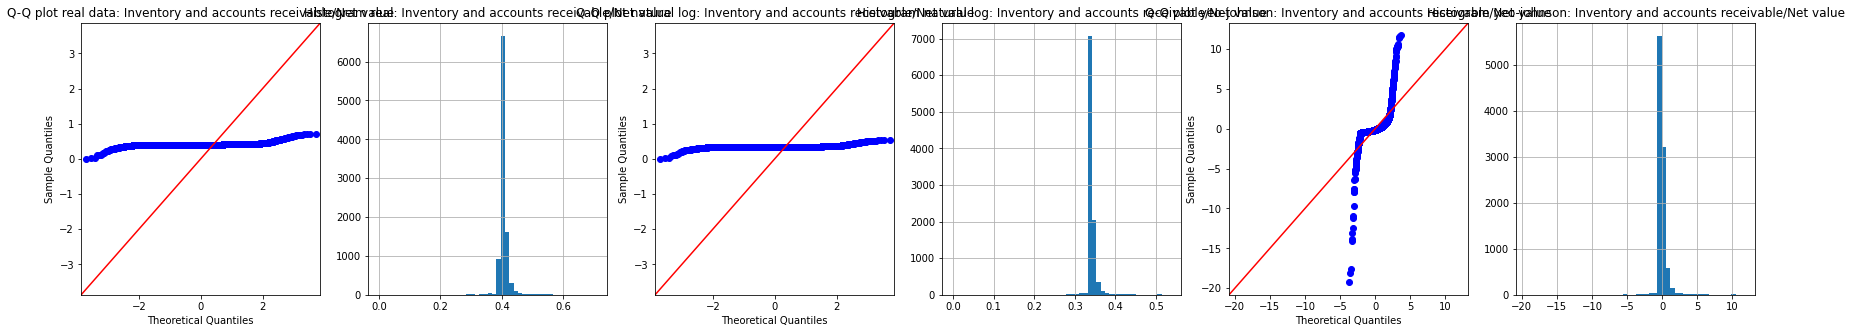

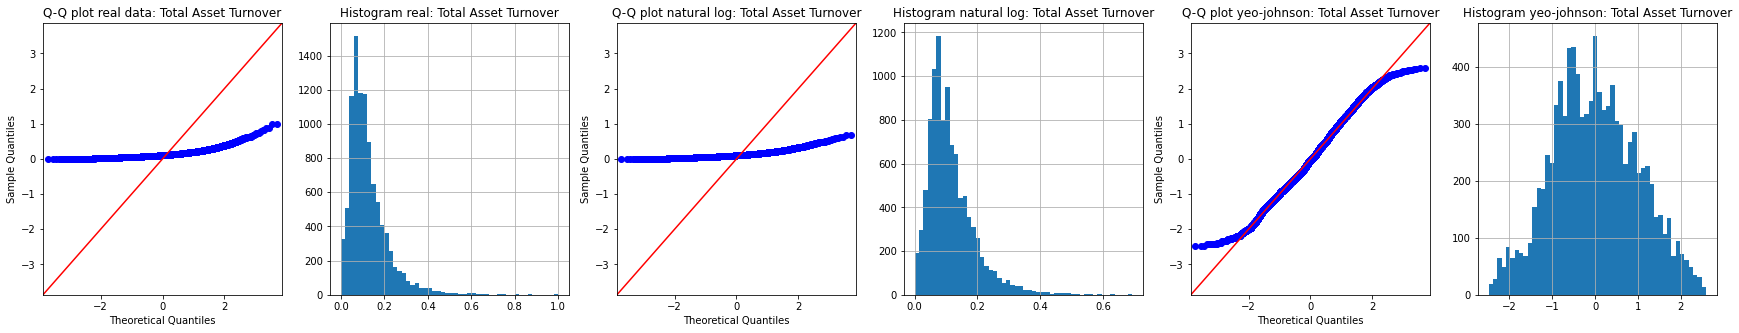

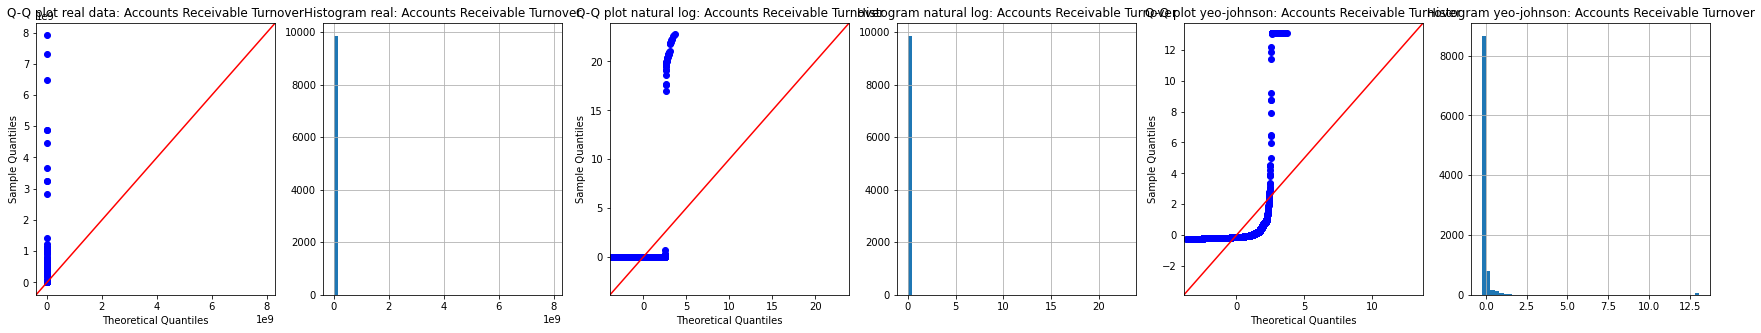

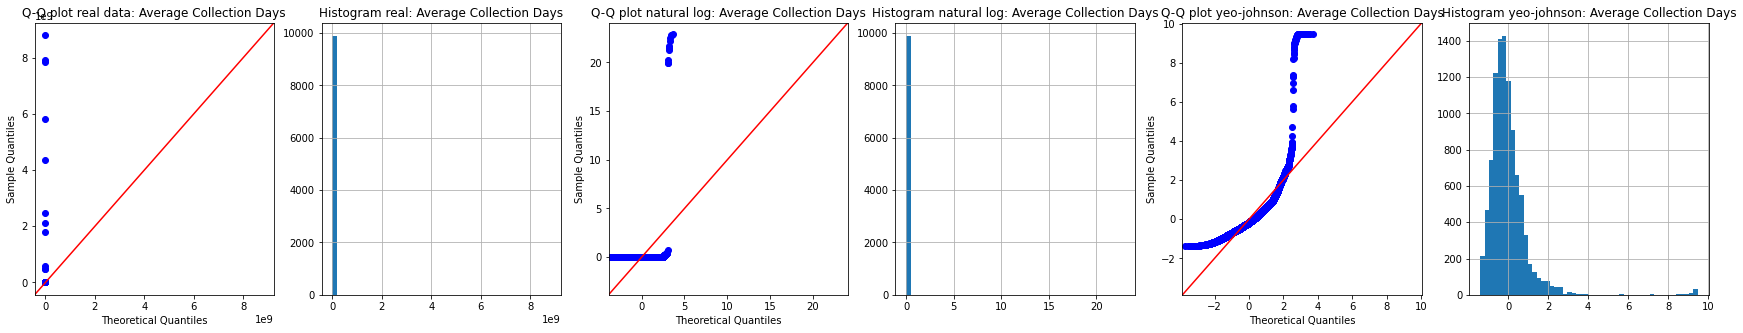

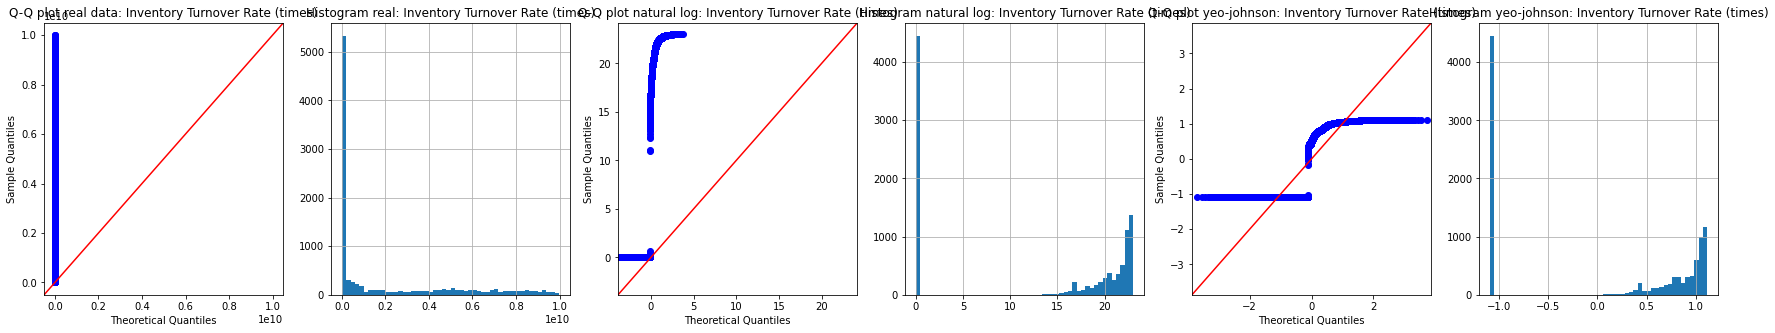

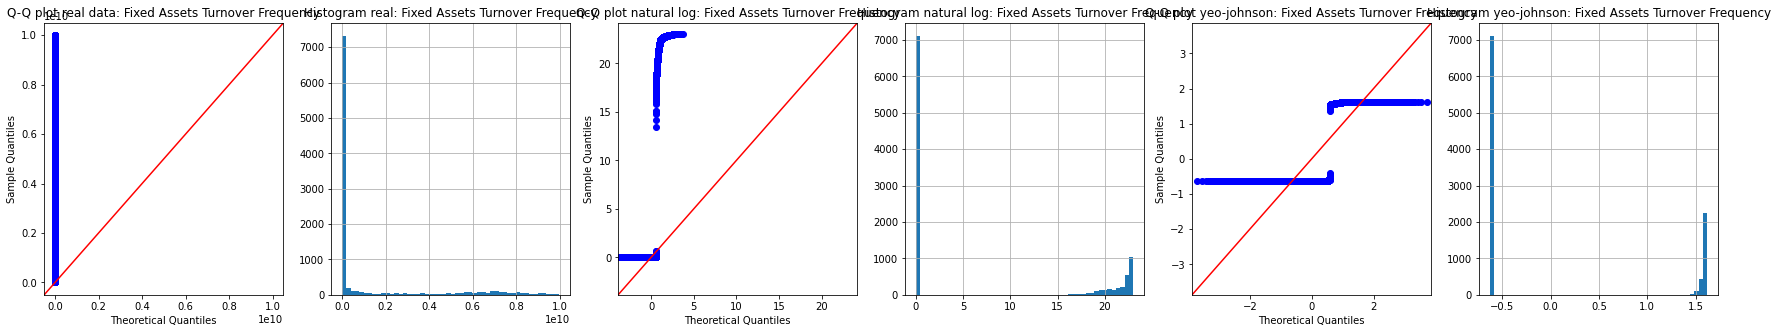

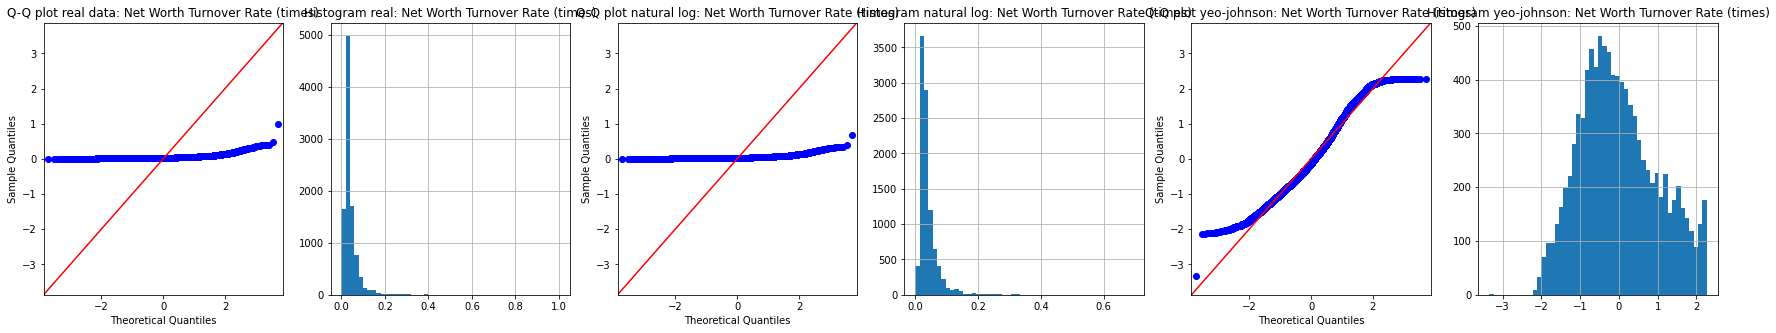

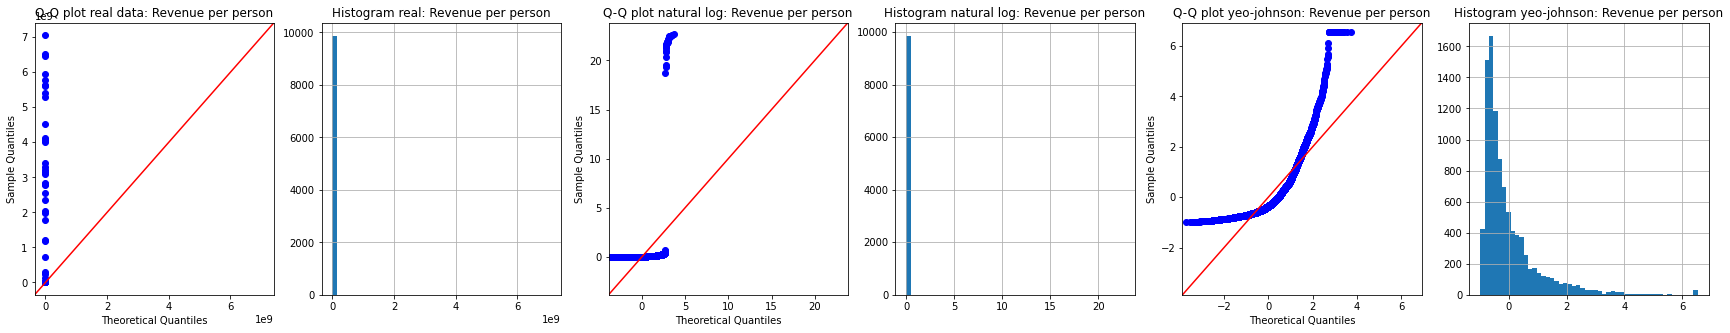

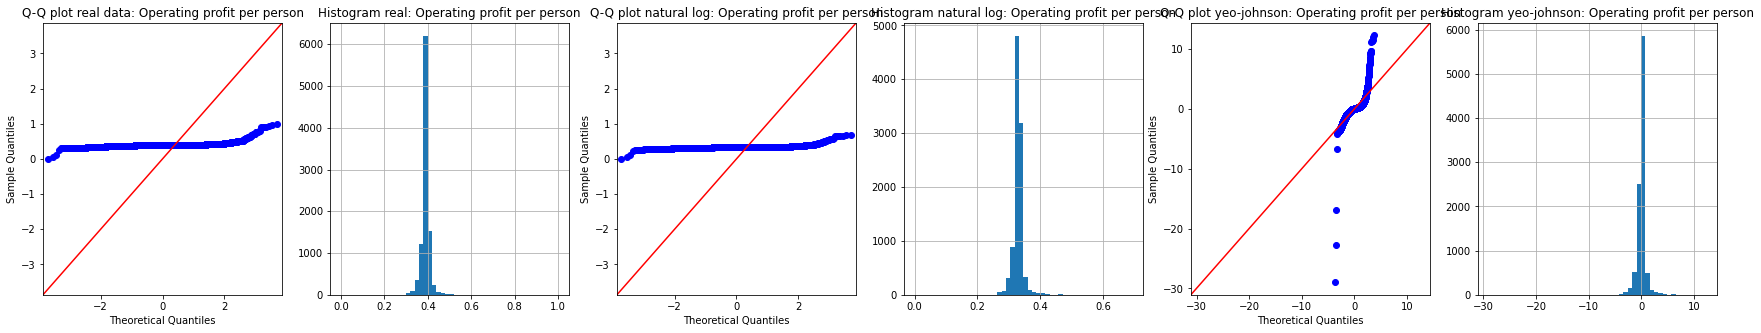

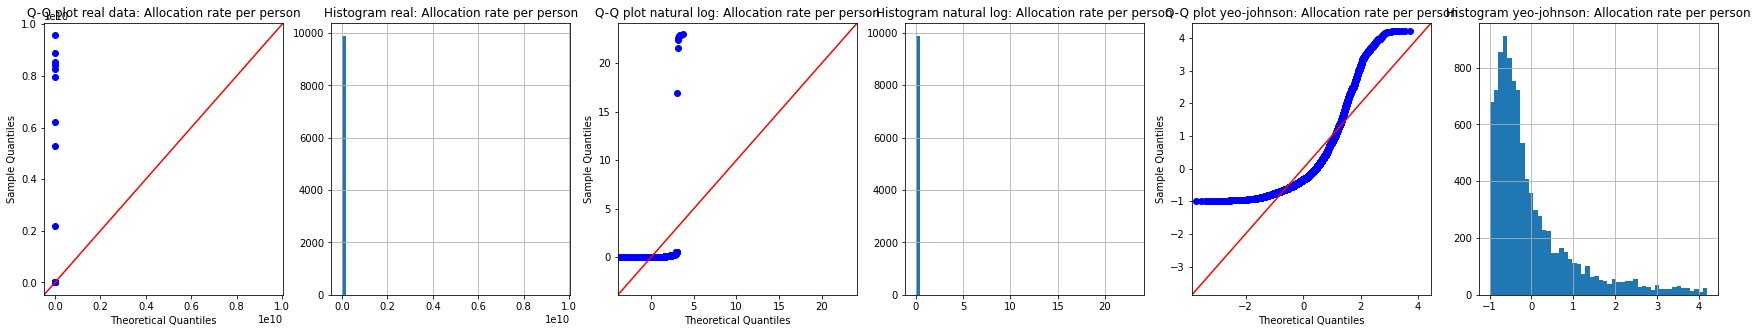

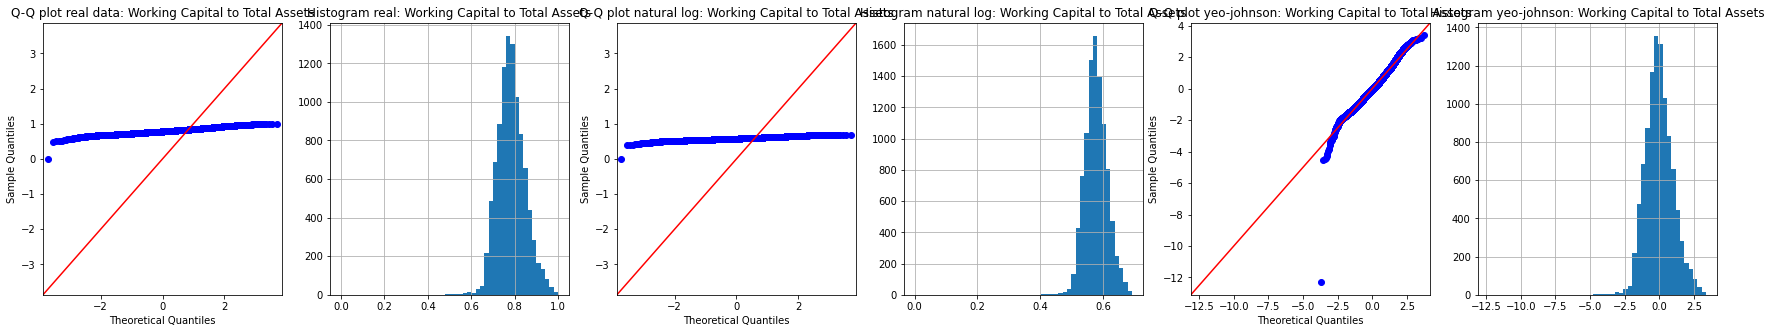

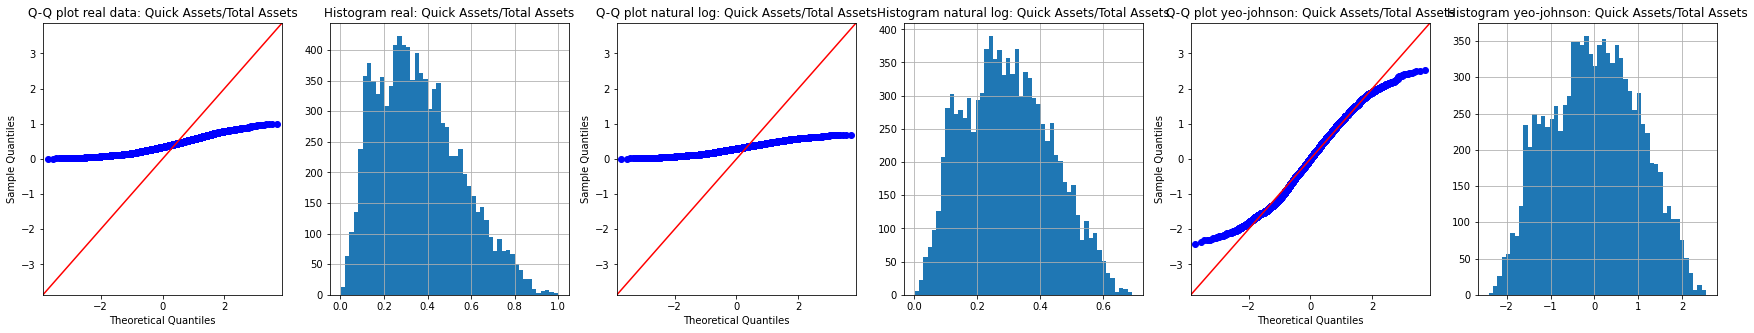

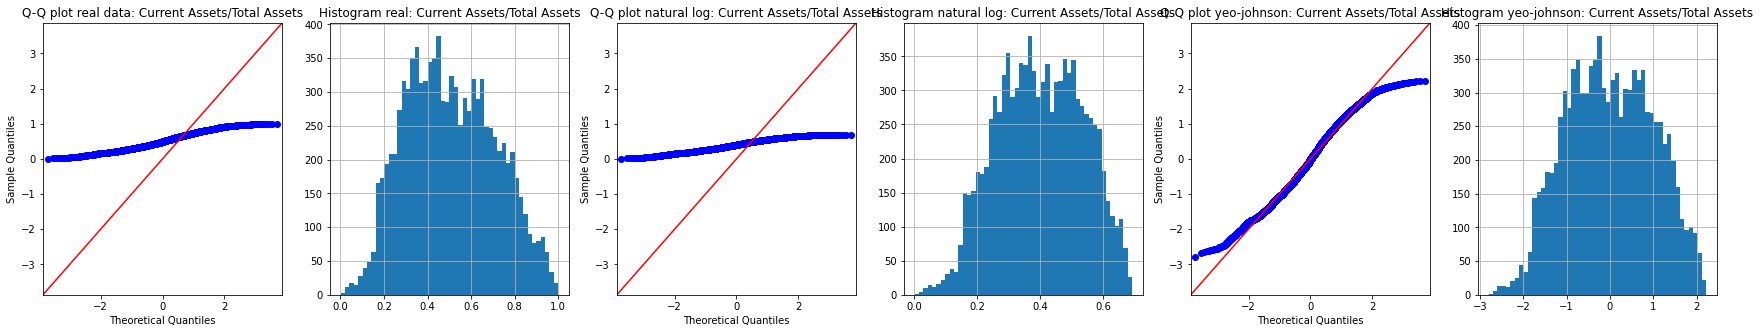

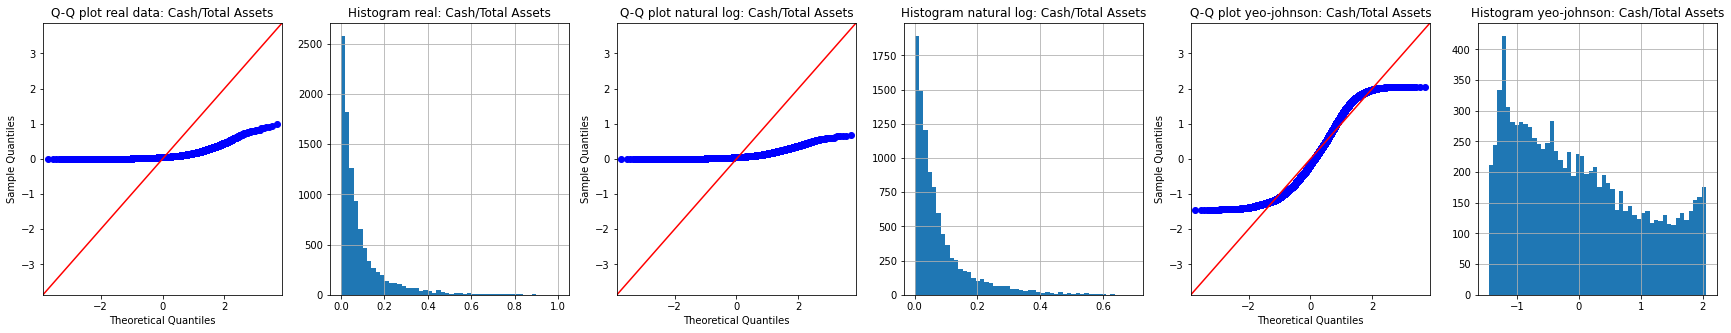

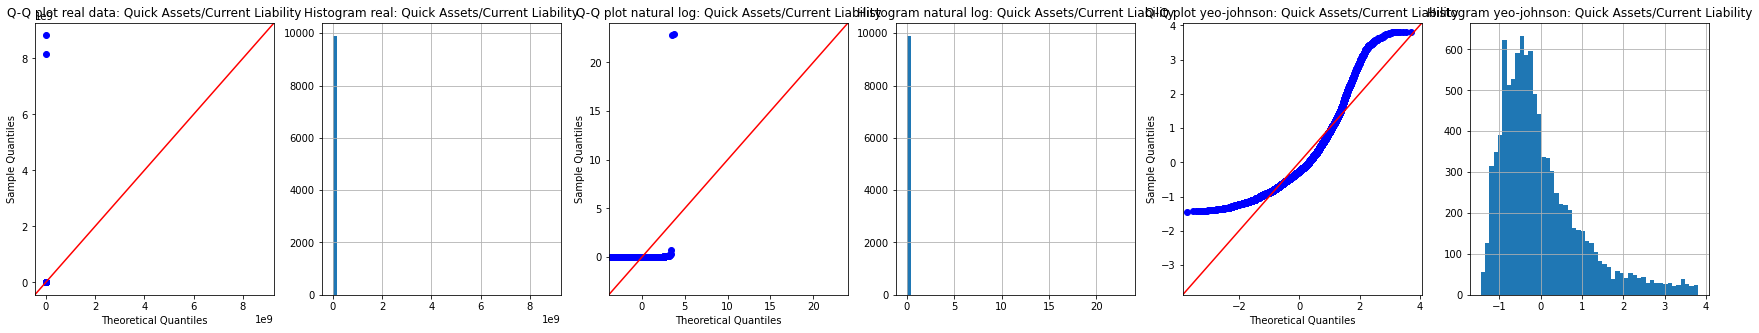

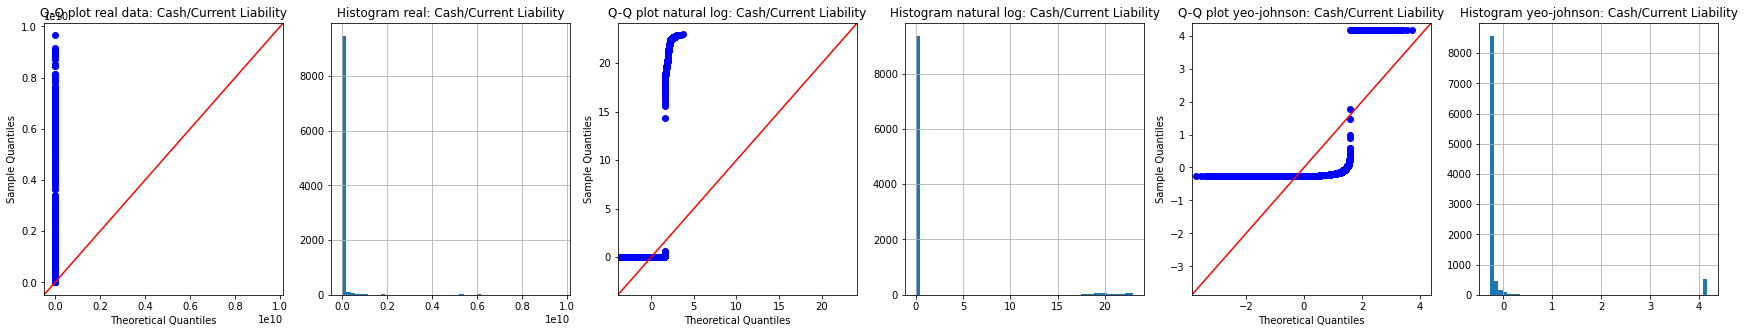

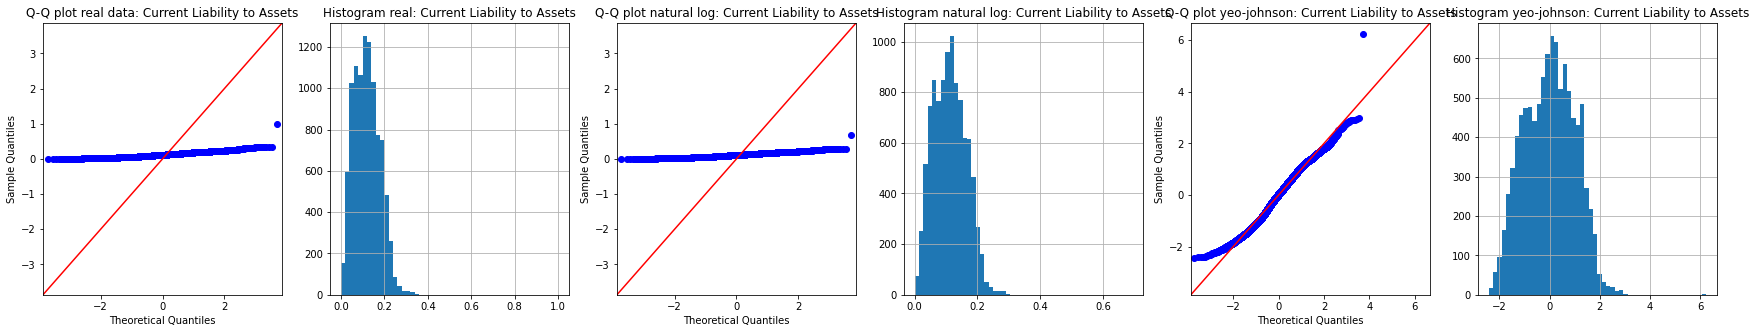

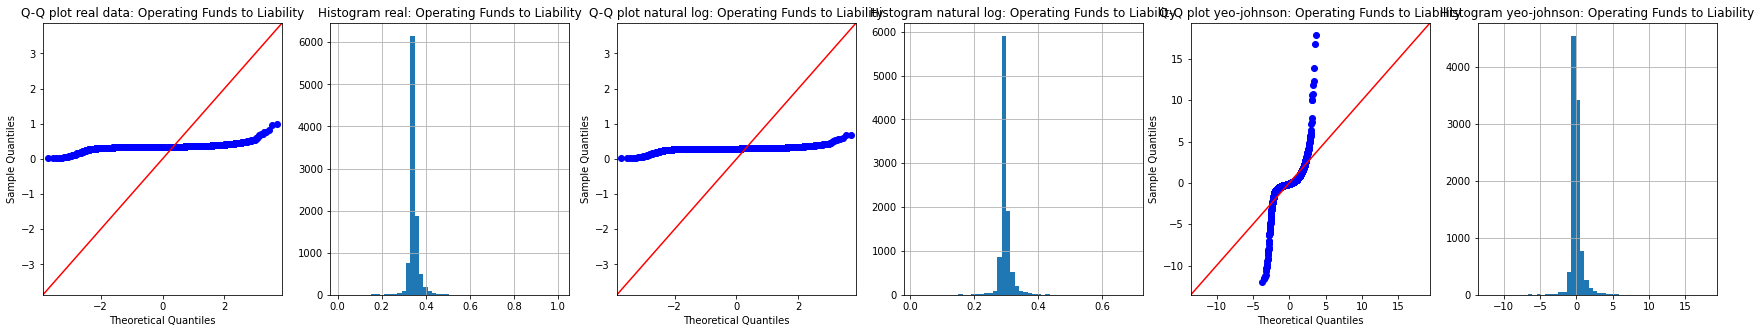

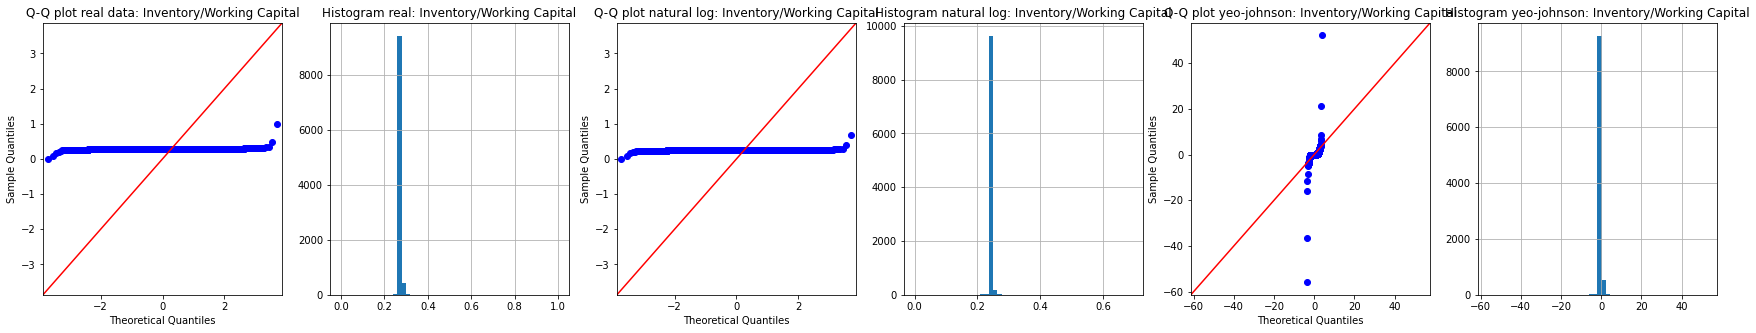

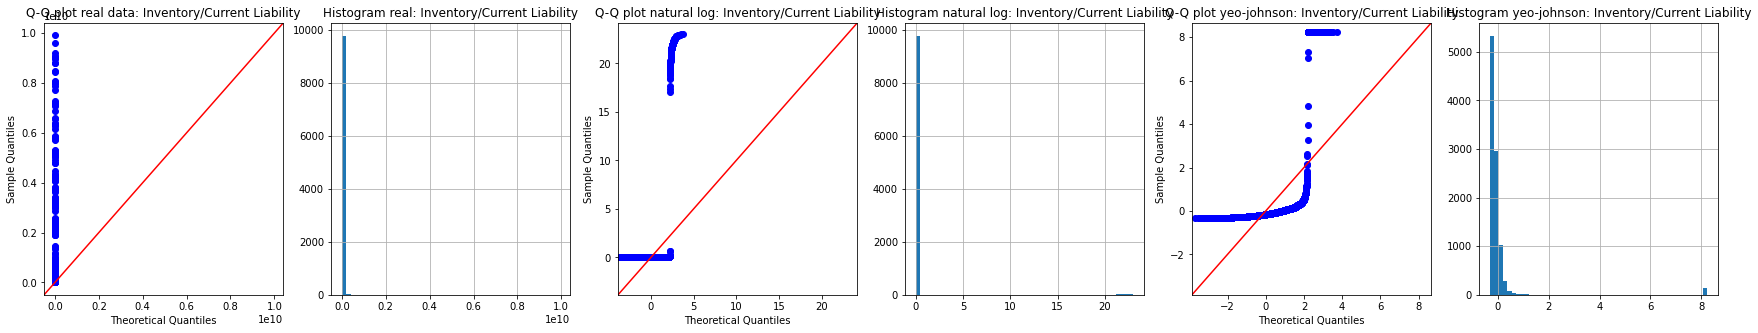

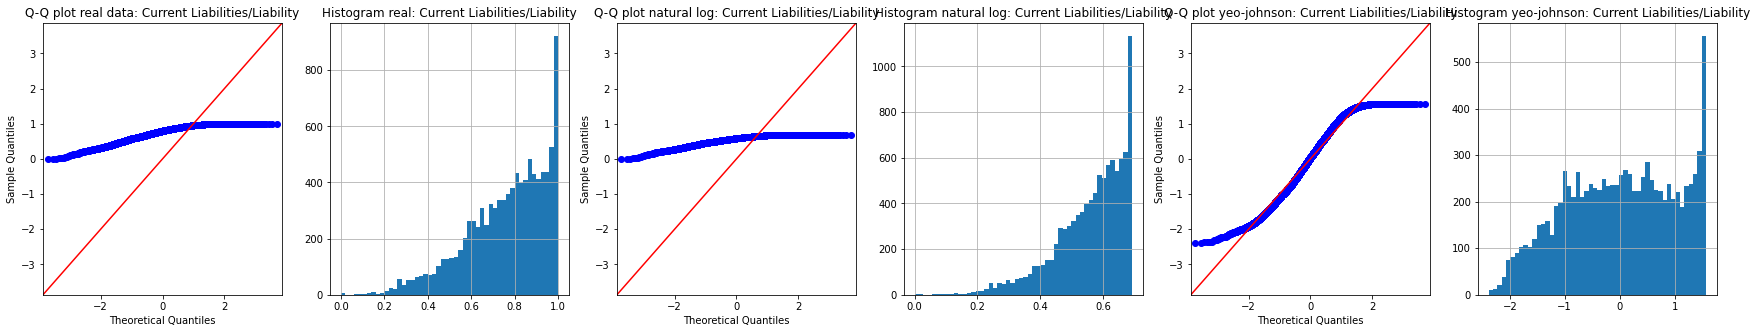

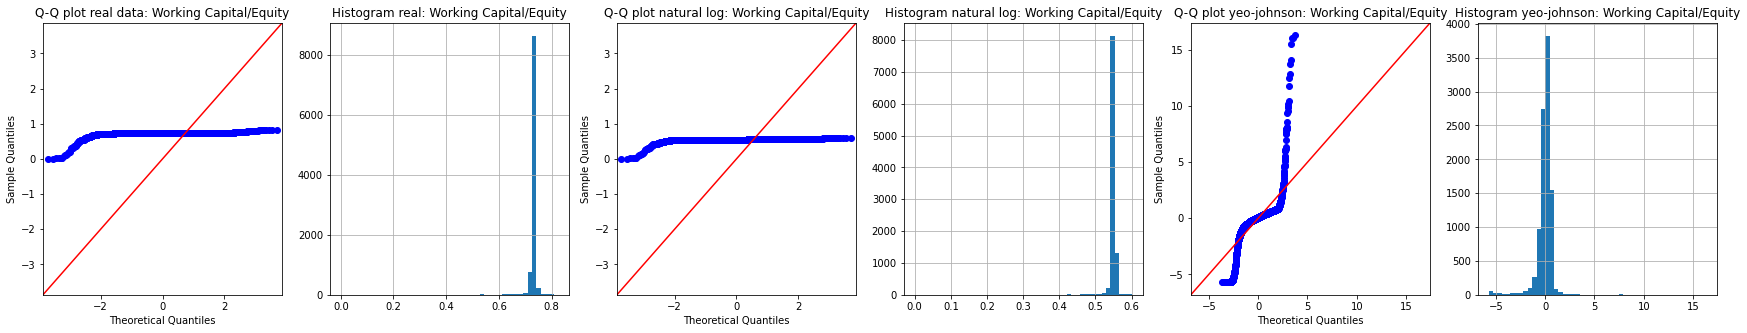

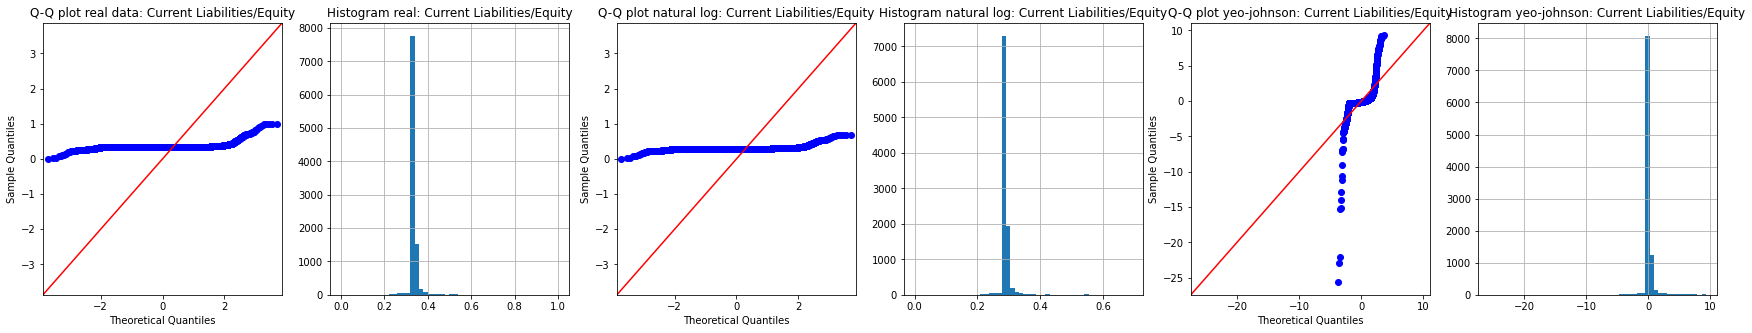

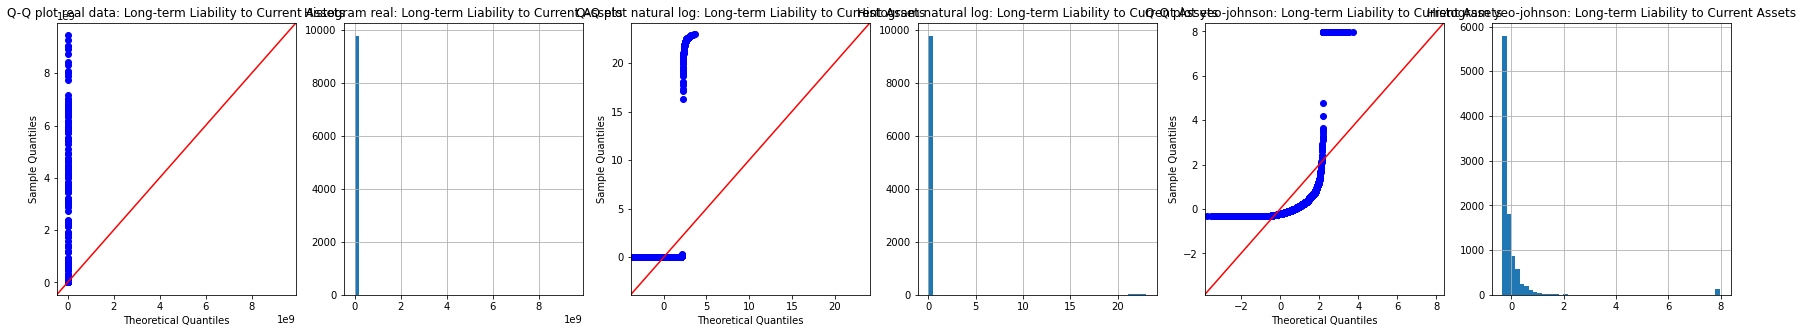

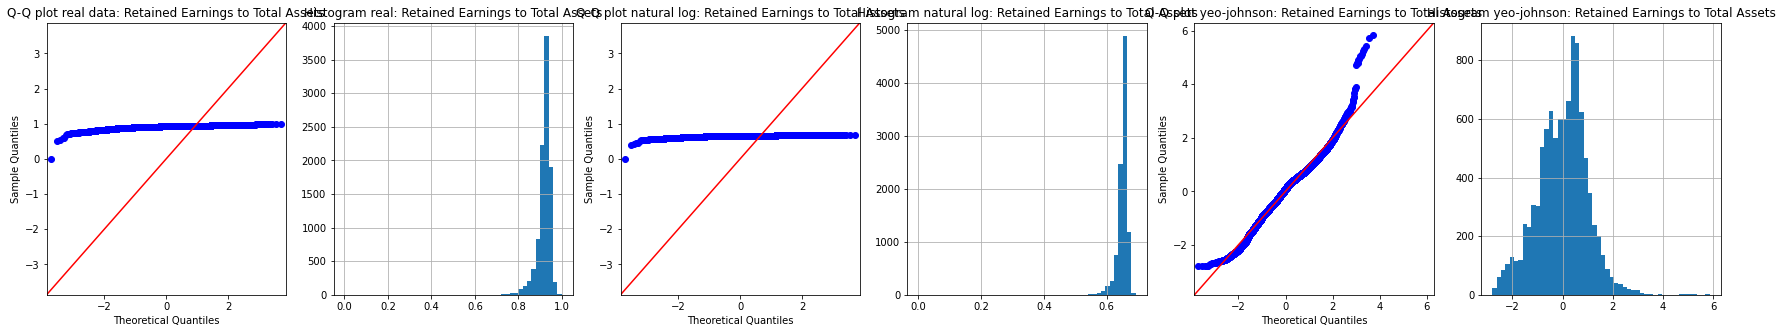

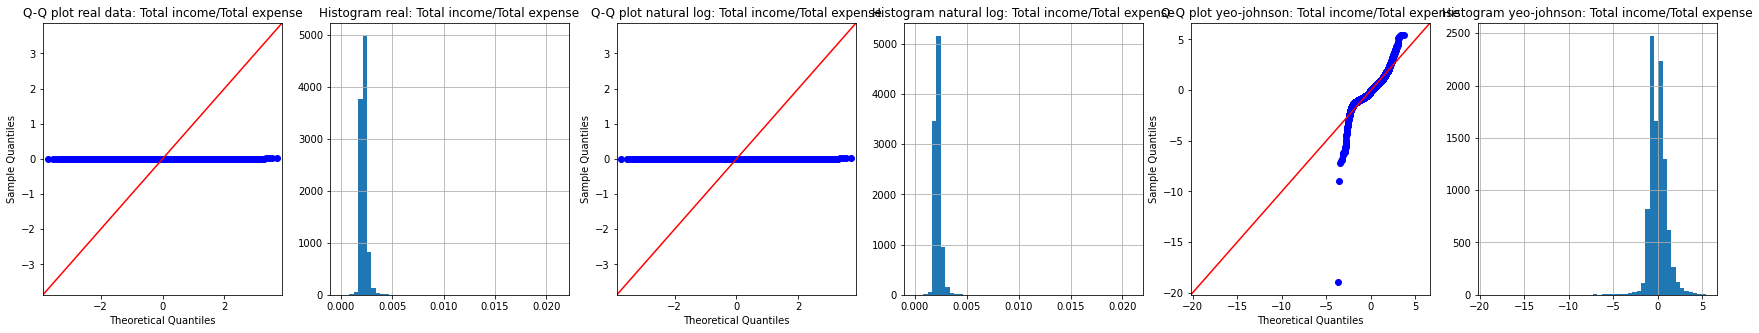

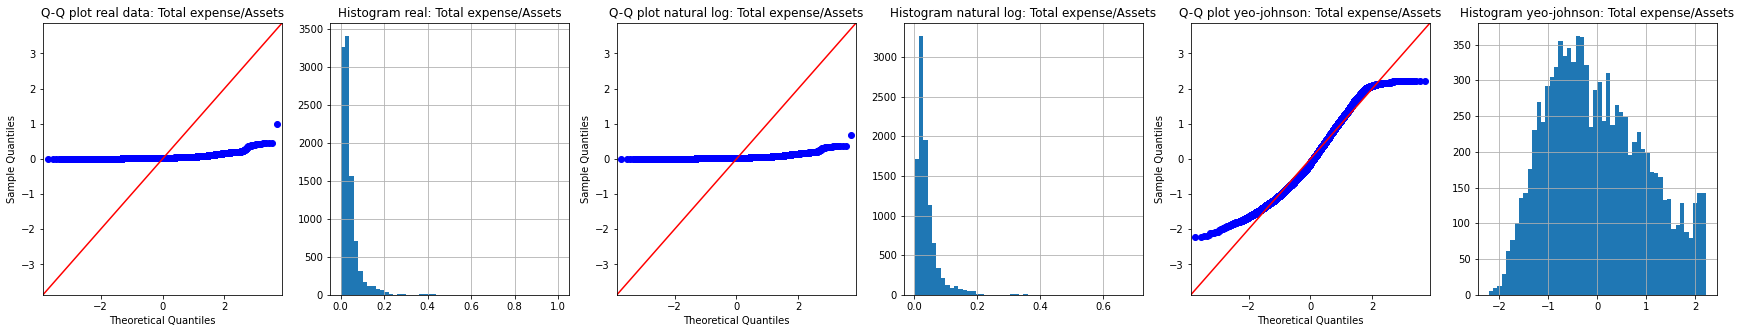

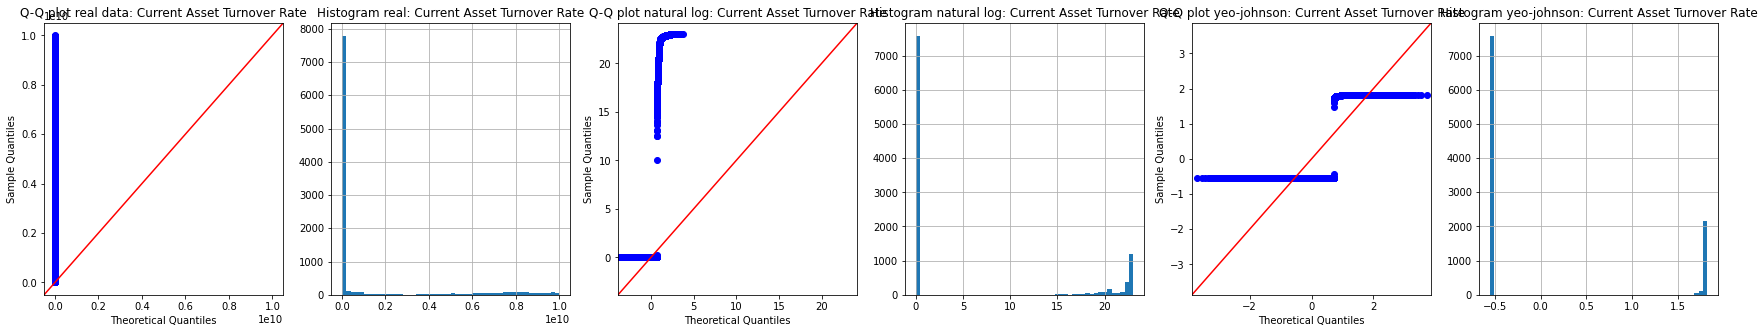

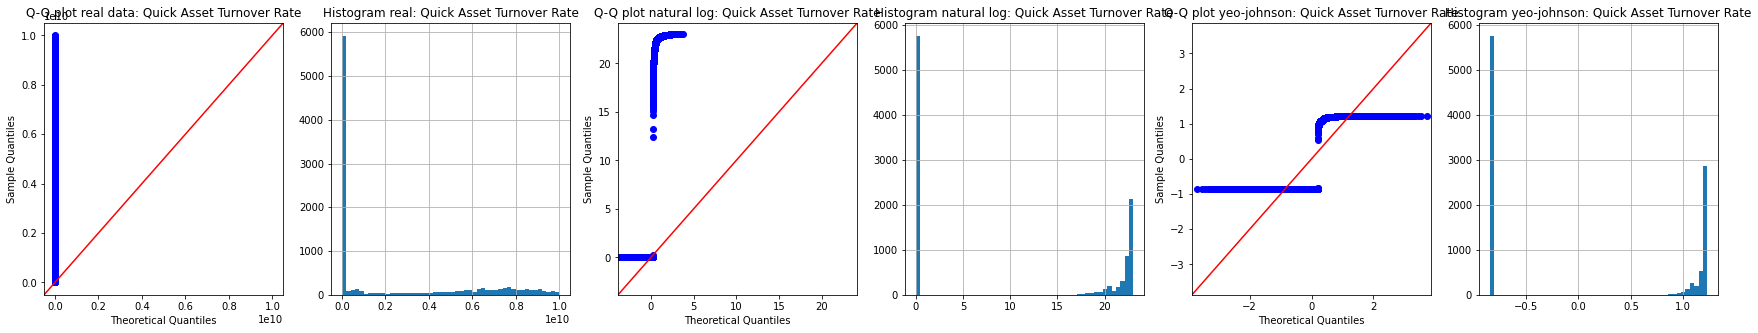

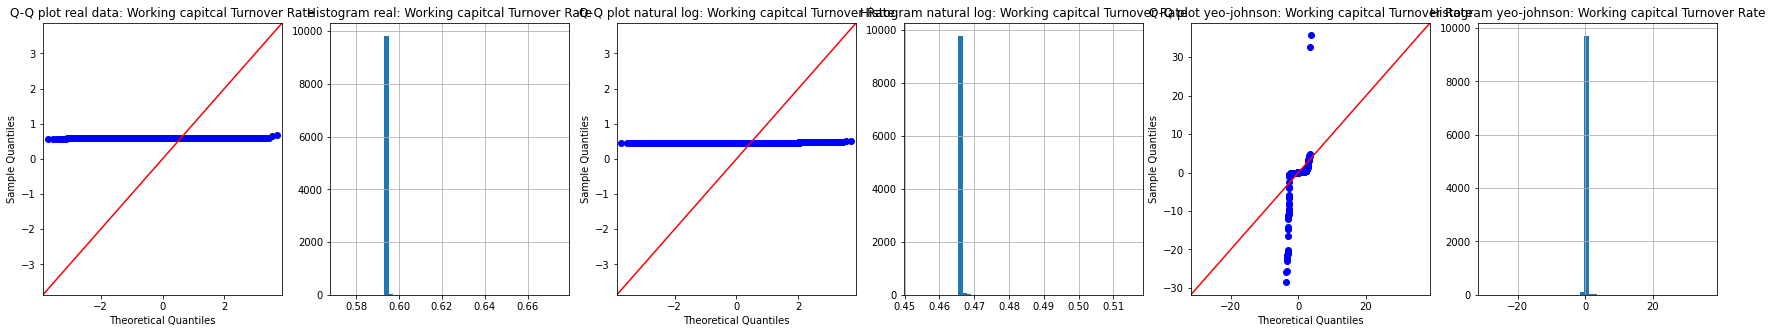

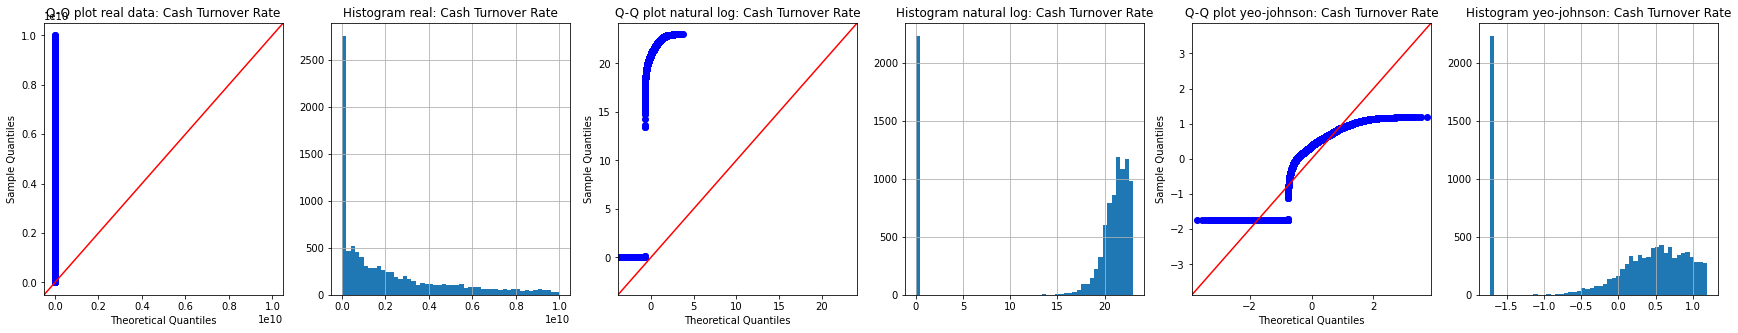

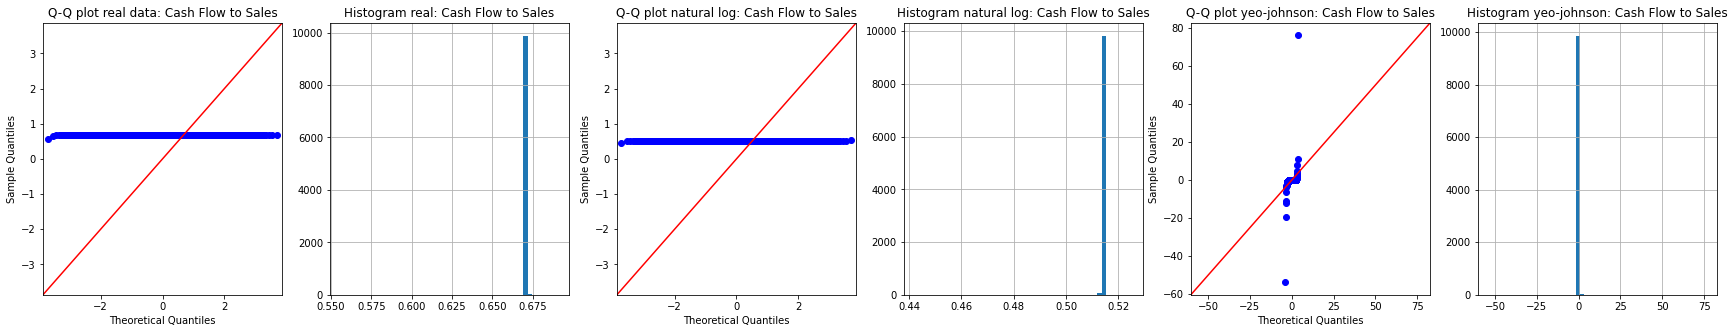

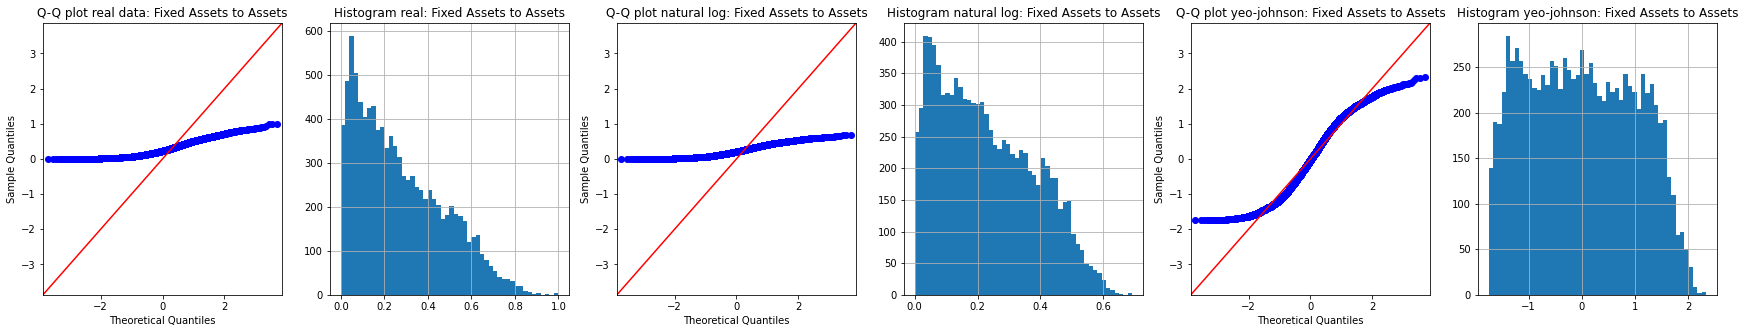

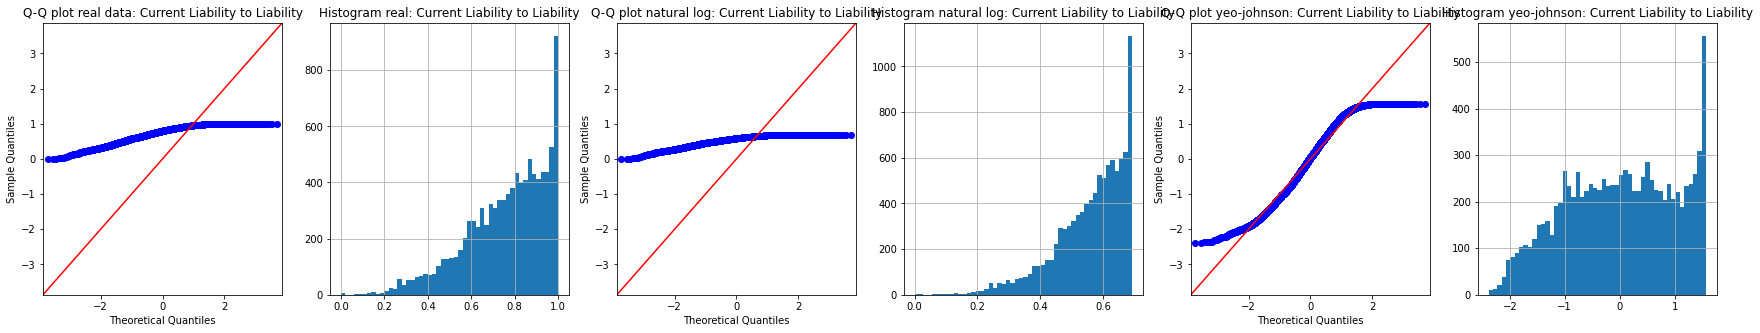

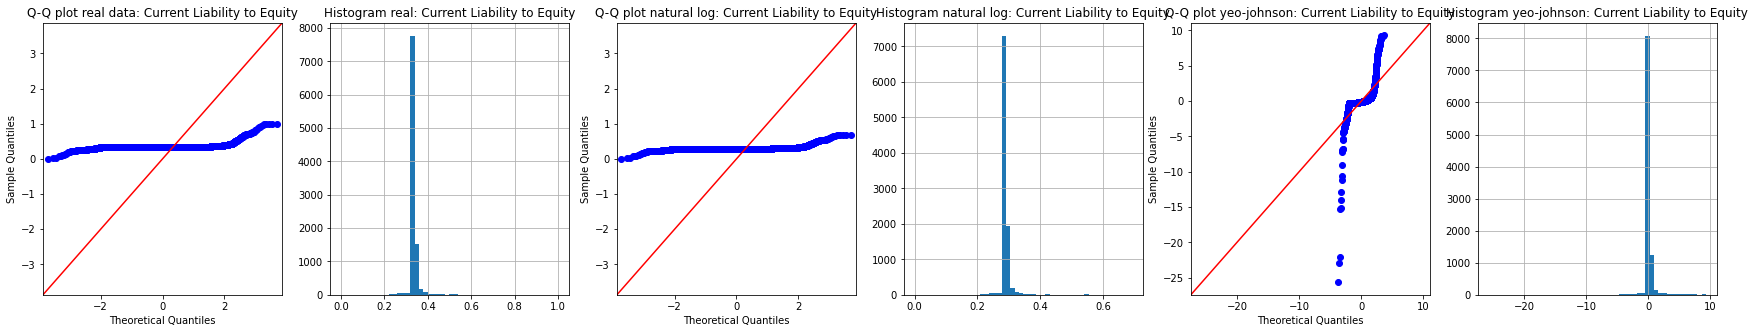

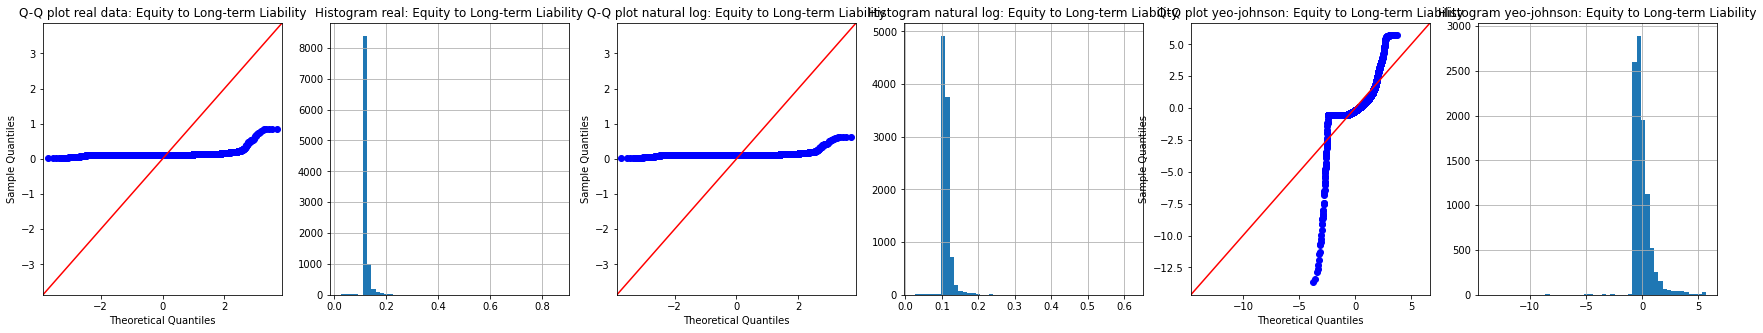

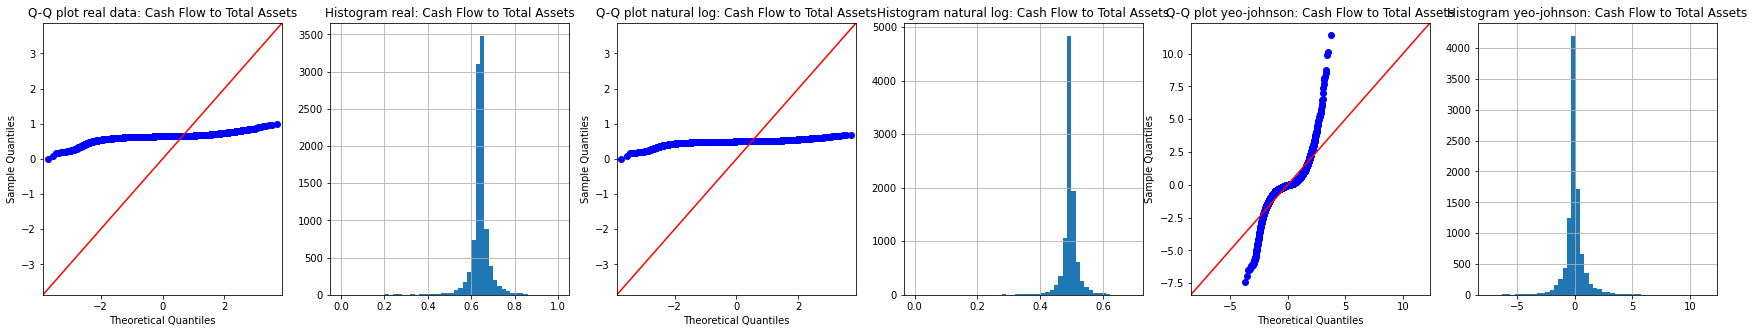

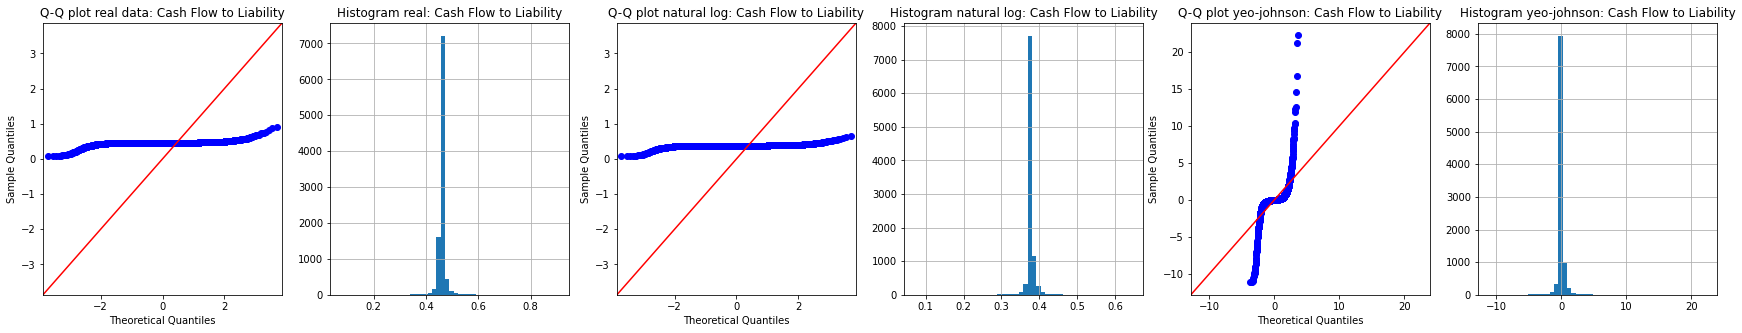

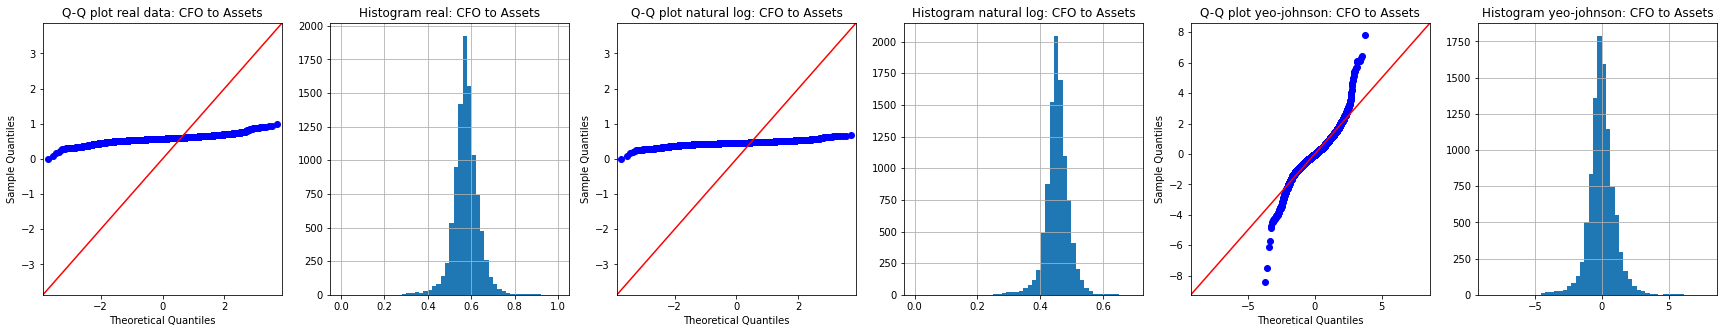

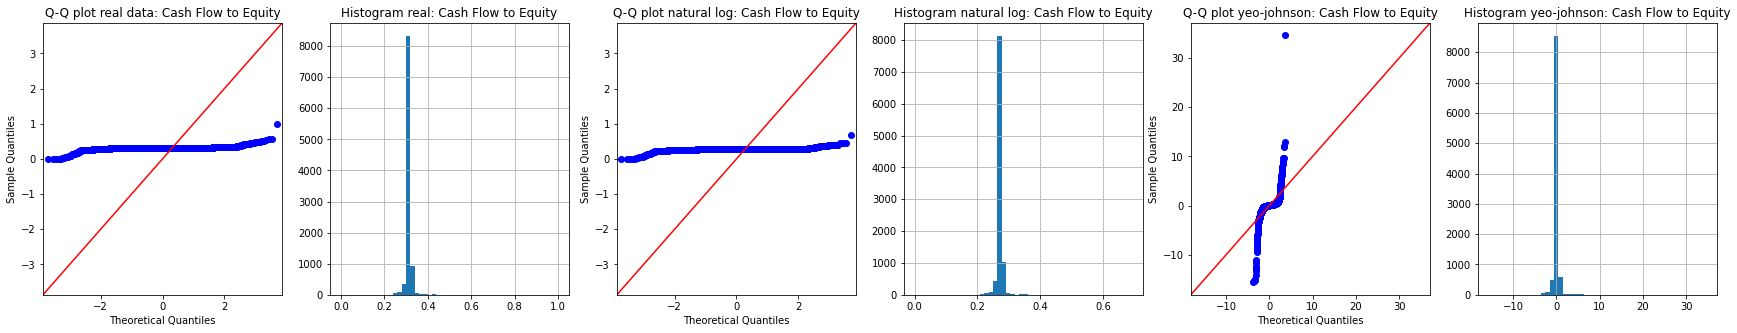

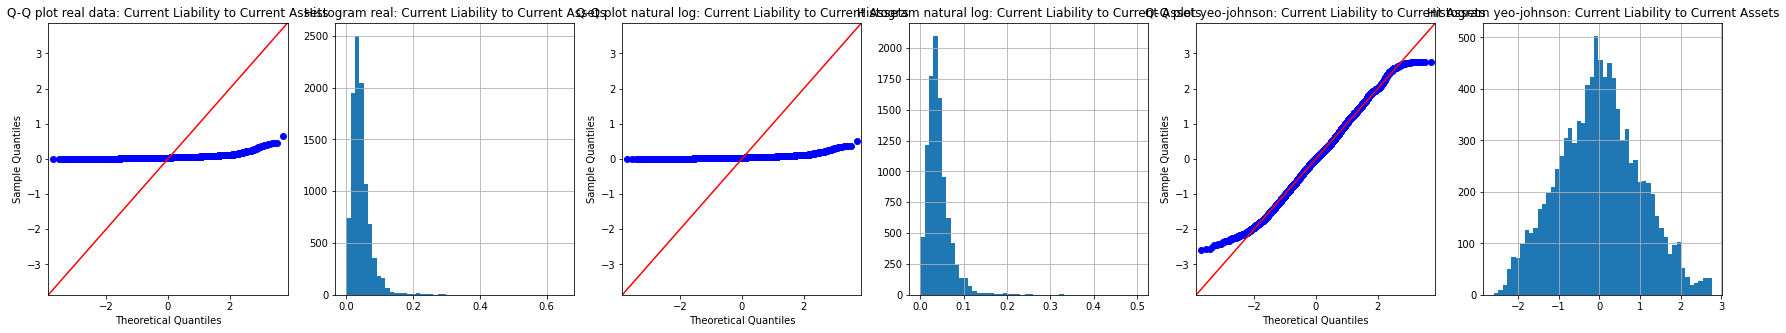

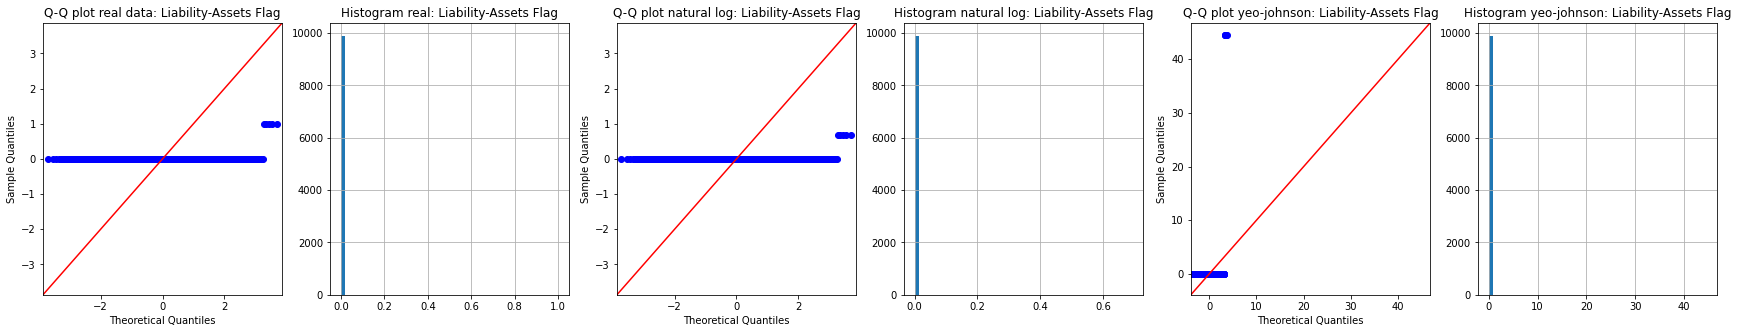

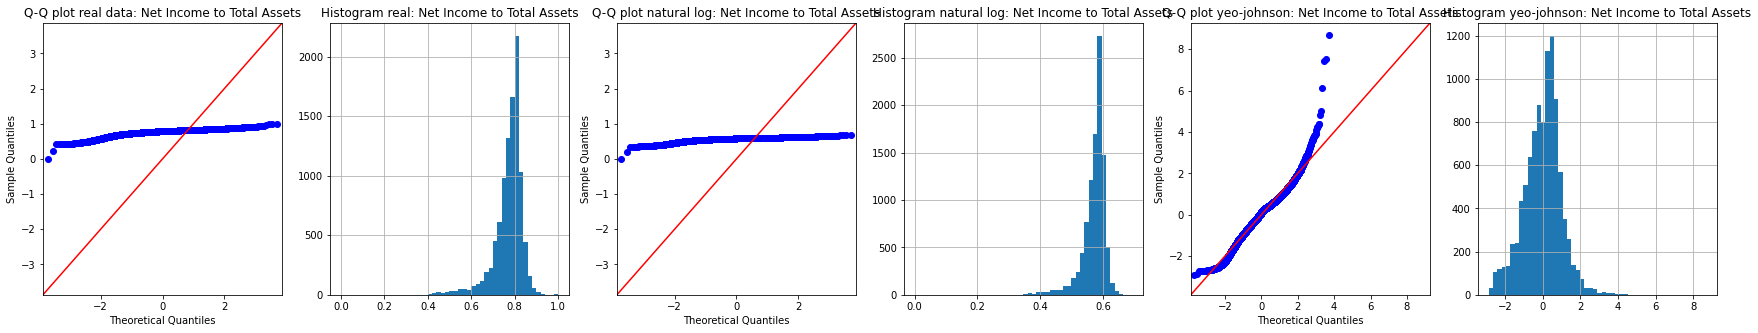

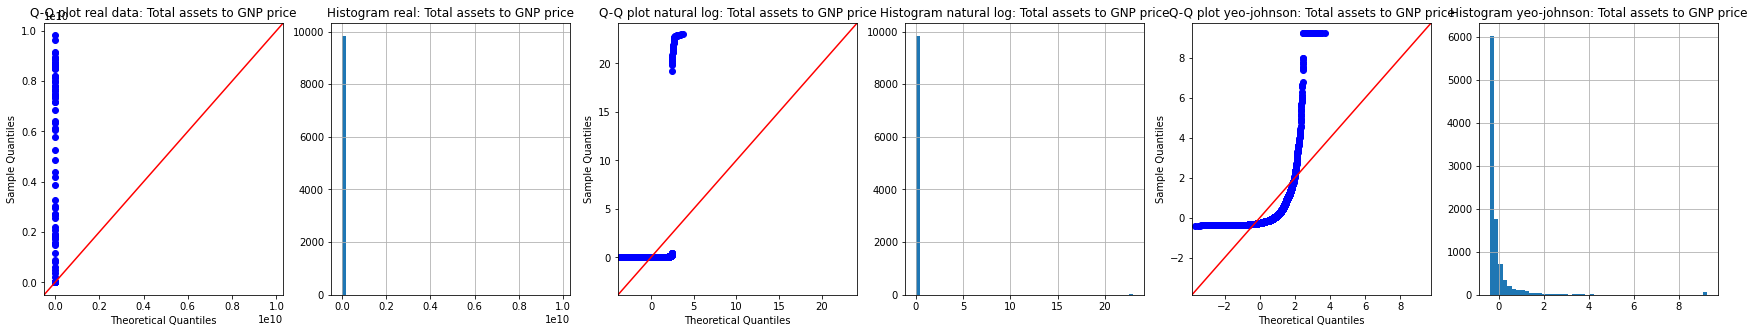

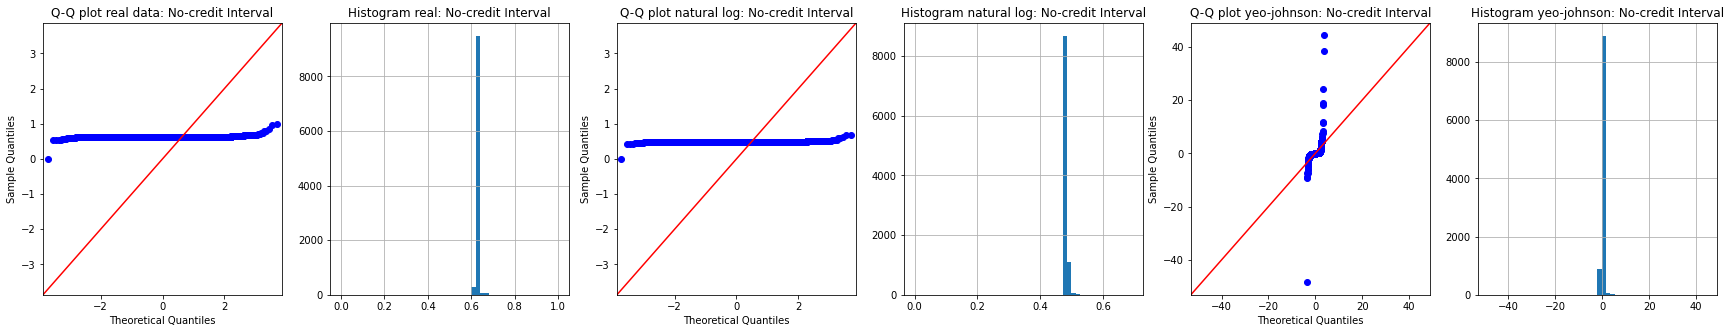

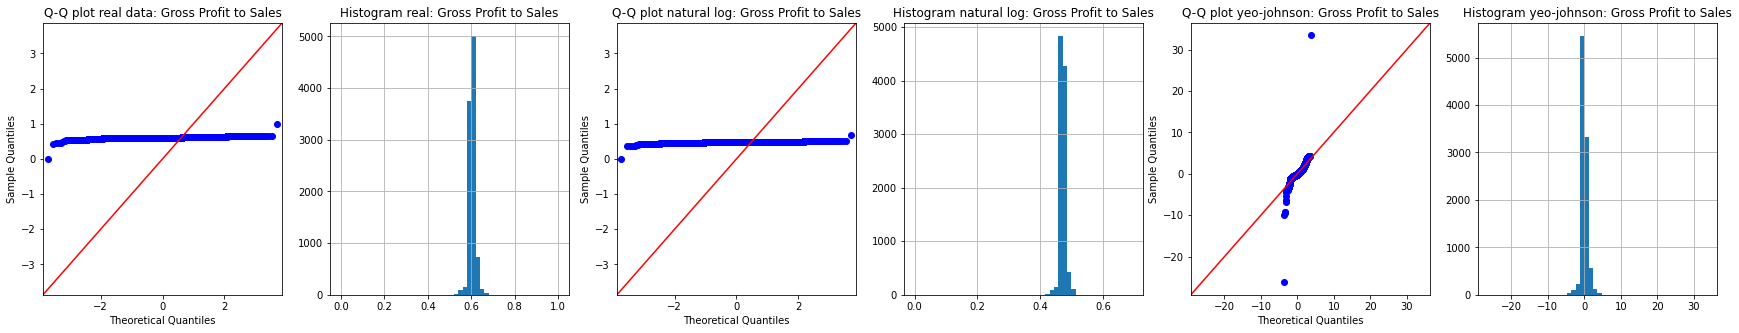

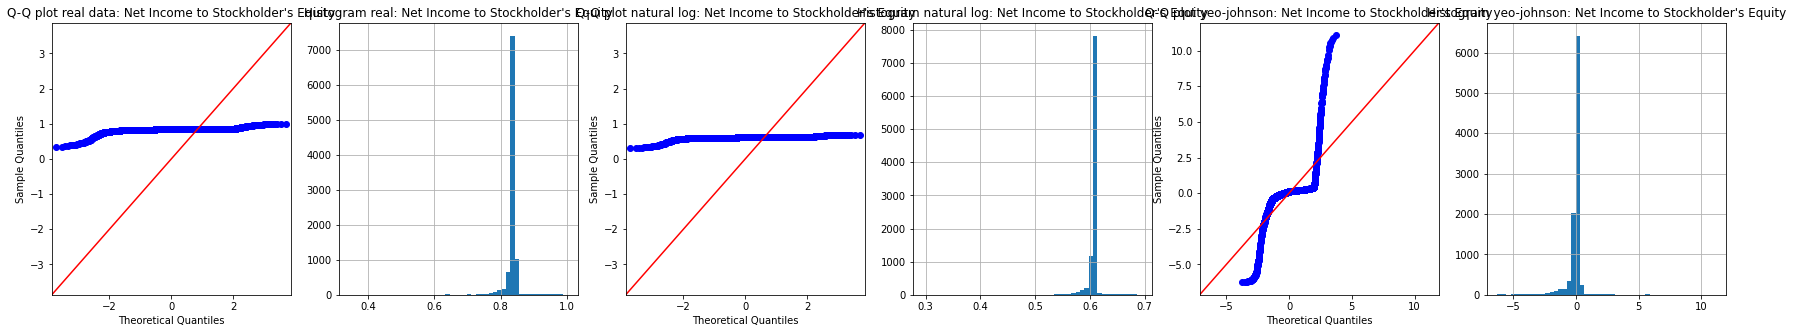

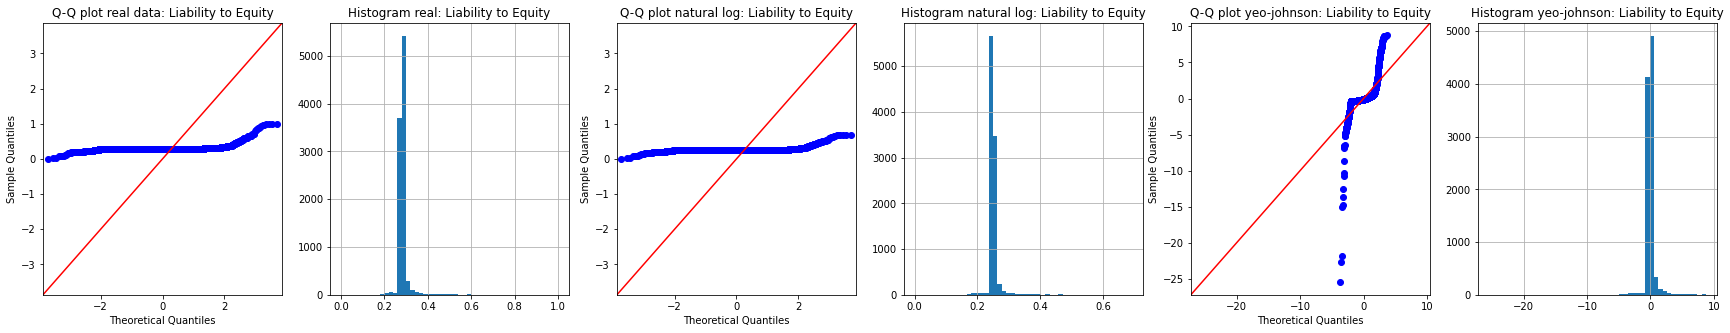

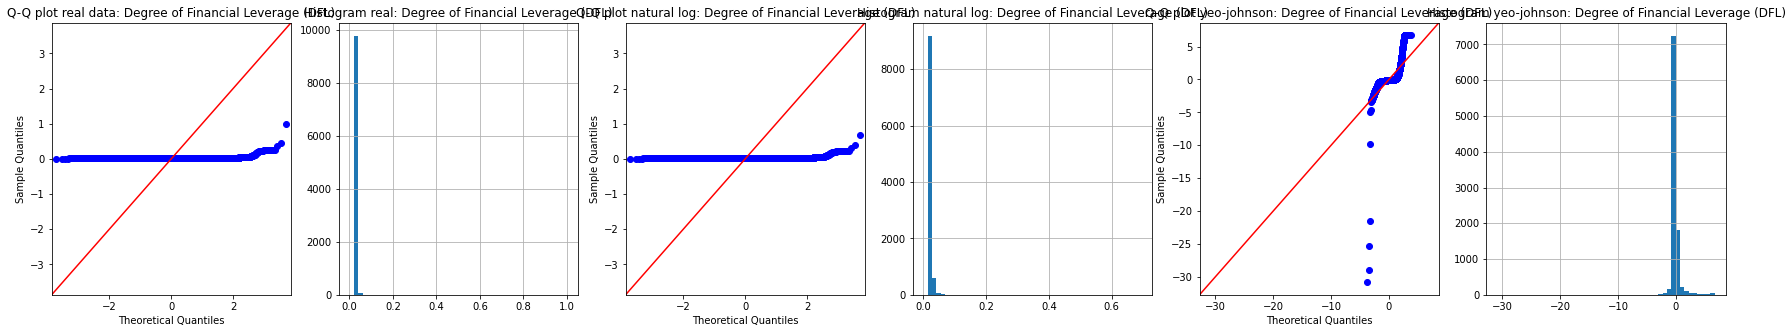

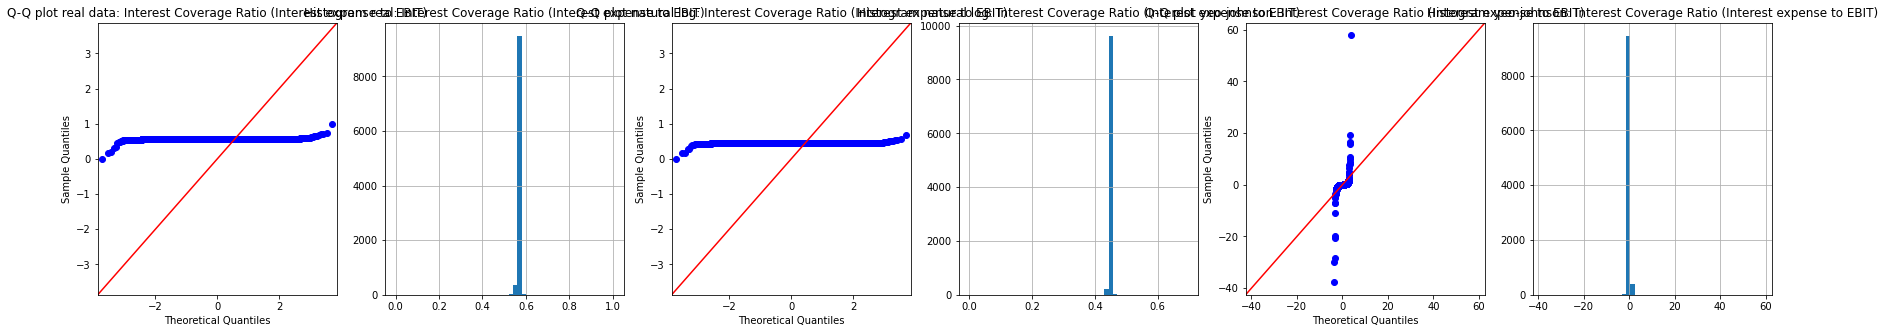

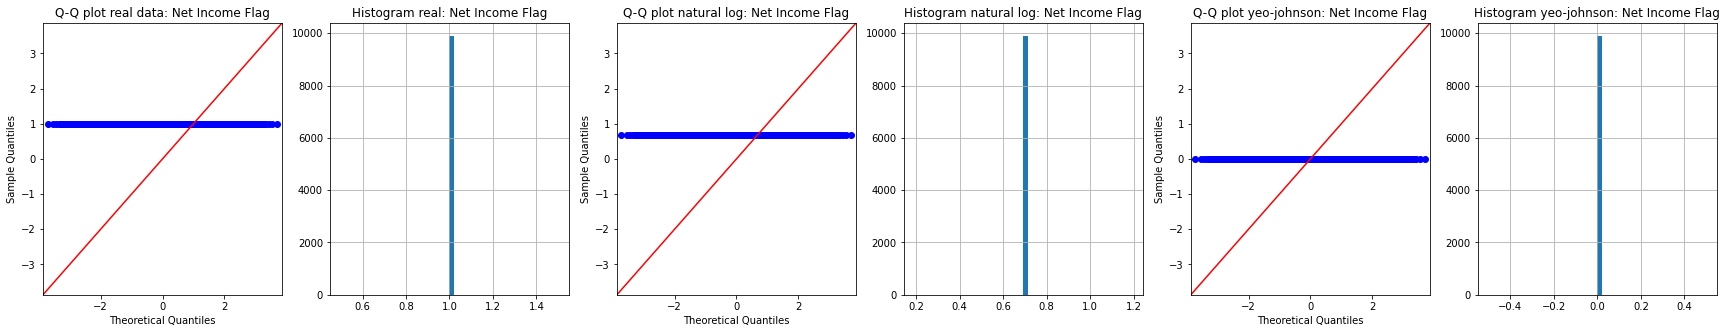

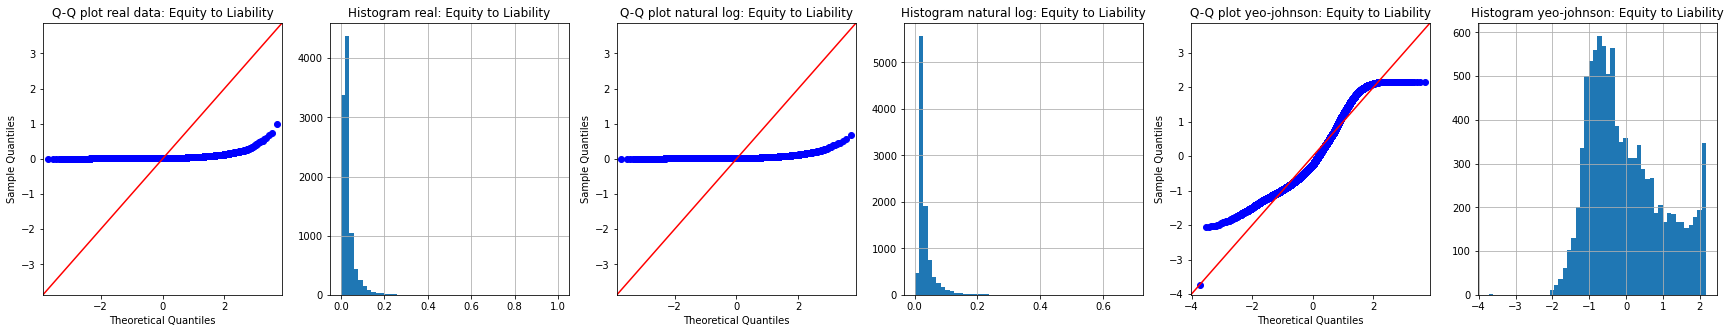

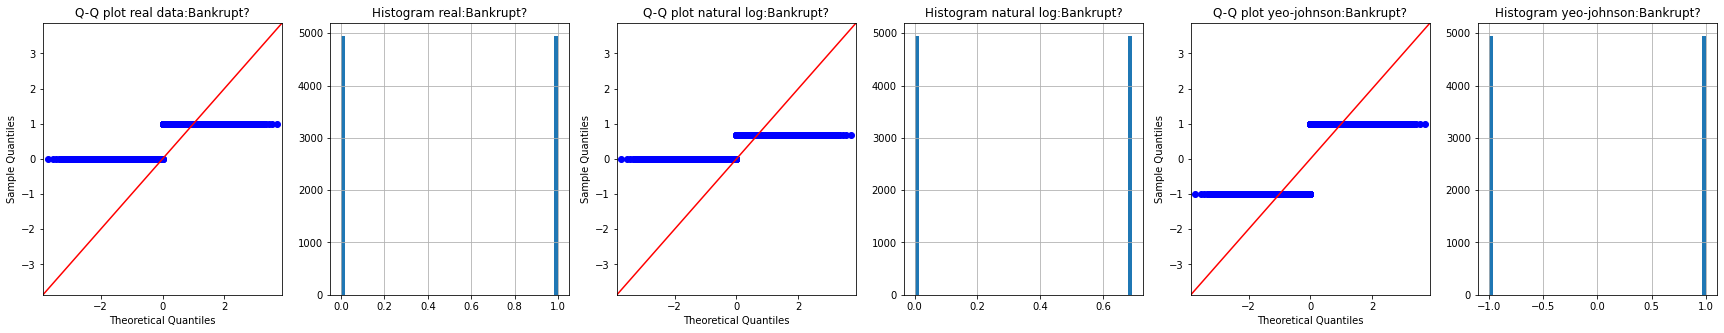

In [17]:
cols= oversampled_real_data.columns

#Natural Log transformation
nat_oversampled_real_data = np.log1p(oversampled_real_data)

#Power transformation
yeo_power = PowerTransformer(method='yeo-johnson', standardize=True)
yeo_oversampled_real_data = yeo_power.fit_transform(oversampled_real_data)
yeo_oversampled_real_data = pd.DataFrame(yeo_oversampled_real_data, columns = cols)





for i in range(0,96):
    
    
    fig, ax = plt.subplots(1,6, figsize=(30, 5))
    
    sm.qqplot(oversampled_real_data[cols[i]], line='45', ax=ax[0])
    ax[0].set_title('Q-Q plot real data:'+ cols[i])
    
    oversampled_real_data[cols[i]].hist(bins = 50, ax=ax[1])
    ax[1].set_title('Histogram real:'+ cols[i])
    
    sm.qqplot(nat_oversampled_real_data[cols[i]], line='45', ax=ax[2])
    ax[2].set_title('Q-Q plot natural log:'+ cols[i])
    
    nat_oversampled_real_data[cols[i]].hist(bins = 50, ax=ax[3])
    ax[3].set_title('Histogram natural log:'+ cols[i])
    
    
    sm.qqplot(yeo_oversampled_real_data[cols[i]], line='45', ax=ax[4])
    #plt.hist(yeo_oversampled_real_data, bins=25, ax=ax[3])
    ax[4].set_title('Q-Q plot yeo-johnson:'+ cols[i])
    
    yeo_oversampled_real_data[cols[i]].hist(bins = 50, ax=ax[5])
    ax[5].set_title('Histogram yeo-johnson:'+ cols[i])
    



Comparison shows better performance for Power Transformation than Natural Log Transformation.

**CTGAN Model**

In [18]:
!pip install wandb
import wandb
from wandb.keras import WandbCallback
wandb.init(project="ctgan_company_bankruptcy")

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.8 MB 4.2 MB/s 
     |████████████████████████████████| 181 kB 60.3 MB/s 
     |████████████████████████████████| 156 kB 58.0 MB/s 
     |████████████████████████████████| 63 kB 1.4 MB/s 
  Created wheel for pathtools: filename=pathtools-0.1.2-py3-none-any.whl size=8806 sha256=d2bcc932e7e77098139d0a4f188ded2f2be9e1e3437b8088947bc37f2c29bbb7
  Stored in directory: /root/.cache/pip/wheels/3e/31/09/fa59cef12cdcfecc627b3d24273699f390e71828921b2cbba2
Successfully built pathtools


<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit: 

··········


wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


In [19]:
categorical_features = []

from ctgan import CTGANSynthesizer

ctgan = CTGANSynthesizer(verbose=True)
ctgan.fit(yeo_oversampled_real_data, categorical_features, epochs = 1)

/usr/local/lib/python3.7/dist-packages/sklearn/mixture/_base.py:282: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/mixture/_base.py:282: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/mixture/_base.py:282: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/mixture/_base.py:282: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/mixture/_base.py:282:

Epoch 1, Loss G:  0.1257,Loss D: -3.1277


In [20]:
samples = ctgan.sample(1000)

print(samples.head())

    ROA(C) before interest and depreciation before interest  \
0                                          -0.285823          
1                                           0.680617          
2                                          -0.086490          
3                                          -0.784063          
4                                          -0.764955          

    ROA(A) before interest and % after tax  \
0                                 0.097982   
1                                -2.213006   
2                                -2.133038   
3                                 0.462755   
4                                 5.850834   

    ROA(B) before interest and depreciation after tax  \
0                                          -3.086400    
1                                          -2.682242    
2                                           0.157640    
3                                          -0.270137    
4                                           1.239778    

 

In [21]:
X_train

ROA(C) before interest and depreciation before interest  \
0                                              0.469702          
1                                              0.534149          
2                                              0.442354          
3                                              0.543655          
4                                              0.479355          
...                                                 ...          
9893                                           0.438435          
9894                                           0.469399          
9895                                           0.458053          
9896                                           0.456016          
9897                                           0.424058          

       ROA(A) before interest and % after tax  \
0                                    0.530092   
1                                    0.592401   
2                                    0.533799   
3                                    0.580735   
4                                    0.520170   
...                                       ...   
9893                                 0.486896   
9894                                 0.552304   
9895                                 0.479306   
9896                                 0.547894   
9897                                 0.457724   

       ROA(B) before interest and depreciation after tax  \
0                                              0.521066    
1                                              0.580170    
2                                              0.489641    
3                                              0.585149    
4                                              0.533273    
...                                                 ...    
9893                                           0.487464    
9894                                           0.523331    
9895                                           0.500209    
9896                                           0.509583    
9897                                           0.468412    

       Operating Gross Margin   Realized Sales Gross Margin  \
0                    0.600138                      0.600146   
1                    0.618631                      0.618624   
2                    0.595432                      0.595432   
3                    0.616498                      0.616498   
4                    0.621492                      0.621492   
...                       ...                           ...   
9893                 0.607004                      0.607004   
9894                 0.610652                      0.610370   
9895                 0.597516                      0.597533   
9896                 0.597200                      0.597200   
9897                 0.615811                      0.615811   

       Operating Profit Rate   Pre-tax net Interest Rate  \
0                   0.998971                    0.797352   
1                   0.999116                    0.797587   
2                   0.998575                    0.797463   
3                   0.999093                    0.797518   
4                   0.998891                    0.797298   
...                      ...                         ...   
9893                0.998844                    0.797004   
9894                0.998988                    0.797539   
9895                0.998957                    0.797243   
9896                0.998899                    0.797559   
9897                0.998611                    0.796854   

       After-tax net Interest Rate  \
0                         0.809288   
1                         0.809466   
2                         0.809317   
3                         0.809413   
4                         0.809230   
...                            ...   
9893                      0.808959   
9894                      0.809470   
9895                      0.809169   
9896                      0.809499   
9897    